In [1]:
# Importing the basic ML libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting the Fitment Percent using Regression

In [2]:
# Reading the training and test data 

df = pd.read_csv('Train.csv')

test_df = pd.read_csv('Test.csv')
test_df2 = test_df.copy()

In [3]:
df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [4]:
# Checking for missing values

df.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [5]:
# Dropping the missing values improved the model performance compared to filling them with arbitary values

df = df.dropna()

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FitmentPercent', ylabel='Density'>

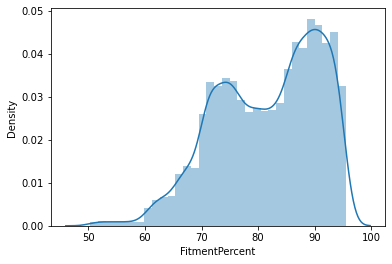

In [6]:
sns.distplot(df['FitmentPercent'])

In [7]:
# Dropping the features with unique IDs

df = df.drop('EmpID', axis=1)
df = df.drop('EmpName', axis=1)
df = df.drop('JobProfileIDApplyingFor', axis=1)
# Dropping the BiasInfluentialFactor as it will be predicted later using Classification
df = df.drop('BiasInfluentialFactor', axis=1)

test_df = test_df.drop('EmpID', axis=1)
test_df = test_df.drop('EmpName', axis=1)
test_df = test_df.drop('JobProfileIDApplyingFor', axis=1)

In [8]:
# One hot encoding of Categorical features

my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)
df = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

my_object_test_df = test_df.select_dtypes(include='object')
my_numeric_test_df = test_df.select_dtypes(exclude='object')
test_df_objects_dummies = pd.get_dummies(my_object_test_df, drop_first=True)
test_df = pd.concat([my_numeric_test_df, test_df_objects_dummies], axis=1)

In [9]:
# Checking the correlation of features with FitmentPercent

df.corr()['FitmentPercent'].sort_values()

Gender_Other                              -0.234392
LatestDegreeCGPA                          -0.067560
TotalLeavesTaken                          -0.023989
HighestDegree_MCA                         -0.022586
MartialStatus_Single                      -0.019428
DepartmentInCompany_Engineering           -0.016414
HighestDegree_PhD                         -0.015221
DegreeBranch_Information Technology       -0.014641
DepartmentInCompany_Finance               -0.014397
HighestDegree_MS                          -0.009839
GraduationYear                            -0.009047
GraduatingInstitute_Tier 3                -0.008750
HighestDegree_Dual MBA                    -0.005406
DegreeBranch_Electrical and Electronics   -0.004111
CurrentDesignation_SDE                    -0.003717
CurrentDesignation_SSE                    -0.003579
DegreeBranch_Computer Science             -0.003055
CurrentDesignation_EM                     -0.002593
Age                                       -0.002060
HighestDegre

In [10]:
X = df.drop('FitmentPercent', axis=1)

In [11]:
y = df['FitmentPercent']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(7216, 40)

In [19]:
X_test.shape

(3093, 40)

In [20]:
scaled_test_df = scaler.transform(test_df)

In [21]:
scaled_test_df.shape

(8745, 40)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Function for Running Multiple Models

In [23]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model Training
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    

In [24]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

In [25]:
model = SVR()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 6.657878988754916
RMSE: 7.965920024932409


In [26]:
model = RandomForestRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.6866431296475906
RMSE: 6.939820409443705


In [27]:
model = AdaBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 6.778293871862704
RMSE: 7.889801199391641


In [28]:
model = BaggingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.781771742644682
RMSE: 7.106507264756814


In [29]:
model = ExtraTreesRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.801210410604591
RMSE: 7.085192246041662


In [30]:
model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.921214452656219
RMSE: 7.059794133634439


In [31]:
model = CatBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)

Learning rate set to 0.055485
0:	learn: 8.9861741	total: 59.7ms	remaining: 59.7s
1:	learn: 8.8082330	total: 64.3ms	remaining: 32.1s
2:	learn: 8.6321091	total: 69.1ms	remaining: 23s
3:	learn: 8.4609300	total: 75.7ms	remaining: 18.9s
4:	learn: 8.3047058	total: 80.8ms	remaining: 16.1s
5:	learn: 8.1623189	total: 85.6ms	remaining: 14.2s
6:	learn: 8.0327086	total: 90.2ms	remaining: 12.8s
7:	learn: 7.9220487	total: 95.1ms	remaining: 11.8s
8:	learn: 7.8144039	total: 99.9ms	remaining: 11s
9:	learn: 7.7488298	total: 105ms	remaining: 10.4s
10:	learn: 7.6853598	total: 110ms	remaining: 9.86s
11:	learn: 7.5991416	total: 114ms	remaining: 9.42s
12:	learn: 7.5296373	total: 119ms	remaining: 9.04s
13:	learn: 7.4843803	total: 123ms	remaining: 8.69s
14:	learn: 7.4381452	total: 128ms	remaining: 8.37s
15:	learn: 7.3748770	total: 132ms	remaining: 8.13s
16:	learn: 7.3249947	total: 137ms	remaining: 7.9s
17:	learn: 7.2728802	total: 142ms	remaining: 7.73s
18:	learn: 7.2544002	total: 152ms	remaining: 7.84s
19:	lea

166:	learn: 6.5132433	total: 940ms	remaining: 4.69s
167:	learn: 6.5103748	total: 945ms	remaining: 4.68s
168:	learn: 6.5087558	total: 952ms	remaining: 4.68s
169:	learn: 6.5067771	total: 956ms	remaining: 4.67s
170:	learn: 6.5036764	total: 961ms	remaining: 4.66s
171:	learn: 6.5012206	total: 966ms	remaining: 4.65s
172:	learn: 6.4982931	total: 974ms	remaining: 4.66s
173:	learn: 6.4947800	total: 983ms	remaining: 4.67s
174:	learn: 6.4921143	total: 988ms	remaining: 4.66s
175:	learn: 6.4890334	total: 996ms	remaining: 4.66s
176:	learn: 6.4863012	total: 1.01s	remaining: 4.69s
177:	learn: 6.4831886	total: 1.02s	remaining: 4.72s
178:	learn: 6.4814499	total: 1.03s	remaining: 4.72s
179:	learn: 6.4790115	total: 1.03s	remaining: 4.71s
180:	learn: 6.4755607	total: 1.04s	remaining: 4.71s
181:	learn: 6.4730732	total: 1.05s	remaining: 4.7s
182:	learn: 6.4709882	total: 1.05s	remaining: 4.7s
183:	learn: 6.4682431	total: 1.06s	remaining: 4.69s
184:	learn: 6.4649351	total: 1.06s	remaining: 4.69s
185:	learn: 6.

329:	learn: 6.1171557	total: 1.78s	remaining: 3.61s
330:	learn: 6.1144811	total: 1.78s	remaining: 3.6s
331:	learn: 6.1121939	total: 1.79s	remaining: 3.59s
332:	learn: 6.1100520	total: 1.79s	remaining: 3.59s
333:	learn: 6.1076941	total: 1.79s	remaining: 3.58s
334:	learn: 6.1058173	total: 1.8s	remaining: 3.57s
335:	learn: 6.1041854	total: 1.8s	remaining: 3.56s
336:	learn: 6.1031693	total: 1.81s	remaining: 3.56s
337:	learn: 6.1001735	total: 1.81s	remaining: 3.55s
338:	learn: 6.0981218	total: 1.82s	remaining: 3.54s
339:	learn: 6.0955745	total: 1.82s	remaining: 3.53s
340:	learn: 6.0931573	total: 1.82s	remaining: 3.52s
341:	learn: 6.0908945	total: 1.83s	remaining: 3.52s
342:	learn: 6.0883854	total: 1.83s	remaining: 3.51s
343:	learn: 6.0855029	total: 1.84s	remaining: 3.5s
344:	learn: 6.0842416	total: 1.84s	remaining: 3.49s
345:	learn: 6.0827898	total: 1.84s	remaining: 3.49s
346:	learn: 6.0811288	total: 1.85s	remaining: 3.48s
347:	learn: 6.0789197	total: 1.85s	remaining: 3.47s
348:	learn: 6.07

492:	learn: 5.7912433	total: 2.5s	remaining: 2.57s
493:	learn: 5.7888074	total: 2.51s	remaining: 2.57s
494:	learn: 5.7863166	total: 2.52s	remaining: 2.57s
495:	learn: 5.7846090	total: 2.52s	remaining: 2.56s
496:	learn: 5.7808494	total: 2.53s	remaining: 2.56s
497:	learn: 5.7790770	total: 2.53s	remaining: 2.55s
498:	learn: 5.7778609	total: 2.54s	remaining: 2.55s
499:	learn: 5.7766773	total: 2.54s	remaining: 2.54s
500:	learn: 5.7746494	total: 2.55s	remaining: 2.54s
501:	learn: 5.7725970	total: 2.56s	remaining: 2.54s
502:	learn: 5.7700435	total: 2.56s	remaining: 2.53s
503:	learn: 5.7676866	total: 2.56s	remaining: 2.52s
504:	learn: 5.7660497	total: 2.57s	remaining: 2.52s
505:	learn: 5.7631636	total: 2.57s	remaining: 2.51s
506:	learn: 5.7613767	total: 2.58s	remaining: 2.51s
507:	learn: 5.7593457	total: 2.58s	remaining: 2.5s
508:	learn: 5.7571835	total: 2.59s	remaining: 2.5s
509:	learn: 5.7547948	total: 2.59s	remaining: 2.49s
510:	learn: 5.7532754	total: 2.6s	remaining: 2.49s
511:	learn: 5.75

666:	learn: 5.4837839	total: 3.28s	remaining: 1.64s
667:	learn: 5.4825943	total: 3.28s	remaining: 1.63s
668:	learn: 5.4812652	total: 3.29s	remaining: 1.63s
669:	learn: 5.4791708	total: 3.29s	remaining: 1.62s
670:	learn: 5.4774902	total: 3.3s	remaining: 1.62s
671:	learn: 5.4757806	total: 3.3s	remaining: 1.61s
672:	learn: 5.4737062	total: 3.3s	remaining: 1.6s
673:	learn: 5.4717620	total: 3.31s	remaining: 1.6s
674:	learn: 5.4702152	total: 3.31s	remaining: 1.59s
675:	learn: 5.4686382	total: 3.32s	remaining: 1.59s
676:	learn: 5.4668510	total: 3.32s	remaining: 1.58s
677:	learn: 5.4655625	total: 3.33s	remaining: 1.58s
678:	learn: 5.4646704	total: 3.33s	remaining: 1.57s
679:	learn: 5.4627816	total: 3.33s	remaining: 1.57s
680:	learn: 5.4614759	total: 3.34s	remaining: 1.56s
681:	learn: 5.4598392	total: 3.35s	remaining: 1.56s
682:	learn: 5.4572282	total: 3.35s	remaining: 1.56s
683:	learn: 5.4562472	total: 3.36s	remaining: 1.55s
684:	learn: 5.4552960	total: 3.36s	remaining: 1.54s
685:	learn: 5.452

833:	learn: 5.2279103	total: 4s	remaining: 797ms
834:	learn: 5.2266561	total: 4.01s	remaining: 792ms
835:	learn: 5.2249554	total: 4.01s	remaining: 787ms
836:	learn: 5.2232703	total: 4.02s	remaining: 783ms
837:	learn: 5.2221173	total: 4.02s	remaining: 778ms
838:	learn: 5.2204527	total: 4.03s	remaining: 773ms
839:	learn: 5.2190385	total: 4.03s	remaining: 768ms
840:	learn: 5.2178733	total: 4.04s	remaining: 763ms
841:	learn: 5.2163930	total: 4.04s	remaining: 758ms
842:	learn: 5.2146924	total: 4.04s	remaining: 753ms
843:	learn: 5.2125614	total: 4.05s	remaining: 748ms
844:	learn: 5.2111478	total: 4.05s	remaining: 743ms
845:	learn: 5.2092797	total: 4.05s	remaining: 738ms
846:	learn: 5.2072761	total: 4.06s	remaining: 733ms
847:	learn: 5.2060328	total: 4.06s	remaining: 728ms
848:	learn: 5.2048083	total: 4.07s	remaining: 723ms
849:	learn: 5.2027408	total: 4.07s	remaining: 718ms
850:	learn: 5.2001826	total: 4.07s	remaining: 713ms
851:	learn: 5.1989511	total: 4.08s	remaining: 708ms
852:	learn: 5.1

In [32]:
model = xgb.XGBRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.94015056779074
RMSE: 7.297986883891452


In [33]:
model = xgb.XGBRFRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.582273538899661
RMSE: 6.7399982929797035


In [34]:
model = lgb.LGBMRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.667327379228609
RMSE: 6.864301200483342


In [35]:
model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=45, max_depth=-1, learning_rate=0.1, num_leaves=31)

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.622711220080068
RMSE: 6.787852451939841


In [36]:
estimators = [
    ('rf', RandomForestRegressor()),
    ('cb', CatBoostRegressor()),
    ('xgb', xgb.XGBRFRegressor()),
    ('lgb', lgb.LGBMRegressor(n_estimators=45))
]

In [37]:
stacking = StackingRegressor(estimators=estimators,final_estimator=xgb.XGBRFRegressor())

In [38]:
run_model(stacking, X_train, y_train, X_test, y_test)

Learning rate set to 0.055485
0:	learn: 8.9861741	total: 3.6ms	remaining: 3.59s
1:	learn: 8.8082330	total: 12.6ms	remaining: 6.29s
2:	learn: 8.6321091	total: 16.5ms	remaining: 5.47s
3:	learn: 8.4609300	total: 20.2ms	remaining: 5.03s
4:	learn: 8.3047058	total: 24.2ms	remaining: 4.82s
5:	learn: 8.1623189	total: 28ms	remaining: 4.63s
6:	learn: 8.0327086	total: 31.6ms	remaining: 4.48s
7:	learn: 7.9220487	total: 35.4ms	remaining: 4.38s
8:	learn: 7.8144039	total: 39.4ms	remaining: 4.34s
9:	learn: 7.7488298	total: 42.9ms	remaining: 4.25s
10:	learn: 7.6853598	total: 46.3ms	remaining: 4.17s
11:	learn: 7.5991416	total: 49.7ms	remaining: 4.09s
12:	learn: 7.5296373	total: 53.5ms	remaining: 4.07s
13:	learn: 7.4843803	total: 57.2ms	remaining: 4.03s
14:	learn: 7.4381452	total: 61ms	remaining: 4.01s
15:	learn: 7.3748770	total: 64.9ms	remaining: 3.99s
16:	learn: 7.3249947	total: 68.8ms	remaining: 3.98s
17:	learn: 7.2728802	total: 72.4ms	remaining: 3.95s
18:	learn: 7.2544002	total: 75.9ms	remaining: 3.9

162:	learn: 6.5220305	total: 666ms	remaining: 3.42s
163:	learn: 6.5208610	total: 671ms	remaining: 3.42s
164:	learn: 6.5187375	total: 676ms	remaining: 3.42s
165:	learn: 6.5156164	total: 682ms	remaining: 3.42s
166:	learn: 6.5132433	total: 686ms	remaining: 3.42s
167:	learn: 6.5103748	total: 690ms	remaining: 3.42s
168:	learn: 6.5087558	total: 695ms	remaining: 3.42s
169:	learn: 6.5067771	total: 698ms	remaining: 3.41s
170:	learn: 6.5036764	total: 702ms	remaining: 3.4s
171:	learn: 6.5012206	total: 706ms	remaining: 3.4s
172:	learn: 6.4982931	total: 710ms	remaining: 3.39s
173:	learn: 6.4947800	total: 714ms	remaining: 3.39s
174:	learn: 6.4921143	total: 717ms	remaining: 3.38s
175:	learn: 6.4890334	total: 721ms	remaining: 3.38s
176:	learn: 6.4863012	total: 725ms	remaining: 3.37s
177:	learn: 6.4831886	total: 729ms	remaining: 3.37s
178:	learn: 6.4814499	total: 733ms	remaining: 3.36s
179:	learn: 6.4790115	total: 737ms	remaining: 3.35s
180:	learn: 6.4755607	total: 740ms	remaining: 3.35s
181:	learn: 6.

332:	learn: 6.1100520	total: 1.33s	remaining: 2.66s
333:	learn: 6.1076941	total: 1.33s	remaining: 2.66s
334:	learn: 6.1058173	total: 1.34s	remaining: 2.66s
335:	learn: 6.1041854	total: 1.34s	remaining: 2.65s
336:	learn: 6.1031693	total: 1.35s	remaining: 2.65s
337:	learn: 6.1001735	total: 1.35s	remaining: 2.65s
338:	learn: 6.0981218	total: 1.35s	remaining: 2.64s
339:	learn: 6.0955745	total: 1.36s	remaining: 2.64s
340:	learn: 6.0931573	total: 1.36s	remaining: 2.63s
341:	learn: 6.0908945	total: 1.36s	remaining: 2.63s
342:	learn: 6.0883854	total: 1.37s	remaining: 2.62s
343:	learn: 6.0855029	total: 1.37s	remaining: 2.62s
344:	learn: 6.0842416	total: 1.38s	remaining: 2.62s
345:	learn: 6.0827898	total: 1.38s	remaining: 2.61s
346:	learn: 6.0811288	total: 1.38s	remaining: 2.61s
347:	learn: 6.0789197	total: 1.39s	remaining: 2.6s
348:	learn: 6.0778432	total: 1.39s	remaining: 2.6s
349:	learn: 6.0743241	total: 1.4s	remaining: 2.59s
350:	learn: 6.0718106	total: 1.4s	remaining: 2.59s
351:	learn: 6.06

505:	learn: 5.7631636	total: 2s	remaining: 1.95s
506:	learn: 5.7613767	total: 2s	remaining: 1.94s
507:	learn: 5.7593457	total: 2s	remaining: 1.94s
508:	learn: 5.7571835	total: 2.01s	remaining: 1.94s
509:	learn: 5.7547948	total: 2.01s	remaining: 1.93s
510:	learn: 5.7532754	total: 2.02s	remaining: 1.93s
511:	learn: 5.7513059	total: 2.02s	remaining: 1.93s
512:	learn: 5.7498801	total: 2.02s	remaining: 1.92s
513:	learn: 5.7483296	total: 2.03s	remaining: 1.92s
514:	learn: 5.7461702	total: 2.03s	remaining: 1.91s
515:	learn: 5.7441742	total: 2.04s	remaining: 1.91s
516:	learn: 5.7426969	total: 2.04s	remaining: 1.91s
517:	learn: 5.7410762	total: 2.04s	remaining: 1.9s
518:	learn: 5.7394217	total: 2.05s	remaining: 1.9s
519:	learn: 5.7376151	total: 2.05s	remaining: 1.9s
520:	learn: 5.7359777	total: 2.06s	remaining: 1.89s
521:	learn: 5.7349752	total: 2.06s	remaining: 1.89s
522:	learn: 5.7332417	total: 2.07s	remaining: 1.89s
523:	learn: 5.7320645	total: 2.07s	remaining: 1.88s
524:	learn: 5.7300743	to

670:	learn: 5.4774902	total: 2.67s	remaining: 1.31s
671:	learn: 5.4757806	total: 2.67s	remaining: 1.3s
672:	learn: 5.4737062	total: 2.67s	remaining: 1.3s
673:	learn: 5.4717620	total: 2.68s	remaining: 1.3s
674:	learn: 5.4702152	total: 2.68s	remaining: 1.29s
675:	learn: 5.4686382	total: 2.69s	remaining: 1.29s
676:	learn: 5.4668510	total: 2.69s	remaining: 1.28s
677:	learn: 5.4655625	total: 2.69s	remaining: 1.28s
678:	learn: 5.4646704	total: 2.7s	remaining: 1.28s
679:	learn: 5.4627816	total: 2.7s	remaining: 1.27s
680:	learn: 5.4614759	total: 2.71s	remaining: 1.27s
681:	learn: 5.4598392	total: 2.71s	remaining: 1.26s
682:	learn: 5.4572282	total: 2.71s	remaining: 1.26s
683:	learn: 5.4562472	total: 2.72s	remaining: 1.26s
684:	learn: 5.4552960	total: 2.72s	remaining: 1.25s
685:	learn: 5.4525471	total: 2.73s	remaining: 1.25s
686:	learn: 5.4510804	total: 2.73s	remaining: 1.24s
687:	learn: 5.4498085	total: 2.73s	remaining: 1.24s
688:	learn: 5.4480987	total: 2.74s	remaining: 1.24s
689:	learn: 5.446

838:	learn: 5.2204527	total: 3.34s	remaining: 641ms
839:	learn: 5.2190385	total: 3.35s	remaining: 638ms
840:	learn: 5.2178733	total: 3.35s	remaining: 634ms
841:	learn: 5.2163930	total: 3.36s	remaining: 630ms
842:	learn: 5.2146924	total: 3.36s	remaining: 626ms
843:	learn: 5.2125614	total: 3.37s	remaining: 622ms
844:	learn: 5.2111478	total: 3.37s	remaining: 618ms
845:	learn: 5.2092797	total: 3.37s	remaining: 614ms
846:	learn: 5.2072761	total: 3.38s	remaining: 610ms
847:	learn: 5.2060328	total: 3.38s	remaining: 606ms
848:	learn: 5.2048083	total: 3.39s	remaining: 602ms
849:	learn: 5.2027408	total: 3.39s	remaining: 598ms
850:	learn: 5.2001826	total: 3.39s	remaining: 594ms
851:	learn: 5.1989511	total: 3.4s	remaining: 590ms
852:	learn: 5.1979756	total: 3.4s	remaining: 586ms
853:	learn: 5.1968690	total: 3.4s	remaining: 582ms
854:	learn: 5.1955212	total: 3.41s	remaining: 578ms
855:	learn: 5.1935589	total: 3.41s	remaining: 574ms
856:	learn: 5.1923640	total: 3.42s	remaining: 570ms
857:	learn: 5.1

Learning rate set to 0.053323
0:	learn: 8.9847398	total: 4.03ms	remaining: 4.02s
1:	learn: 8.8189871	total: 8.51ms	remaining: 4.24s
2:	learn: 8.6593481	total: 12.5ms	remaining: 4.14s
3:	learn: 8.4963684	total: 16.8ms	remaining: 4.2s
4:	learn: 8.3470118	total: 22.2ms	remaining: 4.42s
5:	learn: 8.2103024	total: 25.6ms	remaining: 4.24s
6:	learn: 8.0853122	total: 29ms	remaining: 4.11s
7:	learn: 7.9830987	total: 32.3ms	remaining: 4.01s
8:	learn: 7.8779874	total: 35.9ms	remaining: 3.96s
9:	learn: 7.7821783	total: 39.4ms	remaining: 3.9s
10:	learn: 7.7334572	total: 42.6ms	remaining: 3.83s
11:	learn: 7.6795917	total: 45.8ms	remaining: 3.77s
12:	learn: 7.6392572	total: 49ms	remaining: 3.72s
13:	learn: 7.5879995	total: 52.4ms	remaining: 3.69s
14:	learn: 7.5381826	total: 55.6ms	remaining: 3.65s
15:	learn: 7.4935851	total: 58.7ms	remaining: 3.61s
16:	learn: 7.4305796	total: 62.1ms	remaining: 3.59s
17:	learn: 7.4054236	total: 65.7ms	remaining: 3.58s
18:	learn: 7.3908901	total: 68.8ms	remaining: 3.55

172:	learn: 6.4690239	total: 658ms	remaining: 3.14s
173:	learn: 6.4633432	total: 662ms	remaining: 3.14s
174:	learn: 6.4596694	total: 666ms	remaining: 3.14s
175:	learn: 6.4572131	total: 670ms	remaining: 3.14s
176:	learn: 6.4532112	total: 674ms	remaining: 3.13s
177:	learn: 6.4497532	total: 678ms	remaining: 3.13s
178:	learn: 6.4475325	total: 681ms	remaining: 3.12s
179:	learn: 6.4447942	total: 685ms	remaining: 3.12s
180:	learn: 6.4413479	total: 689ms	remaining: 3.12s
181:	learn: 6.4393166	total: 692ms	remaining: 3.11s
182:	learn: 6.4373332	total: 696ms	remaining: 3.1s
183:	learn: 6.4326778	total: 700ms	remaining: 3.1s
184:	learn: 6.4291583	total: 704ms	remaining: 3.1s
185:	learn: 6.4254653	total: 708ms	remaining: 3.1s
186:	learn: 6.4232560	total: 711ms	remaining: 3.09s
187:	learn: 6.4214134	total: 715ms	remaining: 3.09s
188:	learn: 6.4185220	total: 719ms	remaining: 3.08s
189:	learn: 6.4138505	total: 723ms	remaining: 3.08s
190:	learn: 6.4101335	total: 727ms	remaining: 3.08s
191:	learn: 6.40

347:	learn: 5.9672284	total: 1.32s	remaining: 2.48s
348:	learn: 5.9647356	total: 1.32s	remaining: 2.47s
349:	learn: 5.9620367	total: 1.33s	remaining: 2.47s
350:	learn: 5.9590817	total: 1.33s	remaining: 2.46s
351:	learn: 5.9576655	total: 1.34s	remaining: 2.46s
352:	learn: 5.9548091	total: 1.34s	remaining: 2.46s
353:	learn: 5.9519140	total: 1.34s	remaining: 2.45s
354:	learn: 5.9499765	total: 1.35s	remaining: 2.45s
355:	learn: 5.9467371	total: 1.35s	remaining: 2.44s
356:	learn: 5.9433693	total: 1.35s	remaining: 2.44s
357:	learn: 5.9413386	total: 1.36s	remaining: 2.44s
358:	learn: 5.9400370	total: 1.36s	remaining: 2.43s
359:	learn: 5.9358531	total: 1.36s	remaining: 2.43s
360:	learn: 5.9345635	total: 1.37s	remaining: 2.42s
361:	learn: 5.9315609	total: 1.37s	remaining: 2.42s
362:	learn: 5.9292343	total: 1.38s	remaining: 2.42s
363:	learn: 5.9271598	total: 1.38s	remaining: 2.41s
364:	learn: 5.9247545	total: 1.38s	remaining: 2.4s
365:	learn: 5.9229190	total: 1.39s	remaining: 2.4s
366:	learn: 5.

536:	learn: 5.5556993	total: 1.98s	remaining: 1.71s
537:	learn: 5.5543060	total: 1.98s	remaining: 1.7s
538:	learn: 5.5519924	total: 1.99s	remaining: 1.7s
539:	learn: 5.5502875	total: 1.99s	remaining: 1.7s
540:	learn: 5.5491841	total: 2s	remaining: 1.7s
541:	learn: 5.5459028	total: 2s	remaining: 1.69s
542:	learn: 5.5440234	total: 2.01s	remaining: 1.69s
543:	learn: 5.5419623	total: 2.01s	remaining: 1.69s
544:	learn: 5.5394146	total: 2.02s	remaining: 1.68s
545:	learn: 5.5380711	total: 2.02s	remaining: 1.68s
546:	learn: 5.5353890	total: 2.02s	remaining: 1.68s
547:	learn: 5.5331954	total: 2.03s	remaining: 1.67s
548:	learn: 5.5307048	total: 2.03s	remaining: 1.67s
549:	learn: 5.5285711	total: 2.04s	remaining: 1.67s
550:	learn: 5.5257655	total: 2.04s	remaining: 1.66s
551:	learn: 5.5247817	total: 2.04s	remaining: 1.66s
552:	learn: 5.5226590	total: 2.05s	remaining: 1.66s
553:	learn: 5.5202676	total: 2.05s	remaining: 1.65s
554:	learn: 5.5190645	total: 2.06s	remaining: 1.65s
555:	learn: 5.5168765	

715:	learn: 5.2231342	total: 2.65s	remaining: 1.05s
716:	learn: 5.2216477	total: 2.65s	remaining: 1.04s
717:	learn: 5.2195028	total: 2.65s	remaining: 1.04s
718:	learn: 5.2177458	total: 2.66s	remaining: 1.04s
719:	learn: 5.2160304	total: 2.66s	remaining: 1.03s
720:	learn: 5.2137058	total: 2.67s	remaining: 1.03s
721:	learn: 5.2120431	total: 2.67s	remaining: 1.03s
722:	learn: 5.2106325	total: 2.67s	remaining: 1.02s
723:	learn: 5.2083543	total: 2.68s	remaining: 1.02s
724:	learn: 5.2071029	total: 2.69s	remaining: 1.02s
725:	learn: 5.2051873	total: 2.69s	remaining: 1.01s
726:	learn: 5.2032018	total: 2.69s	remaining: 1.01s
727:	learn: 5.2011670	total: 2.7s	remaining: 1.01s
728:	learn: 5.1996013	total: 2.7s	remaining: 1s
729:	learn: 5.1976448	total: 2.71s	remaining: 1s
730:	learn: 5.1951631	total: 2.71s	remaining: 998ms
731:	learn: 5.1936687	total: 2.71s	remaining: 994ms
732:	learn: 5.1923064	total: 2.72s	remaining: 990ms
733:	learn: 5.1900126	total: 2.72s	remaining: 987ms
734:	learn: 5.188264

898:	learn: 4.9180295	total: 3.31s	remaining: 371ms
899:	learn: 4.9173633	total: 3.31s	remaining: 368ms
900:	learn: 4.9163565	total: 3.31s	remaining: 364ms
901:	learn: 4.9146205	total: 3.32s	remaining: 360ms
902:	learn: 4.9136537	total: 3.32s	remaining: 357ms
903:	learn: 4.9124318	total: 3.32s	remaining: 353ms
904:	learn: 4.9104464	total: 3.33s	remaining: 350ms
905:	learn: 4.9090499	total: 3.33s	remaining: 346ms
906:	learn: 4.9065516	total: 3.34s	remaining: 342ms
907:	learn: 4.9033914	total: 3.34s	remaining: 338ms
908:	learn: 4.9018142	total: 3.34s	remaining: 335ms
909:	learn: 4.9001979	total: 3.35s	remaining: 331ms
910:	learn: 4.8988045	total: 3.35s	remaining: 327ms
911:	learn: 4.8978474	total: 3.35s	remaining: 324ms
912:	learn: 4.8956727	total: 3.36s	remaining: 320ms
913:	learn: 4.8936199	total: 3.36s	remaining: 316ms
914:	learn: 4.8908623	total: 3.37s	remaining: 313ms
915:	learn: 4.8899553	total: 3.37s	remaining: 309ms
916:	learn: 4.8880894	total: 3.37s	remaining: 305ms
917:	learn: 

88:	learn: 6.7167988	total: 324ms	remaining: 3.32s
89:	learn: 6.7139917	total: 330ms	remaining: 3.34s
90:	learn: 6.7108580	total: 335ms	remaining: 3.34s
91:	learn: 6.7064229	total: 340ms	remaining: 3.35s
92:	learn: 6.7051350	total: 346ms	remaining: 3.37s
93:	learn: 6.7021776	total: 350ms	remaining: 3.37s
94:	learn: 6.6930978	total: 354ms	remaining: 3.37s
95:	learn: 6.6883762	total: 359ms	remaining: 3.38s
96:	learn: 6.6830565	total: 363ms	remaining: 3.38s
97:	learn: 6.6824327	total: 365ms	remaining: 3.36s
98:	learn: 6.6794359	total: 369ms	remaining: 3.36s
99:	learn: 6.6747671	total: 373ms	remaining: 3.36s
100:	learn: 6.6723234	total: 377ms	remaining: 3.36s
101:	learn: 6.6686745	total: 381ms	remaining: 3.35s
102:	learn: 6.6642548	total: 385ms	remaining: 3.35s
103:	learn: 6.6622574	total: 389ms	remaining: 3.35s
104:	learn: 6.6595606	total: 392ms	remaining: 3.34s
105:	learn: 6.6574705	total: 396ms	remaining: 3.34s
106:	learn: 6.6554947	total: 400ms	remaining: 3.33s
107:	learn: 6.6529560	to

266:	learn: 6.2087107	total: 985ms	remaining: 2.7s
267:	learn: 6.2065144	total: 988ms	remaining: 2.7s
268:	learn: 6.2046787	total: 994ms	remaining: 2.7s
269:	learn: 6.2017313	total: 997ms	remaining: 2.7s
270:	learn: 6.1982564	total: 1s	remaining: 2.69s
271:	learn: 6.1969841	total: 1s	remaining: 2.69s
272:	learn: 6.1934603	total: 1.01s	remaining: 2.69s
273:	learn: 6.1897270	total: 1.01s	remaining: 2.68s
274:	learn: 6.1881884	total: 1.01s	remaining: 2.68s
275:	learn: 6.1847744	total: 1.02s	remaining: 2.67s
276:	learn: 6.1830581	total: 1.02s	remaining: 2.67s
277:	learn: 6.1814288	total: 1.03s	remaining: 2.67s
278:	learn: 6.1778534	total: 1.03s	remaining: 2.66s
279:	learn: 6.1755248	total: 1.03s	remaining: 2.66s
280:	learn: 6.1721895	total: 1.04s	remaining: 2.66s
281:	learn: 6.1695075	total: 1.04s	remaining: 2.65s
282:	learn: 6.1666798	total: 1.05s	remaining: 2.65s
283:	learn: 6.1641185	total: 1.05s	remaining: 2.65s
284:	learn: 6.1606106	total: 1.05s	remaining: 2.65s
285:	learn: 6.1590903	

443:	learn: 5.7885300	total: 1.65s	remaining: 2.06s
444:	learn: 5.7871783	total: 1.65s	remaining: 2.06s
445:	learn: 5.7853511	total: 1.66s	remaining: 2.06s
446:	learn: 5.7840081	total: 1.67s	remaining: 2.07s
447:	learn: 5.7821144	total: 1.68s	remaining: 2.07s
448:	learn: 5.7803617	total: 1.68s	remaining: 2.06s
449:	learn: 5.7788557	total: 1.68s	remaining: 2.06s
450:	learn: 5.7769189	total: 1.69s	remaining: 2.05s
451:	learn: 5.7743676	total: 1.69s	remaining: 2.05s
452:	learn: 5.7724658	total: 1.69s	remaining: 2.04s
453:	learn: 5.7694993	total: 1.7s	remaining: 2.04s
454:	learn: 5.7678164	total: 1.7s	remaining: 2.04s
455:	learn: 5.7660937	total: 1.7s	remaining: 2.03s
456:	learn: 5.7640969	total: 1.71s	remaining: 2.03s
457:	learn: 5.7620015	total: 1.71s	remaining: 2.02s
458:	learn: 5.7604167	total: 1.71s	remaining: 2.02s
459:	learn: 5.7584544	total: 1.72s	remaining: 2.01s
460:	learn: 5.7561860	total: 1.72s	remaining: 2.01s
461:	learn: 5.7537974	total: 1.72s	remaining: 2s
462:	learn: 5.7513

623:	learn: 5.4270678	total: 2.31s	remaining: 1.39s
624:	learn: 5.4260998	total: 2.32s	remaining: 1.39s
625:	learn: 5.4241234	total: 2.32s	remaining: 1.39s
626:	learn: 5.4230932	total: 2.32s	remaining: 1.38s
627:	learn: 5.4209002	total: 2.33s	remaining: 1.38s
628:	learn: 5.4195626	total: 2.33s	remaining: 1.38s
629:	learn: 5.4170620	total: 2.34s	remaining: 1.37s
630:	learn: 5.4159859	total: 2.34s	remaining: 1.37s
631:	learn: 5.4132798	total: 2.34s	remaining: 1.36s
632:	learn: 5.4111261	total: 2.35s	remaining: 1.36s
633:	learn: 5.4089283	total: 2.35s	remaining: 1.36s
634:	learn: 5.4075197	total: 2.35s	remaining: 1.35s
635:	learn: 5.4061514	total: 2.36s	remaining: 1.35s
636:	learn: 5.4042365	total: 2.36s	remaining: 1.34s
637:	learn: 5.4011295	total: 2.36s	remaining: 1.34s
638:	learn: 5.3996639	total: 2.37s	remaining: 1.34s
639:	learn: 5.3985966	total: 2.37s	remaining: 1.33s
640:	learn: 5.3970563	total: 2.37s	remaining: 1.33s
641:	learn: 5.3952015	total: 2.38s	remaining: 1.32s
642:	learn: 

811:	learn: 5.0990836	total: 2.97s	remaining: 688ms
812:	learn: 5.0968015	total: 2.98s	remaining: 685ms
813:	learn: 5.0948348	total: 2.98s	remaining: 681ms
814:	learn: 5.0936507	total: 2.98s	remaining: 677ms
815:	learn: 5.0925508	total: 2.99s	remaining: 673ms
816:	learn: 5.0912921	total: 2.99s	remaining: 670ms
817:	learn: 5.0891434	total: 3s	remaining: 667ms
818:	learn: 5.0875932	total: 3s	remaining: 663ms
819:	learn: 5.0863875	total: 3s	remaining: 659ms
820:	learn: 5.0850286	total: 3.01s	remaining: 656ms
821:	learn: 5.0826274	total: 3.01s	remaining: 652ms
822:	learn: 5.0813511	total: 3.01s	remaining: 648ms
823:	learn: 5.0800885	total: 3.02s	remaining: 645ms
824:	learn: 5.0787033	total: 3.02s	remaining: 641ms
825:	learn: 5.0771951	total: 3.03s	remaining: 637ms
826:	learn: 5.0763819	total: 3.03s	remaining: 634ms
827:	learn: 5.0750366	total: 3.03s	remaining: 630ms
828:	learn: 5.0737138	total: 3.04s	remaining: 627ms
829:	learn: 5.0714800	total: 3.04s	remaining: 623ms
830:	learn: 5.0701298

993:	learn: 4.8201877	total: 3.63s	remaining: 21.9ms
994:	learn: 4.8180161	total: 3.63s	remaining: 18.3ms
995:	learn: 4.8168420	total: 3.64s	remaining: 14.6ms
996:	learn: 4.8158494	total: 3.64s	remaining: 11ms
997:	learn: 4.8140521	total: 3.64s	remaining: 7.3ms
998:	learn: 4.8123902	total: 3.65s	remaining: 3.65ms
999:	learn: 4.8107011	total: 3.65s	remaining: 0us
Learning rate set to 0.053325
0:	learn: 9.0264825	total: 4.32ms	remaining: 4.32s
1:	learn: 8.8553706	total: 9.05ms	remaining: 4.52s
2:	learn: 8.7028820	total: 12.7ms	remaining: 4.23s
3:	learn: 8.5371095	total: 16.2ms	remaining: 4.02s
4:	learn: 8.3851616	total: 19.6ms	remaining: 3.91s
5:	learn: 8.2460527	total: 23.6ms	remaining: 3.91s
6:	learn: 8.1188451	total: 26.9ms	remaining: 3.81s
7:	learn: 8.0495132	total: 30.1ms	remaining: 3.73s
8:	learn: 7.9392052	total: 33.4ms	remaining: 3.68s
9:	learn: 7.8742568	total: 37.9ms	remaining: 3.75s
10:	learn: 7.8225354	total: 41.6ms	remaining: 3.74s
11:	learn: 7.7681956	total: 45.4ms	remainin

178:	learn: 6.4702371	total: 660ms	remaining: 3.02s
179:	learn: 6.4679897	total: 665ms	remaining: 3.03s
180:	learn: 6.4642435	total: 670ms	remaining: 3.03s
181:	learn: 6.4602224	total: 675ms	remaining: 3.03s
182:	learn: 6.4583716	total: 679ms	remaining: 3.03s
183:	learn: 6.4560429	total: 685ms	remaining: 3.04s
184:	learn: 6.4534551	total: 689ms	remaining: 3.04s
185:	learn: 6.4507328	total: 693ms	remaining: 3.03s
186:	learn: 6.4476028	total: 697ms	remaining: 3.03s
187:	learn: 6.4440628	total: 701ms	remaining: 3.03s
188:	learn: 6.4410829	total: 705ms	remaining: 3.02s
189:	learn: 6.4385331	total: 708ms	remaining: 3.02s
190:	learn: 6.4351254	total: 712ms	remaining: 3.01s
191:	learn: 6.4329563	total: 715ms	remaining: 3.01s
192:	learn: 6.4304651	total: 719ms	remaining: 3s
193:	learn: 6.4275220	total: 722ms	remaining: 3s
194:	learn: 6.4249859	total: 726ms	remaining: 3s
195:	learn: 6.4223382	total: 730ms	remaining: 2.99s
196:	learn: 6.4203532	total: 733ms	remaining: 2.99s
197:	learn: 6.4175424

354:	learn: 5.9827674	total: 1.32s	remaining: 2.4s
355:	learn: 5.9799589	total: 1.33s	remaining: 2.4s
356:	learn: 5.9787759	total: 1.33s	remaining: 2.4s
357:	learn: 5.9752513	total: 1.34s	remaining: 2.4s
358:	learn: 5.9729875	total: 1.34s	remaining: 2.4s
359:	learn: 5.9708339	total: 1.35s	remaining: 2.39s
360:	learn: 5.9680407	total: 1.35s	remaining: 2.39s
361:	learn: 5.9653040	total: 1.35s	remaining: 2.39s
362:	learn: 5.9625150	total: 1.36s	remaining: 2.38s
363:	learn: 5.9605789	total: 1.36s	remaining: 2.38s
364:	learn: 5.9582071	total: 1.37s	remaining: 2.38s
365:	learn: 5.9560917	total: 1.37s	remaining: 2.38s
366:	learn: 5.9530240	total: 1.38s	remaining: 2.37s
367:	learn: 5.9504112	total: 1.38s	remaining: 2.37s
368:	learn: 5.9478231	total: 1.38s	remaining: 2.37s
369:	learn: 5.9441080	total: 1.39s	remaining: 2.36s
370:	learn: 5.9412190	total: 1.39s	remaining: 2.36s
371:	learn: 5.9386852	total: 1.39s	remaining: 2.35s
372:	learn: 5.9357358	total: 1.4s	remaining: 2.35s
373:	learn: 5.9330

539:	learn: 5.5496833	total: 1.98s	remaining: 1.69s
540:	learn: 5.5475870	total: 1.99s	remaining: 1.69s
541:	learn: 5.5460015	total: 1.99s	remaining: 1.68s
542:	learn: 5.5443057	total: 2s	remaining: 1.68s
543:	learn: 5.5423963	total: 2s	remaining: 1.68s
544:	learn: 5.5403221	total: 2.01s	remaining: 1.68s
545:	learn: 5.5378602	total: 2.01s	remaining: 1.67s
546:	learn: 5.5367453	total: 2.02s	remaining: 1.67s
547:	learn: 5.5346265	total: 2.02s	remaining: 1.67s
548:	learn: 5.5326601	total: 2.02s	remaining: 1.66s
549:	learn: 5.5314031	total: 2.02s	remaining: 1.66s
550:	learn: 5.5288895	total: 2.03s	remaining: 1.65s
551:	learn: 5.5270686	total: 2.03s	remaining: 1.65s
552:	learn: 5.5248678	total: 2.03s	remaining: 1.64s
553:	learn: 5.5220071	total: 2.04s	remaining: 1.64s
554:	learn: 5.5200103	total: 2.04s	remaining: 1.64s
555:	learn: 5.5184162	total: 2.04s	remaining: 1.63s
556:	learn: 5.5170992	total: 2.05s	remaining: 1.63s
557:	learn: 5.5150955	total: 2.05s	remaining: 1.62s
558:	learn: 5.5126

718:	learn: 5.2077188	total: 2.65s	remaining: 1.03s
719:	learn: 5.2062893	total: 2.65s	remaining: 1.03s
720:	learn: 5.2052251	total: 2.65s	remaining: 1.03s
721:	learn: 5.2029658	total: 2.65s	remaining: 1.02s
722:	learn: 5.2003479	total: 2.66s	remaining: 1.02s
723:	learn: 5.1980314	total: 2.66s	remaining: 1.01s
724:	learn: 5.1966467	total: 2.67s	remaining: 1.01s
725:	learn: 5.1949955	total: 2.67s	remaining: 1.01s
726:	learn: 5.1926153	total: 2.67s	remaining: 1s
727:	learn: 5.1913842	total: 2.68s	remaining: 1000ms
728:	learn: 5.1887882	total: 2.68s	remaining: 996ms
729:	learn: 5.1873703	total: 2.68s	remaining: 992ms
730:	learn: 5.1861356	total: 2.69s	remaining: 988ms
731:	learn: 5.1850627	total: 2.69s	remaining: 985ms
732:	learn: 5.1820927	total: 2.69s	remaining: 981ms
733:	learn: 5.1807686	total: 2.69s	remaining: 977ms
734:	learn: 5.1792915	total: 2.7s	remaining: 973ms
735:	learn: 5.1773459	total: 2.7s	remaining: 969ms
736:	learn: 5.1757023	total: 2.71s	remaining: 965ms
737:	learn: 5.17

904:	learn: 4.8999868	total: 3.3s	remaining: 347ms
905:	learn: 4.8984551	total: 3.31s	remaining: 343ms
906:	learn: 4.8968438	total: 3.31s	remaining: 339ms
907:	learn: 4.8950021	total: 3.31s	remaining: 336ms
908:	learn: 4.8934721	total: 3.32s	remaining: 332ms
909:	learn: 4.8916074	total: 3.32s	remaining: 328ms
910:	learn: 4.8904888	total: 3.32s	remaining: 325ms
911:	learn: 4.8887032	total: 3.33s	remaining: 321ms
912:	learn: 4.8868582	total: 3.33s	remaining: 317ms
913:	learn: 4.8855146	total: 3.33s	remaining: 314ms
914:	learn: 4.8837783	total: 3.34s	remaining: 310ms
915:	learn: 4.8825090	total: 3.34s	remaining: 306ms
916:	learn: 4.8813103	total: 3.34s	remaining: 303ms
917:	learn: 4.8798324	total: 3.35s	remaining: 299ms
918:	learn: 4.8784273	total: 3.35s	remaining: 295ms
919:	learn: 4.8769813	total: 3.35s	remaining: 292ms
920:	learn: 4.8745695	total: 3.36s	remaining: 288ms
921:	learn: 4.8727861	total: 3.36s	remaining: 284ms
922:	learn: 4.8714437	total: 3.36s	remaining: 281ms
923:	learn: 4

81:	learn: 6.6702194	total: 325ms	remaining: 3.64s
82:	learn: 6.6667176	total: 329ms	remaining: 3.63s
83:	learn: 6.6643310	total: 333ms	remaining: 3.63s
84:	learn: 6.6626504	total: 338ms	remaining: 3.63s
85:	learn: 6.6595263	total: 341ms	remaining: 3.63s
86:	learn: 6.6562224	total: 346ms	remaining: 3.63s
87:	learn: 6.6547385	total: 350ms	remaining: 3.63s
88:	learn: 6.6520870	total: 353ms	remaining: 3.62s
89:	learn: 6.6496004	total: 357ms	remaining: 3.61s
90:	learn: 6.6461756	total: 360ms	remaining: 3.6s
91:	learn: 6.6418789	total: 365ms	remaining: 3.6s
92:	learn: 6.6396635	total: 368ms	remaining: 3.59s
93:	learn: 6.6353848	total: 371ms	remaining: 3.58s
94:	learn: 6.6317251	total: 374ms	remaining: 3.57s
95:	learn: 6.6298452	total: 378ms	remaining: 3.56s
96:	learn: 6.6265958	total: 382ms	remaining: 3.55s
97:	learn: 6.6243376	total: 385ms	remaining: 3.54s
98:	learn: 6.6227180	total: 388ms	remaining: 3.53s
99:	learn: 6.6205916	total: 392ms	remaining: 3.53s
100:	learn: 6.6175787	total: 396m

266:	learn: 6.1224506	total: 991ms	remaining: 2.72s
267:	learn: 6.1199253	total: 996ms	remaining: 2.72s
268:	learn: 6.1177309	total: 1s	remaining: 2.72s
269:	learn: 6.1134250	total: 1s	remaining: 2.72s
270:	learn: 6.1110448	total: 1.01s	remaining: 2.72s
271:	learn: 6.1080798	total: 1.02s	remaining: 2.72s
272:	learn: 6.1048709	total: 1.02s	remaining: 2.72s
273:	learn: 6.1017991	total: 1.02s	remaining: 2.72s
274:	learn: 6.0982072	total: 1.03s	remaining: 2.71s
275:	learn: 6.0954881	total: 1.03s	remaining: 2.71s
276:	learn: 6.0935075	total: 1.04s	remaining: 2.71s
277:	learn: 6.0907715	total: 1.04s	remaining: 2.7s
278:	learn: 6.0871874	total: 1.04s	remaining: 2.7s
279:	learn: 6.0847022	total: 1.05s	remaining: 2.69s
280:	learn: 6.0814875	total: 1.05s	remaining: 2.69s
281:	learn: 6.0787830	total: 1.05s	remaining: 2.68s
282:	learn: 6.0769654	total: 1.06s	remaining: 2.68s
283:	learn: 6.0752410	total: 1.06s	remaining: 2.67s
284:	learn: 6.0741964	total: 1.06s	remaining: 2.67s
285:	learn: 6.071119

445:	learn: 5.6791335	total: 1.65s	remaining: 2.05s
446:	learn: 5.6774551	total: 1.66s	remaining: 2.05s
447:	learn: 5.6747886	total: 1.66s	remaining: 2.05s
448:	learn: 5.6727769	total: 1.67s	remaining: 2.05s
449:	learn: 5.6707432	total: 1.67s	remaining: 2.04s
450:	learn: 5.6696352	total: 1.68s	remaining: 2.04s
451:	learn: 5.6655548	total: 1.68s	remaining: 2.04s
452:	learn: 5.6637874	total: 1.69s	remaining: 2.04s
453:	learn: 5.6624086	total: 1.69s	remaining: 2.03s
454:	learn: 5.6597253	total: 1.69s	remaining: 2.03s
455:	learn: 5.6569661	total: 1.7s	remaining: 2.03s
456:	learn: 5.6544153	total: 1.7s	remaining: 2.02s
457:	learn: 5.6519534	total: 1.71s	remaining: 2.02s
458:	learn: 5.6491792	total: 1.71s	remaining: 2.02s
459:	learn: 5.6465113	total: 1.72s	remaining: 2.02s
460:	learn: 5.6446540	total: 1.72s	remaining: 2.02s
461:	learn: 5.6429679	total: 1.73s	remaining: 2.01s
462:	learn: 5.6409769	total: 1.73s	remaining: 2.01s
463:	learn: 5.6377131	total: 1.74s	remaining: 2.01s
464:	learn: 5.

618:	learn: 5.3217888	total: 2.32s	remaining: 1.43s
619:	learn: 5.3191004	total: 2.33s	remaining: 1.43s
620:	learn: 5.3165640	total: 2.33s	remaining: 1.42s
621:	learn: 5.3146393	total: 2.33s	remaining: 1.42s
622:	learn: 5.3122171	total: 2.34s	remaining: 1.41s
623:	learn: 5.3098811	total: 2.34s	remaining: 1.41s
624:	learn: 5.3075093	total: 2.35s	remaining: 1.41s
625:	learn: 5.3050512	total: 2.35s	remaining: 1.4s
626:	learn: 5.3030677	total: 2.35s	remaining: 1.4s
627:	learn: 5.3006940	total: 2.36s	remaining: 1.4s
628:	learn: 5.2990032	total: 2.36s	remaining: 1.39s
629:	learn: 5.2976605	total: 2.36s	remaining: 1.39s
630:	learn: 5.2963818	total: 2.37s	remaining: 1.38s
631:	learn: 5.2928706	total: 2.37s	remaining: 1.38s
632:	learn: 5.2908374	total: 2.37s	remaining: 1.38s
633:	learn: 5.2888790	total: 2.38s	remaining: 1.37s
634:	learn: 5.2872299	total: 2.38s	remaining: 1.37s
635:	learn: 5.2860294	total: 2.38s	remaining: 1.36s
636:	learn: 5.2841556	total: 2.39s	remaining: 1.36s
637:	learn: 5.2

795:	learn: 4.9996767	total: 2.97s	remaining: 762ms
796:	learn: 4.9976740	total: 2.98s	remaining: 759ms
797:	learn: 4.9956053	total: 2.98s	remaining: 755ms
798:	learn: 4.9941476	total: 2.99s	remaining: 751ms
799:	learn: 4.9925358	total: 2.99s	remaining: 748ms
800:	learn: 4.9911713	total: 3s	remaining: 744ms
801:	learn: 4.9891835	total: 3s	remaining: 741ms
802:	learn: 4.9872526	total: 3s	remaining: 737ms
803:	learn: 4.9858331	total: 3.01s	remaining: 733ms
804:	learn: 4.9834753	total: 3.01s	remaining: 730ms
805:	learn: 4.9815448	total: 3.02s	remaining: 727ms
806:	learn: 4.9806098	total: 3.02s	remaining: 723ms
807:	learn: 4.9781250	total: 3.03s	remaining: 720ms
808:	learn: 4.9759359	total: 3.03s	remaining: 716ms
809:	learn: 4.9738795	total: 3.03s	remaining: 712ms
810:	learn: 4.9721544	total: 3.04s	remaining: 708ms
811:	learn: 4.9713337	total: 3.05s	remaining: 707ms
812:	learn: 4.9695548	total: 3.06s	remaining: 703ms
813:	learn: 4.9682655	total: 3.06s	remaining: 699ms
814:	learn: 4.9672725

974:	learn: 4.7121851	total: 3.64s	remaining: 93.3ms
975:	learn: 4.7103120	total: 3.64s	remaining: 89.5ms
976:	learn: 4.7085851	total: 3.65s	remaining: 85.8ms
977:	learn: 4.7073074	total: 3.65s	remaining: 82.1ms
978:	learn: 4.7065547	total: 3.65s	remaining: 78.3ms
979:	learn: 4.7048561	total: 3.66s	remaining: 74.6ms
980:	learn: 4.7042647	total: 3.66s	remaining: 70.9ms
981:	learn: 4.7022217	total: 3.66s	remaining: 67.2ms
982:	learn: 4.7009903	total: 3.67s	remaining: 63.4ms
983:	learn: 4.6995436	total: 3.67s	remaining: 59.7ms
984:	learn: 4.6988554	total: 3.67s	remaining: 56ms
985:	learn: 4.6973599	total: 3.68s	remaining: 52.2ms
986:	learn: 4.6965702	total: 3.68s	remaining: 48.5ms
987:	learn: 4.6951474	total: 3.69s	remaining: 44.8ms
988:	learn: 4.6939880	total: 3.69s	remaining: 41ms
989:	learn: 4.6929968	total: 3.69s	remaining: 37.3ms
990:	learn: 4.6915744	total: 3.69s	remaining: 33.6ms
991:	learn: 4.6902208	total: 3.7s	remaining: 29.8ms
992:	learn: 4.6887339	total: 3.7s	remaining: 26.1ms

137:	learn: 6.5152742	total: 488ms	remaining: 3.05s
138:	learn: 6.5110223	total: 492ms	remaining: 3.05s
139:	learn: 6.5078381	total: 498ms	remaining: 3.06s
140:	learn: 6.5044096	total: 502ms	remaining: 3.06s
141:	learn: 6.5008594	total: 506ms	remaining: 3.06s
142:	learn: 6.4964748	total: 512ms	remaining: 3.07s
143:	learn: 6.4936753	total: 515ms	remaining: 3.06s
144:	learn: 6.4916349	total: 518ms	remaining: 3.06s
145:	learn: 6.4881373	total: 522ms	remaining: 3.05s
146:	learn: 6.4832061	total: 526ms	remaining: 3.05s
147:	learn: 6.4805552	total: 529ms	remaining: 3.05s
148:	learn: 6.4784217	total: 533ms	remaining: 3.04s
149:	learn: 6.4744392	total: 536ms	remaining: 3.04s
150:	learn: 6.4702185	total: 541ms	remaining: 3.04s
151:	learn: 6.4678580	total: 544ms	remaining: 3.04s
152:	learn: 6.4651063	total: 548ms	remaining: 3.03s
153:	learn: 6.4624351	total: 551ms	remaining: 3.02s
154:	learn: 6.4600888	total: 555ms	remaining: 3.02s
155:	learn: 6.4575473	total: 558ms	remaining: 3.02s
156:	learn: 

317:	learn: 5.9878596	total: 1.15s	remaining: 2.47s
318:	learn: 5.9845478	total: 1.16s	remaining: 2.47s
319:	learn: 5.9814346	total: 1.16s	remaining: 2.46s
320:	learn: 5.9796389	total: 1.16s	remaining: 2.46s
321:	learn: 5.9772279	total: 1.17s	remaining: 2.46s
322:	learn: 5.9749868	total: 1.17s	remaining: 2.45s
323:	learn: 5.9733615	total: 1.18s	remaining: 2.45s
324:	learn: 5.9711613	total: 1.18s	remaining: 2.45s
325:	learn: 5.9685105	total: 1.18s	remaining: 2.44s
326:	learn: 5.9668022	total: 1.19s	remaining: 2.44s
327:	learn: 5.9634760	total: 1.19s	remaining: 2.44s
328:	learn: 5.9612565	total: 1.19s	remaining: 2.43s
329:	learn: 5.9587555	total: 1.2s	remaining: 2.43s
330:	learn: 5.9568808	total: 1.2s	remaining: 2.42s
331:	learn: 5.9547281	total: 1.2s	remaining: 2.42s
332:	learn: 5.9529867	total: 1.21s	remaining: 2.42s
333:	learn: 5.9502174	total: 1.21s	remaining: 2.41s
334:	learn: 5.9473646	total: 1.21s	remaining: 2.41s
335:	learn: 5.9450276	total: 1.22s	remaining: 2.4s
336:	learn: 5.94

496:	learn: 5.5609682	total: 1.81s	remaining: 1.84s
497:	learn: 5.5595739	total: 1.82s	remaining: 1.83s
498:	learn: 5.5580589	total: 1.82s	remaining: 1.83s
499:	learn: 5.5554558	total: 1.83s	remaining: 1.83s
500:	learn: 5.5524805	total: 1.83s	remaining: 1.83s
501:	learn: 5.5499770	total: 1.84s	remaining: 1.82s
502:	learn: 5.5478711	total: 1.84s	remaining: 1.82s
503:	learn: 5.5457024	total: 1.85s	remaining: 1.82s
504:	learn: 5.5426295	total: 1.85s	remaining: 1.81s
505:	learn: 5.5402738	total: 1.85s	remaining: 1.81s
506:	learn: 5.5384543	total: 1.86s	remaining: 1.81s
507:	learn: 5.5364242	total: 1.86s	remaining: 1.8s
508:	learn: 5.5338020	total: 1.87s	remaining: 1.8s
509:	learn: 5.5310318	total: 1.87s	remaining: 1.8s
510:	learn: 5.5293277	total: 1.88s	remaining: 1.79s
511:	learn: 5.5275567	total: 1.88s	remaining: 1.79s
512:	learn: 5.5249771	total: 1.88s	remaining: 1.79s
513:	learn: 5.5228447	total: 1.89s	remaining: 1.78s
514:	learn: 5.5199005	total: 1.89s	remaining: 1.78s
515:	learn: 5.5

670:	learn: 5.2041040	total: 2.48s	remaining: 1.22s
671:	learn: 5.2025575	total: 2.48s	remaining: 1.21s
672:	learn: 5.2013377	total: 2.49s	remaining: 1.21s
673:	learn: 5.1997985	total: 2.49s	remaining: 1.21s
674:	learn: 5.1988885	total: 2.5s	remaining: 1.2s
675:	learn: 5.1968185	total: 2.5s	remaining: 1.2s
676:	learn: 5.1952040	total: 2.51s	remaining: 1.2s
677:	learn: 5.1936335	total: 2.51s	remaining: 1.19s
678:	learn: 5.1915498	total: 2.52s	remaining: 1.19s
679:	learn: 5.1901804	total: 2.52s	remaining: 1.19s
680:	learn: 5.1882539	total: 2.52s	remaining: 1.18s
681:	learn: 5.1850971	total: 2.53s	remaining: 1.18s
682:	learn: 5.1828990	total: 2.53s	remaining: 1.18s
683:	learn: 5.1813146	total: 2.54s	remaining: 1.17s
684:	learn: 5.1802076	total: 2.54s	remaining: 1.17s
685:	learn: 5.1777437	total: 2.54s	remaining: 1.16s
686:	learn: 5.1761138	total: 2.55s	remaining: 1.16s
687:	learn: 5.1743476	total: 2.55s	remaining: 1.16s
688:	learn: 5.1726089	total: 2.55s	remaining: 1.15s
689:	learn: 5.171

854:	learn: 4.8827521	total: 3.14s	remaining: 533ms
855:	learn: 4.8804542	total: 3.14s	remaining: 529ms
856:	learn: 4.8791579	total: 3.15s	remaining: 526ms
857:	learn: 4.8776873	total: 3.15s	remaining: 522ms
858:	learn: 4.8760648	total: 3.16s	remaining: 518ms
859:	learn: 4.8741368	total: 3.16s	remaining: 515ms
860:	learn: 4.8722654	total: 3.17s	remaining: 511ms
861:	learn: 4.8712392	total: 3.17s	remaining: 507ms
862:	learn: 4.8699873	total: 3.17s	remaining: 503ms
863:	learn: 4.8682561	total: 3.17s	remaining: 500ms
864:	learn: 4.8670498	total: 3.18s	remaining: 496ms
865:	learn: 4.8656778	total: 3.18s	remaining: 492ms
866:	learn: 4.8633939	total: 3.18s	remaining: 489ms
867:	learn: 4.8624217	total: 3.19s	remaining: 485ms
868:	learn: 4.8596900	total: 3.19s	remaining: 481ms
869:	learn: 4.8583759	total: 3.19s	remaining: 477ms
870:	learn: 4.8562754	total: 3.2s	remaining: 474ms
871:	learn: 4.8547699	total: 3.2s	remaining: 470ms
872:	learn: 4.8532815	total: 3.2s	remaining: 466ms
873:	learn: 4.8

In [39]:
# Predicting FitmenPercent on Test dataset

test_preds = pd.DataFrame(stacking.predict(scaled_test_df), columns=['FitmentPercent'])
new_test_df = pd.concat([test_df2, round(test_preds, 2)], axis=1)
new_test_df.to_csv('Test1.csv', index=False)

# Predicting the Bias Influential Factor using Multi-Classification

In [40]:
df2 = pd.read_csv('Train.csv')

test_df3 = pd.read_csv('Test1.csv')
test_df4 = test_df3.copy()

In [41]:
df2 = df2.dropna()

In [42]:
df2.isnull().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
BiasInfluentialFactor      0
FitmentPercent             0
dtype: int64

In [43]:
df2 = df2.drop('EmpID', axis=1)
df2 = df2.drop('EmpName', axis=1)
df2 = df2.drop('JobProfileIDApplyingFor', axis=1)

test_df3 = test_df3.drop('EmpID', axis=1)
test_df3 = test_df3.drop('EmpName', axis=1)
test_df3 = test_df3.drop('JobProfileIDApplyingFor', axis=1)

In [44]:
X = df2.drop('BiasInfluentialFactor', axis=1)
y = df2['BiasInfluentialFactor']

In [45]:
my_object_X = X.select_dtypes(include='object')
my_numeric_X = X.select_dtypes(exclude='object')
X_objects_dummies = pd.get_dummies(my_object_X, drop_first=True)
X = pd.concat([my_numeric_X, X_objects_dummies], axis=1)

my_object_test_df = test_df3.select_dtypes(include='object')
my_numeric_test_df = test_df3.select_dtypes(exclude='object')
test_df_objects_dummies = pd.get_dummies(my_object_test_df, drop_first=True)
test_df3 = pd.concat([my_numeric_test_df, test_df_objects_dummies], axis=1)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
y = le.fit_transform(y)

In [49]:
y

array([8, 4, 4, ..., 0, 2, 8])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
scaled_test_df3 = scaler.transform(test_df3)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Function for Running Multiple Models

In [56]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model Training
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    print(accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, zero_division=1))

In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

In [58]:
model = RandomForestClassifier()

run_model(model, X_train, y_train, X_test, y_test)

0.9540898803750404
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       363
           1       0.98      0.99      0.99       868
           2       0.81      0.96      0.88       196
           3       0.43      0.19      0.26        86
           4       0.97      1.00      0.99       797
           5       1.00      0.98      0.99       169
           6       0.98      0.78      0.87        69
           7       0.79      0.73      0.76        83
           8       0.97      1.00      0.99       462

    accuracy                           0.95      3093
   macro avg       0.88      0.84      0.85      3093
weighted avg       0.95      0.95      0.95      3093



In [59]:
model = BaggingClassifier()

run_model(model, X_train, y_train, X_test, y_test)

0.9644358228257355
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       363
           1       0.99      1.00      0.99       868
           2       0.81      0.96      0.88       196
           3       0.48      0.28      0.35        86
           4       1.00      1.00      1.00       797
           5       1.00      1.00      1.00       169
           6       0.91      0.90      0.91        69
           7       0.81      0.81      0.81        83
           8       1.00      1.00      1.00       462

    accuracy                           0.96      3093
   macro avg       0.89      0.88      0.88      3093
weighted avg       0.96      0.96      0.96      3093



In [60]:
model = CatBoostClassifier()

run_model(model, X_train, y_train, X_test, y_test)

Learning rate set to 0.087518
0:	learn: 1.8251583	total: 21ms	remaining: 21s
1:	learn: 1.6280899	total: 43.1ms	remaining: 21.5s
2:	learn: 1.4756557	total: 64ms	remaining: 21.3s
3:	learn: 1.3502122	total: 83.1ms	remaining: 20.7s
4:	learn: 1.2322523	total: 101ms	remaining: 20s
5:	learn: 1.1556371	total: 118ms	remaining: 19.5s
6:	learn: 1.0738891	total: 138ms	remaining: 19.5s
7:	learn: 1.0116537	total: 161ms	remaining: 20s
8:	learn: 0.9522749	total: 183ms	remaining: 20.2s
9:	learn: 0.8984692	total: 202ms	remaining: 20s
10:	learn: 0.8515666	total: 219ms	remaining: 19.7s
11:	learn: 0.8155063	total: 240ms	remaining: 19.7s
12:	learn: 0.7801548	total: 261ms	remaining: 19.8s
13:	learn: 0.7485089	total: 286ms	remaining: 20.1s
14:	learn: 0.7183479	total: 306ms	remaining: 20.1s
15:	learn: 0.6905683	total: 326ms	remaining: 20.1s
16:	learn: 0.6602679	total: 347ms	remaining: 20.1s
17:	learn: 0.6358786	total: 367ms	remaining: 20s
18:	learn: 0.6006594	total: 389ms	remaining: 20.1s
19:	learn: 0.5776196	

165:	learn: 0.0869359	total: 3.38s	remaining: 17s
166:	learn: 0.0867781	total: 3.4s	remaining: 17s
167:	learn: 0.0865593	total: 3.42s	remaining: 16.9s
168:	learn: 0.0861223	total: 3.44s	remaining: 16.9s
169:	learn: 0.0858893	total: 3.46s	remaining: 16.9s
170:	learn: 0.0857293	total: 3.48s	remaining: 16.9s
171:	learn: 0.0849483	total: 3.5s	remaining: 16.9s
172:	learn: 0.0847125	total: 3.52s	remaining: 16.8s
173:	learn: 0.0844388	total: 3.54s	remaining: 16.8s
174:	learn: 0.0841186	total: 3.56s	remaining: 16.8s
175:	learn: 0.0838414	total: 3.58s	remaining: 16.7s
176:	learn: 0.0836798	total: 3.59s	remaining: 16.7s
177:	learn: 0.0833005	total: 3.62s	remaining: 16.7s
178:	learn: 0.0831118	total: 3.63s	remaining: 16.7s
179:	learn: 0.0829726	total: 3.65s	remaining: 16.6s
180:	learn: 0.0827971	total: 3.67s	remaining: 16.6s
181:	learn: 0.0822270	total: 3.69s	remaining: 16.6s
182:	learn: 0.0820450	total: 3.7s	remaining: 16.5s
183:	learn: 0.0817071	total: 3.72s	remaining: 16.5s
184:	learn: 0.08146

330:	learn: 0.0531461	total: 7.07s	remaining: 14.3s
331:	learn: 0.0530142	total: 7.08s	remaining: 14.2s
332:	learn: 0.0528730	total: 7.1s	remaining: 14.2s
333:	learn: 0.0527090	total: 7.12s	remaining: 14.2s
334:	learn: 0.0525472	total: 7.14s	remaining: 14.2s
335:	learn: 0.0524172	total: 7.16s	remaining: 14.1s
336:	learn: 0.0523099	total: 7.18s	remaining: 14.1s
337:	learn: 0.0521861	total: 7.19s	remaining: 14.1s
338:	learn: 0.0521134	total: 7.21s	remaining: 14.1s
339:	learn: 0.0519310	total: 7.23s	remaining: 14s
340:	learn: 0.0518532	total: 7.24s	remaining: 14s
341:	learn: 0.0516994	total: 7.27s	remaining: 14s
342:	learn: 0.0515730	total: 7.3s	remaining: 14s
343:	learn: 0.0514867	total: 7.33s	remaining: 14s
344:	learn: 0.0512811	total: 7.35s	remaining: 13.9s
345:	learn: 0.0511744	total: 7.37s	remaining: 13.9s
346:	learn: 0.0510750	total: 7.39s	remaining: 13.9s
347:	learn: 0.0509872	total: 7.4s	remaining: 13.9s
348:	learn: 0.0509046	total: 7.42s	remaining: 13.8s
349:	learn: 0.0507590	tot

490:	learn: 0.0371632	total: 11.2s	remaining: 11.6s
491:	learn: 0.0371325	total: 11.2s	remaining: 11.5s
492:	learn: 0.0370017	total: 11.2s	remaining: 11.5s
493:	learn: 0.0369482	total: 11.2s	remaining: 11.5s
494:	learn: 0.0368537	total: 11.3s	remaining: 11.5s
495:	learn: 0.0367861	total: 11.3s	remaining: 11.5s
496:	learn: 0.0367477	total: 11.3s	remaining: 11.4s
497:	learn: 0.0367049	total: 11.3s	remaining: 11.4s
498:	learn: 0.0366702	total: 11.3s	remaining: 11.4s
499:	learn: 0.0366243	total: 11.4s	remaining: 11.4s
500:	learn: 0.0365377	total: 11.4s	remaining: 11.3s
501:	learn: 0.0364850	total: 11.4s	remaining: 11.3s
502:	learn: 0.0364254	total: 11.4s	remaining: 11.3s
503:	learn: 0.0363647	total: 11.4s	remaining: 11.3s
504:	learn: 0.0362961	total: 11.5s	remaining: 11.2s
505:	learn: 0.0362514	total: 11.5s	remaining: 11.2s
506:	learn: 0.0361968	total: 11.5s	remaining: 11.2s
507:	learn: 0.0361247	total: 11.5s	remaining: 11.1s
508:	learn: 0.0360773	total: 11.5s	remaining: 11.1s
509:	learn: 

649:	learn: 0.0277135	total: 15.3s	remaining: 8.21s
650:	learn: 0.0276608	total: 15.3s	remaining: 8.19s
651:	learn: 0.0276016	total: 15.3s	remaining: 8.17s
652:	learn: 0.0275398	total: 15.3s	remaining: 8.14s
653:	learn: 0.0274954	total: 15.3s	remaining: 8.12s
654:	learn: 0.0274526	total: 15.4s	remaining: 8.09s
655:	learn: 0.0274085	total: 15.4s	remaining: 8.06s
656:	learn: 0.0273829	total: 15.4s	remaining: 8.04s
657:	learn: 0.0272567	total: 15.4s	remaining: 8.02s
658:	learn: 0.0271766	total: 15.5s	remaining: 8s
659:	learn: 0.0271505	total: 15.5s	remaining: 7.98s
660:	learn: 0.0271086	total: 15.5s	remaining: 7.95s
661:	learn: 0.0270691	total: 15.5s	remaining: 7.93s
662:	learn: 0.0270022	total: 15.5s	remaining: 7.9s
663:	learn: 0.0269562	total: 15.6s	remaining: 7.88s
664:	learn: 0.0269096	total: 15.6s	remaining: 7.85s
665:	learn: 0.0268703	total: 15.6s	remaining: 7.83s
666:	learn: 0.0268428	total: 15.6s	remaining: 7.8s
667:	learn: 0.0268103	total: 15.6s	remaining: 7.78s
668:	learn: 0.026

810:	learn: 0.0217600	total: 19.9s	remaining: 4.64s
811:	learn: 0.0216313	total: 19.9s	remaining: 4.61s
812:	learn: 0.0216076	total: 19.9s	remaining: 4.59s
813:	learn: 0.0215835	total: 20s	remaining: 4.56s
814:	learn: 0.0215294	total: 20s	remaining: 4.54s
815:	learn: 0.0215031	total: 20s	remaining: 4.52s
816:	learn: 0.0214878	total: 20.1s	remaining: 4.5s
817:	learn: 0.0214440	total: 20.1s	remaining: 4.48s
818:	learn: 0.0214043	total: 20.1s	remaining: 4.45s
819:	learn: 0.0213907	total: 20.2s	remaining: 4.43s
820:	learn: 0.0213665	total: 20.2s	remaining: 4.4s
821:	learn: 0.0213170	total: 20.2s	remaining: 4.38s
822:	learn: 0.0212924	total: 20.2s	remaining: 4.35s
823:	learn: 0.0212630	total: 20.3s	remaining: 4.33s
824:	learn: 0.0212366	total: 20.3s	remaining: 4.3s
825:	learn: 0.0211929	total: 20.3s	remaining: 4.28s
826:	learn: 0.0211558	total: 20.3s	remaining: 4.25s
827:	learn: 0.0211386	total: 20.4s	remaining: 4.23s
828:	learn: 0.0210849	total: 20.4s	remaining: 4.2s
829:	learn: 0.0210541	

973:	learn: 0.0171610	total: 23.7s	remaining: 632ms
974:	learn: 0.0171343	total: 23.7s	remaining: 608ms
975:	learn: 0.0171204	total: 23.7s	remaining: 583ms
976:	learn: 0.0170949	total: 23.7s	remaining: 559ms
977:	learn: 0.0170825	total: 23.8s	remaining: 535ms
978:	learn: 0.0170649	total: 23.8s	remaining: 511ms
979:	learn: 0.0170404	total: 23.8s	remaining: 486ms
980:	learn: 0.0170269	total: 23.9s	remaining: 462ms
981:	learn: 0.0170163	total: 23.9s	remaining: 438ms
982:	learn: 0.0169972	total: 23.9s	remaining: 413ms
983:	learn: 0.0169863	total: 23.9s	remaining: 389ms
984:	learn: 0.0169686	total: 23.9s	remaining: 365ms
985:	learn: 0.0169438	total: 24s	remaining: 340ms
986:	learn: 0.0169142	total: 24s	remaining: 316ms
987:	learn: 0.0168919	total: 24s	remaining: 292ms
988:	learn: 0.0168590	total: 24s	remaining: 267ms
989:	learn: 0.0168362	total: 24s	remaining: 243ms
990:	learn: 0.0168038	total: 24.1s	remaining: 219ms
991:	learn: 0.0167374	total: 24.1s	remaining: 194ms
992:	learn: 0.0167191	

In [61]:
model = xgb.XGBClassifier()

run_model(model, X_train, y_train, X_test, y_test)

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9712253475590042
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       1.00      1.00      1.00       868
           2       0.81      0.92      0.86       196
           3       0.48      0.31      0.38        86
           4       1.00      1.00      1.00       797
           5       0.99      1.00      1.00       169
           6       0.99      0.96      0.97        69
           7       0.83      0.87      0.85        83
           8       1.00      1.00      1.00       462

    accuracy                           0.97      3093
   macro avg       0.90      0.90      0.90      3093
weighted avg       0

In [62]:
model = xgb.XGBRFClassifier()

run_model(model, X_train, y_train, X_test, y_test)

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9731652117685096
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       363
           1       1.00      1.00      1.00       868
           2       0.81      1.00      0.90       196
           3       0.67      0.16      0.26        86
           4       1.00      1.00      1.00       797
           5       1.00      1.00      1.00       169
           6       0.98      0.93      0.96        69
           7       0.76      0.98      0.86        83
           8       1.00      1.00      1.00       462

    accuracy                           0.97      3093
   macro avg       0.91      0.90      0.88      3093
weighted avg       0

In [63]:
model = lgb.LGBMClassifier()

run_model(model, X_train, y_train, X_test, y_test)

0.9715486582605884
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       363
           1       0.99      1.00      1.00       868
           2       0.82      0.94      0.87       196
           3       0.54      0.31      0.40        86
           4       1.00      1.00      1.00       797
           5       1.00      1.00      1.00       169
           6       0.97      0.96      0.96        69
           7       0.81      0.89      0.85        83
           8       1.00      1.00      1.00       462

    accuracy                           0.97      3093
   macro avg       0.90      0.90      0.90      3093
weighted avg       0.97      0.97      0.97      3093



In [64]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('cb', CatBoostClassifier()),
    ('xgb', xgb.XGBClassifier()),
    ('xgbrf', xgb.XGBRFClassifier())
]

In [65]:
stacking = StackingClassifier(estimators, final_estimator=lgb.LGBMClassifier(n_estimators=45))

In [66]:
run_model(stacking, X_train, y_train, X_test, y_test)

Learning rate set to 0.087518
0:	learn: 1.8251583	total: 18.7ms	remaining: 18.6s
1:	learn: 1.6280899	total: 41ms	remaining: 20.4s
2:	learn: 1.4756557	total: 62.6ms	remaining: 20.8s
3:	learn: 1.3502122	total: 87.1ms	remaining: 21.7s
4:	learn: 1.2322523	total: 116ms	remaining: 23.1s
5:	learn: 1.1556371	total: 143ms	remaining: 23.7s
6:	learn: 1.0738891	total: 167ms	remaining: 23.6s
7:	learn: 1.0116537	total: 188ms	remaining: 23.3s
8:	learn: 0.9522749	total: 211ms	remaining: 23.2s
9:	learn: 0.8984692	total: 230ms	remaining: 22.8s
10:	learn: 0.8515666	total: 247ms	remaining: 22.3s
11:	learn: 0.8155063	total: 266ms	remaining: 21.9s
12:	learn: 0.7801548	total: 286ms	remaining: 21.7s
13:	learn: 0.7485089	total: 306ms	remaining: 21.5s
14:	learn: 0.7183479	total: 325ms	remaining: 21.3s
15:	learn: 0.6905683	total: 346ms	remaining: 21.3s
16:	learn: 0.6602679	total: 392ms	remaining: 22.7s
17:	learn: 0.6358786	total: 422ms	remaining: 23s
18:	learn: 0.6006594	total: 447ms	remaining: 23.1s
19:	learn: 

164:	learn: 0.0872134	total: 3.99s	remaining: 20.2s
165:	learn: 0.0869359	total: 4.01s	remaining: 20.1s
166:	learn: 0.0867781	total: 4.03s	remaining: 20.1s
167:	learn: 0.0865593	total: 4.06s	remaining: 20.1s
168:	learn: 0.0861223	total: 4.08s	remaining: 20.1s
169:	learn: 0.0858893	total: 4.11s	remaining: 20.1s
170:	learn: 0.0857293	total: 4.13s	remaining: 20s
171:	learn: 0.0849483	total: 4.14s	remaining: 20s
172:	learn: 0.0847125	total: 4.17s	remaining: 19.9s
173:	learn: 0.0844388	total: 4.18s	remaining: 19.9s
174:	learn: 0.0841186	total: 4.2s	remaining: 19.8s
175:	learn: 0.0838414	total: 4.22s	remaining: 19.8s
176:	learn: 0.0836798	total: 4.24s	remaining: 19.7s
177:	learn: 0.0833005	total: 4.25s	remaining: 19.6s
178:	learn: 0.0831118	total: 4.27s	remaining: 19.6s
179:	learn: 0.0829726	total: 4.29s	remaining: 19.5s
180:	learn: 0.0827971	total: 4.31s	remaining: 19.5s
181:	learn: 0.0822270	total: 4.33s	remaining: 19.4s
182:	learn: 0.0820450	total: 4.36s	remaining: 19.5s
183:	learn: 0.081

325:	learn: 0.0537433	total: 7.42s	remaining: 15.4s
326:	learn: 0.0536380	total: 7.45s	remaining: 15.3s
327:	learn: 0.0535347	total: 7.47s	remaining: 15.3s
328:	learn: 0.0533225	total: 7.49s	remaining: 15.3s
329:	learn: 0.0532164	total: 7.51s	remaining: 15.3s
330:	learn: 0.0531461	total: 7.54s	remaining: 15.2s
331:	learn: 0.0530142	total: 7.56s	remaining: 15.2s
332:	learn: 0.0528730	total: 7.58s	remaining: 15.2s
333:	learn: 0.0527090	total: 7.6s	remaining: 15.2s
334:	learn: 0.0525472	total: 7.62s	remaining: 15.1s
335:	learn: 0.0524172	total: 7.64s	remaining: 15.1s
336:	learn: 0.0523099	total: 7.66s	remaining: 15.1s
337:	learn: 0.0521861	total: 7.68s	remaining: 15s
338:	learn: 0.0521134	total: 7.7s	remaining: 15s
339:	learn: 0.0519310	total: 7.73s	remaining: 15s
340:	learn: 0.0518532	total: 7.75s	remaining: 15s
341:	learn: 0.0516994	total: 7.77s	remaining: 15s
342:	learn: 0.0515730	total: 7.8s	remaining: 14.9s
343:	learn: 0.0514867	total: 7.82s	remaining: 14.9s
344:	learn: 0.0512811	tot

491:	learn: 0.0371325	total: 11.4s	remaining: 11.8s
492:	learn: 0.0370017	total: 11.4s	remaining: 11.8s
493:	learn: 0.0369482	total: 11.5s	remaining: 11.7s
494:	learn: 0.0368537	total: 11.5s	remaining: 11.7s
495:	learn: 0.0367861	total: 11.5s	remaining: 11.7s
496:	learn: 0.0367477	total: 11.5s	remaining: 11.7s
497:	learn: 0.0367049	total: 11.5s	remaining: 11.6s
498:	learn: 0.0366702	total: 11.6s	remaining: 11.6s
499:	learn: 0.0366243	total: 11.6s	remaining: 11.6s
500:	learn: 0.0365377	total: 11.6s	remaining: 11.6s
501:	learn: 0.0364850	total: 11.6s	remaining: 11.5s
502:	learn: 0.0364254	total: 11.6s	remaining: 11.5s
503:	learn: 0.0363647	total: 11.7s	remaining: 11.5s
504:	learn: 0.0362961	total: 11.7s	remaining: 11.5s
505:	learn: 0.0362514	total: 11.7s	remaining: 11.4s
506:	learn: 0.0361968	total: 11.7s	remaining: 11.4s
507:	learn: 0.0361247	total: 11.8s	remaining: 11.4s
508:	learn: 0.0360773	total: 11.8s	remaining: 11.4s
509:	learn: 0.0358649	total: 11.8s	remaining: 11.3s
510:	learn: 

652:	learn: 0.0275398	total: 15.4s	remaining: 8.2s
653:	learn: 0.0274954	total: 15.5s	remaining: 8.19s
654:	learn: 0.0274526	total: 15.5s	remaining: 8.17s
655:	learn: 0.0274085	total: 15.5s	remaining: 8.15s
656:	learn: 0.0273829	total: 15.6s	remaining: 8.13s
657:	learn: 0.0272567	total: 15.6s	remaining: 8.11s
658:	learn: 0.0271766	total: 15.6s	remaining: 8.09s
659:	learn: 0.0271505	total: 15.7s	remaining: 8.06s
660:	learn: 0.0271086	total: 15.7s	remaining: 8.04s
661:	learn: 0.0270691	total: 15.7s	remaining: 8.03s
662:	learn: 0.0270022	total: 15.8s	remaining: 8.02s
663:	learn: 0.0269562	total: 15.8s	remaining: 8s
664:	learn: 0.0269096	total: 15.8s	remaining: 7.97s
665:	learn: 0.0268703	total: 15.8s	remaining: 7.95s
666:	learn: 0.0268428	total: 15.9s	remaining: 7.93s
667:	learn: 0.0268103	total: 15.9s	remaining: 7.91s
668:	learn: 0.0267650	total: 15.9s	remaining: 7.89s
669:	learn: 0.0266866	total: 16s	remaining: 7.86s
670:	learn: 0.0266699	total: 16s	remaining: 7.84s
671:	learn: 0.026623

813:	learn: 0.0215835	total: 19.5s	remaining: 4.45s
814:	learn: 0.0215294	total: 19.5s	remaining: 4.42s
815:	learn: 0.0215031	total: 19.5s	remaining: 4.4s
816:	learn: 0.0214878	total: 19.5s	remaining: 4.37s
817:	learn: 0.0214440	total: 19.5s	remaining: 4.35s
818:	learn: 0.0214043	total: 19.6s	remaining: 4.32s
819:	learn: 0.0213907	total: 19.6s	remaining: 4.3s
820:	learn: 0.0213665	total: 19.6s	remaining: 4.27s
821:	learn: 0.0213170	total: 19.6s	remaining: 4.25s
822:	learn: 0.0212924	total: 19.6s	remaining: 4.22s
823:	learn: 0.0212630	total: 19.6s	remaining: 4.2s
824:	learn: 0.0212366	total: 19.7s	remaining: 4.17s
825:	learn: 0.0211929	total: 19.7s	remaining: 4.15s
826:	learn: 0.0211558	total: 19.7s	remaining: 4.12s
827:	learn: 0.0211386	total: 19.7s	remaining: 4.1s
828:	learn: 0.0210849	total: 19.8s	remaining: 4.08s
829:	learn: 0.0210541	total: 19.8s	remaining: 4.05s
830:	learn: 0.0209655	total: 19.8s	remaining: 4.03s
831:	learn: 0.0208521	total: 19.8s	remaining: 4s
832:	learn: 0.02083

978:	learn: 0.0170649	total: 23.2s	remaining: 497ms
979:	learn: 0.0170404	total: 23.2s	remaining: 474ms
980:	learn: 0.0170269	total: 23.2s	remaining: 450ms
981:	learn: 0.0170163	total: 23.2s	remaining: 426ms
982:	learn: 0.0169972	total: 23.3s	remaining: 402ms
983:	learn: 0.0169863	total: 23.3s	remaining: 378ms
984:	learn: 0.0169686	total: 23.3s	remaining: 355ms
985:	learn: 0.0169438	total: 23.3s	remaining: 331ms
986:	learn: 0.0169142	total: 23.3s	remaining: 307ms
987:	learn: 0.0168919	total: 23.4s	remaining: 284ms
988:	learn: 0.0168590	total: 23.4s	remaining: 260ms
989:	learn: 0.0168362	total: 23.4s	remaining: 236ms
990:	learn: 0.0168038	total: 23.4s	remaining: 213ms
991:	learn: 0.0167374	total: 23.4s	remaining: 189ms
992:	learn: 0.0167191	total: 23.5s	remaining: 165ms
993:	learn: 0.0167044	total: 23.5s	remaining: 142ms
994:	learn: 0.0166797	total: 23.5s	remaining: 118ms
995:	learn: 0.0166641	total: 23.5s	remaining: 94.5ms
996:	learn: 0.0166441	total: 23.5s	remaining: 70.8ms
997:	learn

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[17:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.086527
0:	learn: 1.8373537	total: 19.7ms	remaining: 19.7s
1:	learn: 1.6252334	total: 38.8ms	remaining: 19.4s
2:	learn: 1.4719400	total: 59.5ms	remaining: 19.8s
3:	learn: 1.3523626	total: 80.8ms	remaining: 20.1s
4:	learn: 1.2360496	total: 100ms	remaining: 20s
5:	learn: 1.1602835	total: 120ms	remaining: 19.9s
6:	learn: 1.0827561	total: 137ms	remaining: 19.4s
7:	learn: 1.0259529	total: 158ms	remaining: 19.5s
8:	learn: 0.9626098	total: 178ms	remaining: 19.6s
9:	learn: 0.9085682	total: 201ms	remaining: 19.9s
10:	learn: 0.8603554	total: 218ms	remaining: 19.6s
11:	learn: 0.8193700	total: 235ms	remaining: 19.4s
12:	learn: 0.7807811	total: 252ms	remaining: 19.2s
13:

161:	learn: 0.0921042	total: 3.2s	remaining: 16.5s
162:	learn: 0.0916560	total: 3.22s	remaining: 16.6s
163:	learn: 0.0914019	total: 3.25s	remaining: 16.5s
164:	learn: 0.0911154	total: 3.27s	remaining: 16.6s
165:	learn: 0.0907773	total: 3.29s	remaining: 16.5s
166:	learn: 0.0904454	total: 3.31s	remaining: 16.5s
167:	learn: 0.0901425	total: 3.32s	remaining: 16.4s
168:	learn: 0.0898087	total: 3.34s	remaining: 16.4s
169:	learn: 0.0894461	total: 3.35s	remaining: 16.4s
170:	learn: 0.0890370	total: 3.37s	remaining: 16.3s
171:	learn: 0.0884641	total: 3.39s	remaining: 16.3s
172:	learn: 0.0881423	total: 3.4s	remaining: 16.3s
173:	learn: 0.0879167	total: 3.42s	remaining: 16.2s
174:	learn: 0.0875146	total: 3.43s	remaining: 16.2s
175:	learn: 0.0871184	total: 3.45s	remaining: 16.2s
176:	learn: 0.0868987	total: 3.47s	remaining: 16.1s
177:	learn: 0.0866667	total: 3.49s	remaining: 16.1s
178:	learn: 0.0863834	total: 3.51s	remaining: 16.1s
179:	learn: 0.0857376	total: 3.53s	remaining: 16.1s
180:	learn: 0.

321:	learn: 0.0549232	total: 6.41s	remaining: 13.5s
322:	learn: 0.0547851	total: 6.43s	remaining: 13.5s
323:	learn: 0.0546683	total: 6.45s	remaining: 13.5s
324:	learn: 0.0544921	total: 6.46s	remaining: 13.4s
325:	learn: 0.0544152	total: 6.48s	remaining: 13.4s
326:	learn: 0.0542550	total: 6.5s	remaining: 13.4s
327:	learn: 0.0541252	total: 6.51s	remaining: 13.3s
328:	learn: 0.0539592	total: 6.53s	remaining: 13.3s
329:	learn: 0.0538551	total: 6.55s	remaining: 13.3s
330:	learn: 0.0537801	total: 6.57s	remaining: 13.3s
331:	learn: 0.0536217	total: 6.59s	remaining: 13.3s
332:	learn: 0.0535181	total: 6.62s	remaining: 13.3s
333:	learn: 0.0533997	total: 6.64s	remaining: 13.2s
334:	learn: 0.0532421	total: 6.66s	remaining: 13.2s
335:	learn: 0.0531220	total: 6.68s	remaining: 13.2s
336:	learn: 0.0529823	total: 6.7s	remaining: 13.2s
337:	learn: 0.0528991	total: 6.72s	remaining: 13.2s
338:	learn: 0.0527794	total: 6.74s	remaining: 13.1s
339:	learn: 0.0526792	total: 6.76s	remaining: 13.1s
340:	learn: 0.

480:	learn: 0.0386546	total: 9.39s	remaining: 10.1s
481:	learn: 0.0385910	total: 9.41s	remaining: 10.1s
482:	learn: 0.0385557	total: 9.43s	remaining: 10.1s
483:	learn: 0.0384850	total: 9.45s	remaining: 10.1s
484:	learn: 0.0383968	total: 9.46s	remaining: 10s
485:	learn: 0.0383382	total: 9.48s	remaining: 10s
486:	learn: 0.0382149	total: 9.49s	remaining: 10s
487:	learn: 0.0380692	total: 9.51s	remaining: 9.98s
488:	learn: 0.0379972	total: 9.53s	remaining: 9.96s
489:	learn: 0.0378547	total: 9.54s	remaining: 9.94s
490:	learn: 0.0377622	total: 9.56s	remaining: 9.91s
491:	learn: 0.0376389	total: 9.58s	remaining: 9.89s
492:	learn: 0.0374248	total: 9.6s	remaining: 9.87s
493:	learn: 0.0373868	total: 9.61s	remaining: 9.85s
494:	learn: 0.0373426	total: 9.63s	remaining: 9.82s
495:	learn: 0.0372611	total: 9.65s	remaining: 9.8s
496:	learn: 0.0371737	total: 9.67s	remaining: 9.78s
497:	learn: 0.0371050	total: 9.68s	remaining: 9.76s
498:	learn: 0.0370310	total: 9.7s	remaining: 9.74s
499:	learn: 0.0369812

642:	learn: 0.0282452	total: 12.4s	remaining: 6.9s
643:	learn: 0.0282024	total: 12.5s	remaining: 6.88s
644:	learn: 0.0281690	total: 12.5s	remaining: 6.86s
645:	learn: 0.0281343	total: 12.5s	remaining: 6.84s
646:	learn: 0.0281044	total: 12.5s	remaining: 6.82s
647:	learn: 0.0280509	total: 12.5s	remaining: 6.8s
648:	learn: 0.0280004	total: 12.5s	remaining: 6.78s
649:	learn: 0.0279262	total: 12.6s	remaining: 6.76s
650:	learn: 0.0279039	total: 12.6s	remaining: 6.74s
651:	learn: 0.0278672	total: 12.6s	remaining: 6.72s
652:	learn: 0.0278031	total: 12.6s	remaining: 6.71s
653:	learn: 0.0277812	total: 12.6s	remaining: 6.69s
654:	learn: 0.0277335	total: 12.7s	remaining: 6.67s
655:	learn: 0.0276925	total: 12.7s	remaining: 6.65s
656:	learn: 0.0276121	total: 12.7s	remaining: 6.63s
657:	learn: 0.0275455	total: 12.7s	remaining: 6.61s
658:	learn: 0.0275085	total: 12.7s	remaining: 6.59s
659:	learn: 0.0274654	total: 12.7s	remaining: 6.57s
660:	learn: 0.0274431	total: 12.8s	remaining: 6.55s
661:	learn: 0.

804:	learn: 0.0218774	total: 15.6s	remaining: 3.78s
805:	learn: 0.0218588	total: 15.6s	remaining: 3.76s
806:	learn: 0.0218267	total: 15.6s	remaining: 3.74s
807:	learn: 0.0218056	total: 15.7s	remaining: 3.72s
808:	learn: 0.0217831	total: 15.7s	remaining: 3.7s
809:	learn: 0.0217490	total: 15.7s	remaining: 3.68s
810:	learn: 0.0217286	total: 15.7s	remaining: 3.66s
811:	learn: 0.0216211	total: 15.7s	remaining: 3.64s
812:	learn: 0.0215927	total: 15.7s	remaining: 3.62s
813:	learn: 0.0215576	total: 15.8s	remaining: 3.6s
814:	learn: 0.0214963	total: 15.8s	remaining: 3.59s
815:	learn: 0.0214662	total: 15.9s	remaining: 3.58s
816:	learn: 0.0214372	total: 15.9s	remaining: 3.56s
817:	learn: 0.0213931	total: 15.9s	remaining: 3.54s
818:	learn: 0.0213665	total: 15.9s	remaining: 3.52s
819:	learn: 0.0213423	total: 15.9s	remaining: 3.5s
820:	learn: 0.0212964	total: 15.9s	remaining: 3.48s
821:	learn: 0.0212668	total: 16s	remaining: 3.46s
822:	learn: 0.0212316	total: 16s	remaining: 3.44s
823:	learn: 0.02120

972:	learn: 0.0171192	total: 18.8s	remaining: 522ms
973:	learn: 0.0171049	total: 18.8s	remaining: 503ms
974:	learn: 0.0170796	total: 18.8s	remaining: 483ms
975:	learn: 0.0170539	total: 18.9s	remaining: 464ms
976:	learn: 0.0170453	total: 18.9s	remaining: 444ms
977:	learn: 0.0170342	total: 18.9s	remaining: 425ms
978:	learn: 0.0170103	total: 18.9s	remaining: 406ms
979:	learn: 0.0169733	total: 18.9s	remaining: 386ms
980:	learn: 0.0169444	total: 18.9s	remaining: 367ms
981:	learn: 0.0169336	total: 19s	remaining: 348ms
982:	learn: 0.0169192	total: 19s	remaining: 328ms
983:	learn: 0.0169033	total: 19s	remaining: 309ms
984:	learn: 0.0168713	total: 19s	remaining: 290ms
985:	learn: 0.0168589	total: 19.1s	remaining: 271ms
986:	learn: 0.0168327	total: 19.1s	remaining: 251ms
987:	learn: 0.0168180	total: 19.1s	remaining: 232ms
988:	learn: 0.0167942	total: 19.1s	remaining: 213ms
989:	learn: 0.0167817	total: 19.1s	remaining: 193ms
990:	learn: 0.0167422	total: 19.1s	remaining: 174ms
991:	learn: 0.016722

137:	learn: 0.1014218	total: 2.85s	remaining: 17.8s
138:	learn: 0.1005480	total: 2.88s	remaining: 17.8s
139:	learn: 0.0999383	total: 2.9s	remaining: 17.8s
140:	learn: 0.0990760	total: 2.93s	remaining: 17.9s
141:	learn: 0.0985749	total: 2.96s	remaining: 17.9s
142:	learn: 0.0978193	total: 2.98s	remaining: 17.8s
143:	learn: 0.0974543	total: 2.99s	remaining: 17.8s
144:	learn: 0.0967185	total: 3.01s	remaining: 17.8s
145:	learn: 0.0959223	total: 3.03s	remaining: 17.7s
146:	learn: 0.0954979	total: 3.06s	remaining: 17.8s
147:	learn: 0.0951758	total: 3.08s	remaining: 17.7s
148:	learn: 0.0942581	total: 3.1s	remaining: 17.7s
149:	learn: 0.0940036	total: 3.11s	remaining: 17.6s
150:	learn: 0.0938737	total: 3.13s	remaining: 17.6s
151:	learn: 0.0935286	total: 3.15s	remaining: 17.6s
152:	learn: 0.0931006	total: 3.16s	remaining: 17.5s
153:	learn: 0.0927742	total: 3.18s	remaining: 17.5s
154:	learn: 0.0921804	total: 3.2s	remaining: 17.5s
155:	learn: 0.0917137	total: 3.23s	remaining: 17.5s
156:	learn: 0.0

299:	learn: 0.0560114	total: 6.25s	remaining: 14.6s
300:	learn: 0.0559161	total: 6.26s	remaining: 14.5s
301:	learn: 0.0557399	total: 6.28s	remaining: 14.5s
302:	learn: 0.0555816	total: 6.3s	remaining: 14.5s
303:	learn: 0.0554709	total: 6.32s	remaining: 14.5s
304:	learn: 0.0552673	total: 6.33s	remaining: 14.4s
305:	learn: 0.0552194	total: 6.35s	remaining: 14.4s
306:	learn: 0.0550336	total: 6.37s	remaining: 14.4s
307:	learn: 0.0549136	total: 6.39s	remaining: 14.4s
308:	learn: 0.0547620	total: 6.42s	remaining: 14.4s
309:	learn: 0.0546069	total: 6.44s	remaining: 14.3s
310:	learn: 0.0544330	total: 6.47s	remaining: 14.3s
311:	learn: 0.0543233	total: 6.49s	remaining: 14.3s
312:	learn: 0.0541475	total: 6.51s	remaining: 14.3s
313:	learn: 0.0540226	total: 6.53s	remaining: 14.3s
314:	learn: 0.0539397	total: 6.54s	remaining: 14.2s
315:	learn: 0.0537682	total: 6.56s	remaining: 14.2s
316:	learn: 0.0536665	total: 6.58s	remaining: 14.2s
317:	learn: 0.0535572	total: 6.59s	remaining: 14.1s
318:	learn: 0

461:	learn: 0.0378488	total: 9.67s	remaining: 11.3s
462:	learn: 0.0377951	total: 9.69s	remaining: 11.2s
463:	learn: 0.0376871	total: 9.71s	remaining: 11.2s
464:	learn: 0.0376002	total: 9.73s	remaining: 11.2s
465:	learn: 0.0375509	total: 9.74s	remaining: 11.2s
466:	learn: 0.0374640	total: 9.76s	remaining: 11.1s
467:	learn: 0.0373299	total: 9.78s	remaining: 11.1s
468:	learn: 0.0372846	total: 9.8s	remaining: 11.1s
469:	learn: 0.0372332	total: 9.82s	remaining: 11.1s
470:	learn: 0.0371675	total: 9.84s	remaining: 11.1s
471:	learn: 0.0370923	total: 9.86s	remaining: 11s
472:	learn: 0.0369997	total: 9.88s	remaining: 11s
473:	learn: 0.0369438	total: 9.9s	remaining: 11s
474:	learn: 0.0369115	total: 9.91s	remaining: 11s
475:	learn: 0.0368548	total: 9.93s	remaining: 10.9s
476:	learn: 0.0367648	total: 9.96s	remaining: 10.9s
477:	learn: 0.0366733	total: 9.98s	remaining: 10.9s
478:	learn: 0.0365843	total: 10s	remaining: 10.9s
479:	learn: 0.0365241	total: 10s	remaining: 10.9s
480:	learn: 0.0364699	tota

620:	learn: 0.0277907	total: 12.8s	remaining: 7.82s
621:	learn: 0.0277535	total: 12.8s	remaining: 7.8s
622:	learn: 0.0277212	total: 12.8s	remaining: 7.77s
623:	learn: 0.0276809	total: 12.9s	remaining: 7.75s
624:	learn: 0.0276242	total: 12.9s	remaining: 7.73s
625:	learn: 0.0275844	total: 12.9s	remaining: 7.7s
626:	learn: 0.0275485	total: 12.9s	remaining: 7.68s
627:	learn: 0.0275097	total: 12.9s	remaining: 7.66s
628:	learn: 0.0273973	total: 12.9s	remaining: 7.63s
629:	learn: 0.0273568	total: 13s	remaining: 7.61s
630:	learn: 0.0273239	total: 13s	remaining: 7.59s
631:	learn: 0.0272441	total: 13s	remaining: 7.57s
632:	learn: 0.0271187	total: 13s	remaining: 7.55s
633:	learn: 0.0270420	total: 13s	remaining: 7.53s
634:	learn: 0.0269920	total: 13.1s	remaining: 7.51s
635:	learn: 0.0269143	total: 13.1s	remaining: 7.49s
636:	learn: 0.0268640	total: 13.1s	remaining: 7.47s
637:	learn: 0.0267598	total: 13.1s	remaining: 7.45s
638:	learn: 0.0266446	total: 13.2s	remaining: 7.43s
639:	learn: 0.0266021	to

782:	learn: 0.0209572	total: 16.3s	remaining: 4.52s
783:	learn: 0.0209177	total: 16.3s	remaining: 4.5s
784:	learn: 0.0208885	total: 16.3s	remaining: 4.48s
785:	learn: 0.0208717	total: 16.4s	remaining: 4.46s
786:	learn: 0.0208452	total: 16.4s	remaining: 4.43s
787:	learn: 0.0208368	total: 16.4s	remaining: 4.41s
788:	learn: 0.0208090	total: 16.4s	remaining: 4.39s
789:	learn: 0.0207609	total: 16.4s	remaining: 4.37s
790:	learn: 0.0207432	total: 16.5s	remaining: 4.35s
791:	learn: 0.0207111	total: 16.5s	remaining: 4.33s
792:	learn: 0.0206777	total: 16.5s	remaining: 4.31s
793:	learn: 0.0206493	total: 16.5s	remaining: 4.29s
794:	learn: 0.0206061	total: 16.6s	remaining: 4.27s
795:	learn: 0.0205617	total: 16.6s	remaining: 4.25s
796:	learn: 0.0205349	total: 16.6s	remaining: 4.23s
797:	learn: 0.0204982	total: 16.6s	remaining: 4.21s
798:	learn: 0.0204607	total: 16.7s	remaining: 4.19s
799:	learn: 0.0204361	total: 16.7s	remaining: 4.17s
800:	learn: 0.0203424	total: 16.7s	remaining: 4.15s
801:	learn: 0

943:	learn: 0.0163804	total: 19.8s	remaining: 1.18s
944:	learn: 0.0163583	total: 19.9s	remaining: 1.16s
945:	learn: 0.0163001	total: 19.9s	remaining: 1.14s
946:	learn: 0.0162812	total: 19.9s	remaining: 1.11s
947:	learn: 0.0162678	total: 19.9s	remaining: 1.09s
948:	learn: 0.0162525	total: 19.9s	remaining: 1.07s
949:	learn: 0.0162384	total: 20s	remaining: 1.05s
950:	learn: 0.0162145	total: 20s	remaining: 1.03s
951:	learn: 0.0161949	total: 20s	remaining: 1.01s
952:	learn: 0.0161819	total: 20s	remaining: 987ms
953:	learn: 0.0161592	total: 20s	remaining: 966ms
954:	learn: 0.0161404	total: 20s	remaining: 945ms
955:	learn: 0.0161217	total: 20.1s	remaining: 924ms
956:	learn: 0.0161022	total: 20.1s	remaining: 903ms
957:	learn: 0.0160848	total: 20.1s	remaining: 882ms
958:	learn: 0.0160658	total: 20.1s	remaining: 862ms
959:	learn: 0.0160503	total: 20.2s	remaining: 841ms
960:	learn: 0.0160355	total: 20.2s	remaining: 821ms
961:	learn: 0.0160138	total: 20.2s	remaining: 800ms
962:	learn: 0.0160056	to

109:	learn: 0.1215255	total: 2.22s	remaining: 18s
110:	learn: 0.1199145	total: 2.24s	remaining: 17.9s
111:	learn: 0.1195085	total: 2.26s	remaining: 17.9s
112:	learn: 0.1191429	total: 2.27s	remaining: 17.8s
113:	learn: 0.1182391	total: 2.29s	remaining: 17.8s
114:	learn: 0.1179742	total: 2.3s	remaining: 17.7s
115:	learn: 0.1171130	total: 2.32s	remaining: 17.7s
116:	learn: 0.1160146	total: 2.34s	remaining: 17.6s
117:	learn: 0.1152676	total: 2.35s	remaining: 17.6s
118:	learn: 0.1147881	total: 2.38s	remaining: 17.6s
119:	learn: 0.1143566	total: 2.42s	remaining: 17.8s
120:	learn: 0.1133364	total: 2.44s	remaining: 17.8s
121:	learn: 0.1128688	total: 2.46s	remaining: 17.7s
122:	learn: 0.1122560	total: 2.48s	remaining: 17.7s
123:	learn: 0.1118584	total: 2.49s	remaining: 17.6s
124:	learn: 0.1114101	total: 2.51s	remaining: 17.5s
125:	learn: 0.1106579	total: 2.52s	remaining: 17.5s
126:	learn: 0.1099894	total: 2.54s	remaining: 17.5s
127:	learn: 0.1086303	total: 2.56s	remaining: 17.4s
128:	learn: 0.1

268:	learn: 0.0612928	total: 5.23s	remaining: 14.2s
269:	learn: 0.0610963	total: 5.25s	remaining: 14.2s
270:	learn: 0.0609284	total: 5.27s	remaining: 14.2s
271:	learn: 0.0606502	total: 5.28s	remaining: 14.1s
272:	learn: 0.0605050	total: 5.3s	remaining: 14.1s
273:	learn: 0.0603848	total: 5.32s	remaining: 14.1s
274:	learn: 0.0602367	total: 5.33s	remaining: 14.1s
275:	learn: 0.0601040	total: 5.35s	remaining: 14s
276:	learn: 0.0600464	total: 5.37s	remaining: 14s
277:	learn: 0.0598696	total: 5.38s	remaining: 14s
278:	learn: 0.0597755	total: 5.4s	remaining: 13.9s
279:	learn: 0.0595957	total: 5.42s	remaining: 13.9s
280:	learn: 0.0594180	total: 5.43s	remaining: 13.9s
281:	learn: 0.0592351	total: 5.45s	remaining: 13.9s
282:	learn: 0.0590151	total: 5.47s	remaining: 13.9s
283:	learn: 0.0588430	total: 5.49s	remaining: 13.8s
284:	learn: 0.0586848	total: 5.51s	remaining: 13.8s
285:	learn: 0.0584277	total: 5.53s	remaining: 13.8s
286:	learn: 0.0582601	total: 5.55s	remaining: 13.8s
287:	learn: 0.058023

435:	learn: 0.0394878	total: 8.42s	remaining: 10.9s
436:	learn: 0.0394369	total: 8.44s	remaining: 10.9s
437:	learn: 0.0393464	total: 8.46s	remaining: 10.9s
438:	learn: 0.0392938	total: 8.48s	remaining: 10.8s
439:	learn: 0.0392230	total: 8.5s	remaining: 10.8s
440:	learn: 0.0391494	total: 8.52s	remaining: 10.8s
441:	learn: 0.0390612	total: 8.54s	remaining: 10.8s
442:	learn: 0.0389626	total: 8.55s	remaining: 10.8s
443:	learn: 0.0388790	total: 8.58s	remaining: 10.7s
444:	learn: 0.0387918	total: 8.61s	remaining: 10.7s
445:	learn: 0.0387065	total: 8.63s	remaining: 10.7s
446:	learn: 0.0386119	total: 8.65s	remaining: 10.7s
447:	learn: 0.0384785	total: 8.67s	remaining: 10.7s
448:	learn: 0.0384265	total: 8.7s	remaining: 10.7s
449:	learn: 0.0383697	total: 8.72s	remaining: 10.7s
450:	learn: 0.0383248	total: 8.74s	remaining: 10.6s
451:	learn: 0.0382587	total: 8.76s	remaining: 10.6s
452:	learn: 0.0382040	total: 8.78s	remaining: 10.6s
453:	learn: 0.0381296	total: 8.8s	remaining: 10.6s
454:	learn: 0.0

601:	learn: 0.0282757	total: 11.8s	remaining: 7.78s
602:	learn: 0.0281944	total: 11.8s	remaining: 7.76s
603:	learn: 0.0281104	total: 11.8s	remaining: 7.74s
604:	learn: 0.0280602	total: 11.8s	remaining: 7.72s
605:	learn: 0.0280259	total: 11.8s	remaining: 7.7s
606:	learn: 0.0279818	total: 11.9s	remaining: 7.68s
607:	learn: 0.0279499	total: 11.9s	remaining: 7.66s
608:	learn: 0.0278532	total: 11.9s	remaining: 7.64s
609:	learn: 0.0277867	total: 11.9s	remaining: 7.62s
610:	learn: 0.0277415	total: 11.9s	remaining: 7.6s
611:	learn: 0.0277153	total: 12s	remaining: 7.58s
612:	learn: 0.0276865	total: 12s	remaining: 7.57s
613:	learn: 0.0276594	total: 12s	remaining: 7.55s
614:	learn: 0.0275382	total: 12s	remaining: 7.54s
615:	learn: 0.0274939	total: 12.1s	remaining: 7.52s
616:	learn: 0.0274636	total: 12.1s	remaining: 7.5s
617:	learn: 0.0274226	total: 12.1s	remaining: 7.48s
618:	learn: 0.0273592	total: 12.1s	remaining: 7.46s
619:	learn: 0.0273169	total: 12.1s	remaining: 7.44s
620:	learn: 0.0272725	t

761:	learn: 0.0214468	total: 15.1s	remaining: 4.73s
762:	learn: 0.0213551	total: 15.2s	remaining: 4.71s
763:	learn: 0.0212676	total: 15.2s	remaining: 4.7s
764:	learn: 0.0212275	total: 15.2s	remaining: 4.68s
765:	learn: 0.0211997	total: 15.2s	remaining: 4.66s
766:	learn: 0.0211747	total: 15.3s	remaining: 4.64s
767:	learn: 0.0211423	total: 15.3s	remaining: 4.62s
768:	learn: 0.0211220	total: 15.3s	remaining: 4.6s
769:	learn: 0.0210952	total: 15.3s	remaining: 4.58s
770:	learn: 0.0210790	total: 15.4s	remaining: 4.56s
771:	learn: 0.0210597	total: 15.4s	remaining: 4.54s
772:	learn: 0.0210342	total: 15.4s	remaining: 4.52s
773:	learn: 0.0210138	total: 15.4s	remaining: 4.5s
774:	learn: 0.0209801	total: 15.4s	remaining: 4.48s
775:	learn: 0.0209490	total: 15.5s	remaining: 4.46s
776:	learn: 0.0209220	total: 15.5s	remaining: 4.44s
777:	learn: 0.0208997	total: 15.5s	remaining: 4.42s
778:	learn: 0.0208635	total: 15.5s	remaining: 4.41s
779:	learn: 0.0208214	total: 15.5s	remaining: 4.38s
780:	learn: 0.0

927:	learn: 0.0165989	total: 18.6s	remaining: 1.44s
928:	learn: 0.0165814	total: 18.6s	remaining: 1.42s
929:	learn: 0.0165546	total: 18.6s	remaining: 1.4s
930:	learn: 0.0165367	total: 18.7s	remaining: 1.38s
931:	learn: 0.0165227	total: 18.7s	remaining: 1.36s
932:	learn: 0.0165025	total: 18.7s	remaining: 1.34s
933:	learn: 0.0164846	total: 18.8s	remaining: 1.33s
934:	learn: 0.0164700	total: 18.8s	remaining: 1.31s
935:	learn: 0.0164533	total: 18.8s	remaining: 1.29s
936:	learn: 0.0164416	total: 18.8s	remaining: 1.27s
937:	learn: 0.0164162	total: 18.9s	remaining: 1.25s
938:	learn: 0.0163938	total: 18.9s	remaining: 1.23s
939:	learn: 0.0163818	total: 18.9s	remaining: 1.21s
940:	learn: 0.0163591	total: 18.9s	remaining: 1.19s
941:	learn: 0.0163455	total: 19s	remaining: 1.17s
942:	learn: 0.0163122	total: 19s	remaining: 1.15s
943:	learn: 0.0162971	total: 19s	remaining: 1.13s
944:	learn: 0.0162863	total: 19s	remaining: 1.11s
945:	learn: 0.0162774	total: 19.1s	remaining: 1.09s
946:	learn: 0.0162661

88:	learn: 0.1462862	total: 2.12s	remaining: 21.7s
89:	learn: 0.1446997	total: 2.15s	remaining: 21.7s
90:	learn: 0.1432959	total: 2.17s	remaining: 21.7s
91:	learn: 0.1416845	total: 2.19s	remaining: 21.6s
92:	learn: 0.1408436	total: 2.22s	remaining: 21.7s
93:	learn: 0.1401828	total: 2.26s	remaining: 21.8s
94:	learn: 0.1385774	total: 2.32s	remaining: 22.1s
95:	learn: 0.1369860	total: 2.37s	remaining: 22.3s
96:	learn: 0.1359134	total: 2.39s	remaining: 22.3s
97:	learn: 0.1346120	total: 2.43s	remaining: 22.4s
98:	learn: 0.1333745	total: 2.47s	remaining: 22.5s
99:	learn: 0.1318102	total: 2.49s	remaining: 22.4s
100:	learn: 0.1310611	total: 2.54s	remaining: 22.6s
101:	learn: 0.1301637	total: 2.57s	remaining: 22.6s
102:	learn: 0.1297473	total: 2.59s	remaining: 22.6s
103:	learn: 0.1279415	total: 2.61s	remaining: 22.5s
104:	learn: 0.1273156	total: 2.63s	remaining: 22.4s
105:	learn: 0.1258757	total: 2.65s	remaining: 22.4s
106:	learn: 0.1255957	total: 2.67s	remaining: 22.3s
107:	learn: 0.1251293	to

250:	learn: 0.0692896	total: 5.79s	remaining: 17.3s
251:	learn: 0.0690911	total: 5.81s	remaining: 17.2s
252:	learn: 0.0690077	total: 5.83s	remaining: 17.2s
253:	learn: 0.0689394	total: 5.84s	remaining: 17.2s
254:	learn: 0.0688095	total: 5.86s	remaining: 17.1s
255:	learn: 0.0686435	total: 5.88s	remaining: 17.1s
256:	learn: 0.0684025	total: 5.9s	remaining: 17.1s
257:	learn: 0.0682454	total: 5.92s	remaining: 17s
258:	learn: 0.0679170	total: 5.93s	remaining: 17s
259:	learn: 0.0677757	total: 5.95s	remaining: 16.9s
260:	learn: 0.0674239	total: 5.99s	remaining: 16.9s
261:	learn: 0.0673050	total: 6.01s	remaining: 16.9s
262:	learn: 0.0669882	total: 6.03s	remaining: 16.9s
263:	learn: 0.0668288	total: 6.05s	remaining: 16.9s
264:	learn: 0.0666237	total: 6.07s	remaining: 16.8s
265:	learn: 0.0664526	total: 6.09s	remaining: 16.8s
266:	learn: 0.0663611	total: 6.1s	remaining: 16.8s
267:	learn: 0.0661583	total: 6.12s	remaining: 16.7s
268:	learn: 0.0659406	total: 6.14s	remaining: 16.7s
269:	learn: 0.0657

416:	learn: 0.0455905	total: 9.14s	remaining: 12.8s
417:	learn: 0.0454927	total: 9.16s	remaining: 12.8s
418:	learn: 0.0451185	total: 9.18s	remaining: 12.7s
419:	learn: 0.0450574	total: 9.19s	remaining: 12.7s
420:	learn: 0.0449452	total: 9.21s	remaining: 12.7s
421:	learn: 0.0448956	total: 9.23s	remaining: 12.6s
422:	learn: 0.0448238	total: 9.25s	remaining: 12.6s
423:	learn: 0.0447436	total: 9.27s	remaining: 12.6s
424:	learn: 0.0446525	total: 9.28s	remaining: 12.6s
425:	learn: 0.0445385	total: 9.3s	remaining: 12.5s
426:	learn: 0.0444800	total: 9.33s	remaining: 12.5s
427:	learn: 0.0443734	total: 9.35s	remaining: 12.5s
428:	learn: 0.0442256	total: 9.37s	remaining: 12.5s
429:	learn: 0.0441450	total: 9.39s	remaining: 12.4s
430:	learn: 0.0440508	total: 9.41s	remaining: 12.4s
431:	learn: 0.0439584	total: 9.44s	remaining: 12.4s
432:	learn: 0.0438776	total: 9.46s	remaining: 12.4s
433:	learn: 0.0437620	total: 9.48s	remaining: 12.4s
434:	learn: 0.0436769	total: 9.52s	remaining: 12.4s
435:	learn: 0

581:	learn: 0.0329793	total: 12.6s	remaining: 9.05s
582:	learn: 0.0329452	total: 12.6s	remaining: 9.03s
583:	learn: 0.0329060	total: 12.7s	remaining: 9.01s
584:	learn: 0.0328530	total: 12.7s	remaining: 8.99s
585:	learn: 0.0328128	total: 12.7s	remaining: 8.97s
586:	learn: 0.0327638	total: 12.7s	remaining: 8.94s
587:	learn: 0.0326553	total: 12.7s	remaining: 8.92s
588:	learn: 0.0325957	total: 12.7s	remaining: 8.9s
589:	learn: 0.0325446	total: 12.8s	remaining: 8.87s
590:	learn: 0.0325011	total: 12.8s	remaining: 8.86s
591:	learn: 0.0324694	total: 12.8s	remaining: 8.84s
592:	learn: 0.0324343	total: 12.8s	remaining: 8.81s
593:	learn: 0.0323577	total: 12.9s	remaining: 8.79s
594:	learn: 0.0323153	total: 12.9s	remaining: 8.77s
595:	learn: 0.0322731	total: 12.9s	remaining: 8.75s
596:	learn: 0.0322419	total: 12.9s	remaining: 8.72s
597:	learn: 0.0321899	total: 12.9s	remaining: 8.7s
598:	learn: 0.0321698	total: 13s	remaining: 8.68s
599:	learn: 0.0321007	total: 13s	remaining: 8.66s
600:	learn: 0.0320

741:	learn: 0.0253072	total: 15.8s	remaining: 5.48s
742:	learn: 0.0252704	total: 15.8s	remaining: 5.46s
743:	learn: 0.0252377	total: 15.8s	remaining: 5.44s
744:	learn: 0.0252212	total: 15.8s	remaining: 5.42s
745:	learn: 0.0251725	total: 15.8s	remaining: 5.39s
746:	learn: 0.0251511	total: 15.9s	remaining: 5.37s
747:	learn: 0.0251160	total: 15.9s	remaining: 5.35s
748:	learn: 0.0250803	total: 15.9s	remaining: 5.33s
749:	learn: 0.0250416	total: 15.9s	remaining: 5.31s
750:	learn: 0.0250286	total: 16s	remaining: 5.29s
751:	learn: 0.0249824	total: 16s	remaining: 5.27s
752:	learn: 0.0249512	total: 16s	remaining: 5.25s
753:	learn: 0.0248943	total: 16s	remaining: 5.22s
754:	learn: 0.0248774	total: 16s	remaining: 5.2s
755:	learn: 0.0248535	total: 16.1s	remaining: 5.18s
756:	learn: 0.0247137	total: 16.1s	remaining: 5.16s
757:	learn: 0.0246914	total: 16.1s	remaining: 5.14s
758:	learn: 0.0246818	total: 16.1s	remaining: 5.12s
759:	learn: 0.0246499	total: 16.1s	remaining: 5.1s
760:	learn: 0.0246114	to

903:	learn: 0.0195349	total: 19.1s	remaining: 2.03s
904:	learn: 0.0195110	total: 19.2s	remaining: 2.01s
905:	learn: 0.0194795	total: 19.2s	remaining: 1.99s
906:	learn: 0.0194555	total: 19.2s	remaining: 1.97s
907:	learn: 0.0194178	total: 19.2s	remaining: 1.95s
908:	learn: 0.0193012	total: 19.3s	remaining: 1.93s
909:	learn: 0.0192141	total: 19.3s	remaining: 1.91s
910:	learn: 0.0191911	total: 19.3s	remaining: 1.89s
911:	learn: 0.0191705	total: 19.3s	remaining: 1.86s
912:	learn: 0.0191558	total: 19.4s	remaining: 1.84s
913:	learn: 0.0191419	total: 19.4s	remaining: 1.82s
914:	learn: 0.0190970	total: 19.4s	remaining: 1.8s
915:	learn: 0.0190810	total: 19.4s	remaining: 1.78s
916:	learn: 0.0190597	total: 19.4s	remaining: 1.76s
917:	learn: 0.0189570	total: 19.4s	remaining: 1.74s
918:	learn: 0.0189197	total: 19.5s	remaining: 1.72s
919:	learn: 0.0189049	total: 19.5s	remaining: 1.69s
920:	learn: 0.0188859	total: 19.5s	remaining: 1.67s
921:	learn: 0.0188743	total: 19.5s	remaining: 1.65s
922:	learn: 0

62:	learn: 0.2034811	total: 1.32s	remaining: 19.6s
63:	learn: 0.2001120	total: 1.34s	remaining: 19.6s
64:	learn: 0.1980374	total: 1.35s	remaining: 19.5s
65:	learn: 0.1955834	total: 1.37s	remaining: 19.4s
66:	learn: 0.1939342	total: 1.39s	remaining: 19.3s
67:	learn: 0.1915255	total: 1.42s	remaining: 19.4s
68:	learn: 0.1875677	total: 1.43s	remaining: 19.4s
69:	learn: 0.1832595	total: 1.45s	remaining: 19.3s
70:	learn: 0.1802727	total: 1.47s	remaining: 19.3s
71:	learn: 0.1787545	total: 1.49s	remaining: 19.2s
72:	learn: 0.1749225	total: 1.52s	remaining: 19.3s
73:	learn: 0.1728702	total: 1.54s	remaining: 19.2s
74:	learn: 0.1697791	total: 1.55s	remaining: 19.2s
75:	learn: 0.1673928	total: 1.57s	remaining: 19.1s
76:	learn: 0.1659897	total: 1.59s	remaining: 19.1s
77:	learn: 0.1636548	total: 1.61s	remaining: 19.1s
78:	learn: 0.1616057	total: 1.64s	remaining: 19.1s
79:	learn: 0.1600783	total: 1.66s	remaining: 19.1s
80:	learn: 0.1587153	total: 1.71s	remaining: 19.3s
81:	learn: 0.1565887	total: 1.7

226:	learn: 0.0713764	total: 4.74s	remaining: 16.2s
227:	learn: 0.0711942	total: 4.77s	remaining: 16.2s
228:	learn: 0.0709888	total: 4.8s	remaining: 16.2s
229:	learn: 0.0707765	total: 4.84s	remaining: 16.2s
230:	learn: 0.0706415	total: 4.88s	remaining: 16.3s
231:	learn: 0.0702534	total: 4.92s	remaining: 16.3s
232:	learn: 0.0701521	total: 4.95s	remaining: 16.3s
233:	learn: 0.0700158	total: 4.98s	remaining: 16.3s
234:	learn: 0.0698878	total: 5s	remaining: 16.3s
235:	learn: 0.0696903	total: 5.01s	remaining: 16.2s
236:	learn: 0.0695416	total: 5.03s	remaining: 16.2s
237:	learn: 0.0693676	total: 5.05s	remaining: 16.2s
238:	learn: 0.0688041	total: 5.08s	remaining: 16.2s
239:	learn: 0.0686936	total: 5.12s	remaining: 16.2s
240:	learn: 0.0685845	total: 5.15s	remaining: 16.2s
241:	learn: 0.0684797	total: 5.17s	remaining: 16.2s
242:	learn: 0.0678863	total: 5.21s	remaining: 16.2s
243:	learn: 0.0676243	total: 5.23s	remaining: 16.2s
244:	learn: 0.0674008	total: 5.26s	remaining: 16.2s
245:	learn: 0.06

387:	learn: 0.0469950	total: 8.15s	remaining: 12.9s
388:	learn: 0.0469220	total: 8.17s	remaining: 12.8s
389:	learn: 0.0467830	total: 8.19s	remaining: 12.8s
390:	learn: 0.0466895	total: 8.2s	remaining: 12.8s
391:	learn: 0.0466054	total: 8.22s	remaining: 12.8s
392:	learn: 0.0462199	total: 8.24s	remaining: 12.7s
393:	learn: 0.0460773	total: 8.26s	remaining: 12.7s
394:	learn: 0.0460106	total: 8.28s	remaining: 12.7s
395:	learn: 0.0459378	total: 8.3s	remaining: 12.7s
396:	learn: 0.0457878	total: 8.33s	remaining: 12.7s
397:	learn: 0.0456047	total: 8.35s	remaining: 12.6s
398:	learn: 0.0454991	total: 8.37s	remaining: 12.6s
399:	learn: 0.0453599	total: 8.39s	remaining: 12.6s
400:	learn: 0.0452292	total: 8.42s	remaining: 12.6s
401:	learn: 0.0451252	total: 8.43s	remaining: 12.5s
402:	learn: 0.0450414	total: 8.45s	remaining: 12.5s
403:	learn: 0.0449615	total: 8.47s	remaining: 12.5s
404:	learn: 0.0449252	total: 8.5s	remaining: 12.5s
405:	learn: 0.0447943	total: 8.53s	remaining: 12.5s
406:	learn: 0.0

554:	learn: 0.0337524	total: 11.4s	remaining: 9.11s
555:	learn: 0.0337286	total: 11.4s	remaining: 9.09s
556:	learn: 0.0336909	total: 11.4s	remaining: 9.09s
557:	learn: 0.0334009	total: 11.4s	remaining: 9.06s
558:	learn: 0.0333652	total: 11.5s	remaining: 9.04s
559:	learn: 0.0332612	total: 11.5s	remaining: 9.02s
560:	learn: 0.0331701	total: 11.5s	remaining: 8.99s
561:	learn: 0.0330926	total: 11.5s	remaining: 8.97s
562:	learn: 0.0330741	total: 11.5s	remaining: 8.95s
563:	learn: 0.0329932	total: 11.6s	remaining: 8.93s
564:	learn: 0.0329001	total: 11.6s	remaining: 8.91s
565:	learn: 0.0328000	total: 11.6s	remaining: 8.89s
566:	learn: 0.0327642	total: 11.6s	remaining: 8.87s
567:	learn: 0.0326661	total: 11.6s	remaining: 8.84s
568:	learn: 0.0325916	total: 11.6s	remaining: 8.82s
569:	learn: 0.0325539	total: 11.7s	remaining: 8.8s
570:	learn: 0.0325244	total: 11.7s	remaining: 8.77s
571:	learn: 0.0324873	total: 11.7s	remaining: 8.75s
572:	learn: 0.0324229	total: 11.7s	remaining: 8.72s
573:	learn: 0

716:	learn: 0.0252878	total: 14.8s	remaining: 5.82s
717:	learn: 0.0252641	total: 14.8s	remaining: 5.8s
718:	learn: 0.0252407	total: 14.8s	remaining: 5.79s
719:	learn: 0.0252112	total: 14.8s	remaining: 5.76s
720:	learn: 0.0251849	total: 14.8s	remaining: 5.74s
721:	learn: 0.0251604	total: 14.9s	remaining: 5.72s
722:	learn: 0.0251295	total: 14.9s	remaining: 5.7s
723:	learn: 0.0251186	total: 14.9s	remaining: 5.68s
724:	learn: 0.0250775	total: 14.9s	remaining: 5.66s
725:	learn: 0.0250512	total: 14.9s	remaining: 5.64s
726:	learn: 0.0250222	total: 15s	remaining: 5.62s
727:	learn: 0.0249950	total: 15s	remaining: 5.6s
728:	learn: 0.0249624	total: 15s	remaining: 5.58s
729:	learn: 0.0249387	total: 15.1s	remaining: 5.57s
730:	learn: 0.0248941	total: 15.1s	remaining: 5.55s
731:	learn: 0.0248587	total: 15.1s	remaining: 5.53s
732:	learn: 0.0248300	total: 15.1s	remaining: 5.5s
733:	learn: 0.0247676	total: 15.1s	remaining: 5.48s
734:	learn: 0.0247314	total: 15.1s	remaining: 5.46s
735:	learn: 0.0247126	

884:	learn: 0.0196109	total: 17.9s	remaining: 2.32s
885:	learn: 0.0195795	total: 17.9s	remaining: 2.3s
886:	learn: 0.0195672	total: 17.9s	remaining: 2.28s
887:	learn: 0.0195384	total: 17.9s	remaining: 2.26s
888:	learn: 0.0195237	total: 17.9s	remaining: 2.24s
889:	learn: 0.0194949	total: 18s	remaining: 2.22s
890:	learn: 0.0194707	total: 18s	remaining: 2.2s
891:	learn: 0.0194530	total: 18s	remaining: 2.18s
892:	learn: 0.0194368	total: 18s	remaining: 2.16s
893:	learn: 0.0194195	total: 18s	remaining: 2.14s
894:	learn: 0.0194087	total: 18.1s	remaining: 2.12s
895:	learn: 0.0193948	total: 18.1s	remaining: 2.1s
896:	learn: 0.0193823	total: 18.1s	remaining: 2.08s
897:	learn: 0.0193676	total: 18.1s	remaining: 2.06s
898:	learn: 0.0193392	total: 18.1s	remaining: 2.04s
899:	learn: 0.0193132	total: 18.1s	remaining: 2.02s
900:	learn: 0.0192875	total: 18.2s	remaining: 2s
901:	learn: 0.0192753	total: 18.2s	remaining: 1.98s
902:	learn: 0.0191643	total: 18.2s	remaining: 1.95s
903:	learn: 0.0191309	total:

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9731652117685096
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       363
           1       1.00      1.00      1.00       868
           2       0.82      0.99      0.90       196
           3       0.56      0.29      0.38        86
           4       1.00      1.00      1.00       797
           5       1.00      1.00      1.00       169
           6       0.99      0.97      0.98        69
           7       0.80      0.80      0.80        83
           8       1.00      1.00      1.00       462

    accuracy                           0.97      3093
   macro avg       0.91      0.89      0.89      3093
weighted avg       0

In [67]:
test_preds = model.predict(scaled_test_df3)
test_preds = le.inverse_transform(test_preds)
predictions = pd.DataFrame(test_preds, columns=['BiasInfluentialFactor'])
new_test_df = pd.concat([test_df4, predictions], axis=1)
new_test_df.to_csv('Test2.csv', index=False)

# Feature Re-Engineering of Bias Influential Factor to remove bias/inequality on Fitment Percent

In [68]:
df3 = pd.read_csv('Train.csv')
df4 = df3.copy()

test_df5 = pd.read_csv('Test2.csv')
test_df6 = test_df5.copy()

In [69]:
test_df6 = test_df6.drop('FitmentPercent', axis=1)

In [70]:
df3.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [71]:
df3 = df3.dropna()

In [72]:
df3['BiasInfluentialFactor'].unique()

array(['YearsOfExperince', 'Gender', 'DegreeBranch', 'CurrentCompanyType',
       'MartialStatus', 'HighestDegree', 'EmpScore', 'Ethinicity',
       'LatestDegreeCGPA'], dtype=object)

In [73]:
# Feature Re-Engineering to remove Bias

# Setting Gender-Female to Gender-Male
df3.loc[df3['BiasInfluentialFactor'] == 'Gender', ['Gender']] = 'Male'

# Setting Gender-Other to Gender-Male
df3.loc[df3['Gender'] == 'Other', ['Gender']] = 'Male'

# Setting LanguageOfCommunication-Native to LanguageOfCommunication-English
df3.loc[df3['LanguageOfCommunication'] == 'Native', ['LanguageOfCommunication']] = 'English'

# Setting LanguageOfCommunication-Hindi to LanguageOfCommunication-English
df3.loc[df3['LanguageOfCommunication'] == 'Hindi', ['LanguageOfCommunication']] = 'English'

# Setting BiasInfluentialFactor-Married to LanguageOfCommunication-Single
df3.loc[df3['BiasInfluentialFactor'] == 'MartialStatus', ['MartialStatus']] = 'Single'


In [74]:
df3 = df3.drop('EmpID', axis=1)
df3 = df3.drop('EmpName', axis=1)
df3 = df3.drop('JobProfileIDApplyingFor', axis=1)

test_df5 = test_df5.drop('EmpID', axis=1)
test_df5 = test_df5.drop('EmpName', axis=1)
test_df5 = test_df5.drop('JobProfileIDApplyingFor', axis=1)
test_df5 = test_df5.drop('FitmentPercent', axis=1)

In [75]:
my_object_df = df3.select_dtypes(include='object')
my_numeric_df = df3.select_dtypes(exclude='object')
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)
df3 = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

my_object_test_df = test_df5.select_dtypes(include='object')
my_numeric_test_df = test_df5.select_dtypes(exclude='object')
test_df_objects_dummies = pd.get_dummies(my_object_test_df, drop_first=True)
test_df5 = pd.concat([my_numeric_test_df, test_df_objects_dummies], axis=1)

In [76]:
# Dropping these columns from Test dataset that were previously removed from Training dataset

test_df5 = test_df5.drop('Gender_Other', axis=1)
test_df5 = test_df5.drop('LanguageOfCommunication_Hindi', axis=1)
test_df5 = test_df5.drop('LanguageOfCommunication_Native', axis=1)

In [77]:
X = df3.drop('FitmentPercent', axis=1)

In [78]:
y = df3['FitmentPercent']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

In [85]:
X_train.shape

(7216, 45)

In [86]:
X_test.shape

(3093, 45)

In [87]:
scaled_test_df5 = scaler.transform(test_df5)

In [88]:
scaled_test_df5.shape

(8745, 45)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Function for Running Multiple Models

In [90]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model Training
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    

In [91]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

In [92]:
model = SVR()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 6.096964427470558
RMSE: 7.321602694900892


In [93]:
model = RandomForestRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.236310798577432
RMSE: 6.455778442904967


In [94]:
model = AdaBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 6.772136428988376
RMSE: 7.863118582855183


In [95]:
model = BaggingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.4621797607500815
RMSE: 6.790136353514637


In [96]:
model = ExtraTreesRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.34871409634659
RMSE: 6.620669121804612


In [97]:
model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.812828414574054
RMSE: 6.886320037495952


In [98]:
model = CatBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)

Learning rate set to 0.055485
0:	learn: 9.0044822	total: 6.22ms	remaining: 6.21s
1:	learn: 8.8199551	total: 11.7ms	remaining: 5.83s
2:	learn: 8.6512536	total: 15.9ms	remaining: 5.28s
3:	learn: 8.4972241	total: 19.1ms	remaining: 4.76s
4:	learn: 8.3567694	total: 22.6ms	remaining: 4.5s
5:	learn: 8.2418387	total: 25.8ms	remaining: 4.27s
6:	learn: 8.1241767	total: 28.9ms	remaining: 4.09s
7:	learn: 8.0587910	total: 32.1ms	remaining: 3.98s
8:	learn: 7.9686802	total: 35.4ms	remaining: 3.89s
9:	learn: 7.8813847	total: 39ms	remaining: 3.86s
10:	learn: 7.7962764	total: 42.3ms	remaining: 3.8s
11:	learn: 7.7446252	total: 45.2ms	remaining: 3.72s
12:	learn: 7.6744171	total: 48.5ms	remaining: 3.68s
13:	learn: 7.6368372	total: 51.6ms	remaining: 3.63s
14:	learn: 7.5823002	total: 55.9ms	remaining: 3.67s
15:	learn: 7.5282429	total: 60.1ms	remaining: 3.69s
16:	learn: 7.4668893	total: 64.1ms	remaining: 3.71s
17:	learn: 7.4131308	total: 69.8ms	remaining: 3.81s
18:	learn: 7.3638054	total: 73.9ms	remaining: 3.

173:	learn: 6.3183482	total: 762ms	remaining: 3.62s
174:	learn: 6.3155449	total: 765ms	remaining: 3.6s
175:	learn: 6.3112492	total: 768ms	remaining: 3.6s
176:	learn: 6.3083594	total: 772ms	remaining: 3.59s
177:	learn: 6.3061292	total: 775ms	remaining: 3.58s
178:	learn: 6.3033759	total: 778ms	remaining: 3.57s
179:	learn: 6.2987012	total: 783ms	remaining: 3.56s
180:	learn: 6.2969701	total: 785ms	remaining: 3.55s
181:	learn: 6.2941363	total: 788ms	remaining: 3.54s
182:	learn: 6.2910396	total: 791ms	remaining: 3.53s
183:	learn: 6.2876816	total: 794ms	remaining: 3.52s
184:	learn: 6.2817156	total: 797ms	remaining: 3.51s
185:	learn: 6.2772855	total: 800ms	remaining: 3.5s
186:	learn: 6.2750613	total: 804ms	remaining: 3.49s
187:	learn: 6.2719689	total: 807ms	remaining: 3.48s
188:	learn: 6.2687257	total: 810ms	remaining: 3.47s
189:	learn: 6.2659914	total: 813ms	remaining: 3.46s
190:	learn: 6.2630587	total: 816ms	remaining: 3.46s
191:	learn: 6.2600218	total: 819ms	remaining: 3.45s
192:	learn: 6.2

338:	learn: 5.8910730	total: 1.29s	remaining: 2.52s
339:	learn: 5.8894640	total: 1.3s	remaining: 2.53s
340:	learn: 5.8872607	total: 1.3s	remaining: 2.52s
341:	learn: 5.8854038	total: 1.31s	remaining: 2.52s
342:	learn: 5.8846138	total: 1.31s	remaining: 2.51s
343:	learn: 5.8822019	total: 1.31s	remaining: 2.5s
344:	learn: 5.8801400	total: 1.32s	remaining: 2.5s
345:	learn: 5.8774777	total: 1.32s	remaining: 2.5s
346:	learn: 5.8744002	total: 1.32s	remaining: 2.49s
347:	learn: 5.8729562	total: 1.33s	remaining: 2.48s
348:	learn: 5.8706198	total: 1.33s	remaining: 2.48s
349:	learn: 5.8677036	total: 1.33s	remaining: 2.47s
350:	learn: 5.8647668	total: 1.33s	remaining: 2.47s
351:	learn: 5.8627483	total: 1.34s	remaining: 2.46s
352:	learn: 5.8607688	total: 1.34s	remaining: 2.46s
353:	learn: 5.8577751	total: 1.34s	remaining: 2.45s
354:	learn: 5.8559067	total: 1.35s	remaining: 2.45s
355:	learn: 5.8543945	total: 1.35s	remaining: 2.44s
356:	learn: 5.8522210	total: 1.35s	remaining: 2.44s
357:	learn: 5.849

532:	learn: 5.5129568	total: 1.91s	remaining: 1.67s
533:	learn: 5.5105624	total: 1.91s	remaining: 1.67s
534:	learn: 5.5088158	total: 1.92s	remaining: 1.67s
535:	learn: 5.5070306	total: 1.92s	remaining: 1.66s
536:	learn: 5.5060653	total: 1.92s	remaining: 1.66s
537:	learn: 5.5043050	total: 1.93s	remaining: 1.66s
538:	learn: 5.5029380	total: 1.93s	remaining: 1.65s
539:	learn: 5.5010613	total: 1.93s	remaining: 1.65s
540:	learn: 5.4994039	total: 1.94s	remaining: 1.64s
541:	learn: 5.4966569	total: 1.94s	remaining: 1.64s
542:	learn: 5.4950804	total: 1.94s	remaining: 1.64s
543:	learn: 5.4935039	total: 1.95s	remaining: 1.63s
544:	learn: 5.4911234	total: 1.95s	remaining: 1.63s
545:	learn: 5.4892994	total: 1.95s	remaining: 1.63s
546:	learn: 5.4876934	total: 1.96s	remaining: 1.62s
547:	learn: 5.4864597	total: 1.96s	remaining: 1.62s
548:	learn: 5.4849388	total: 1.96s	remaining: 1.61s
549:	learn: 5.4832853	total: 1.97s	remaining: 1.61s
550:	learn: 5.4816906	total: 1.97s	remaining: 1.6s
551:	learn: 5

725:	learn: 5.1960440	total: 2.56s	remaining: 965ms
726:	learn: 5.1947895	total: 2.56s	remaining: 961ms
727:	learn: 5.1938339	total: 2.56s	remaining: 958ms
728:	learn: 5.1921033	total: 2.57s	remaining: 954ms
729:	learn: 5.1908771	total: 2.57s	remaining: 951ms
730:	learn: 5.1898504	total: 2.57s	remaining: 947ms
731:	learn: 5.1876449	total: 2.58s	remaining: 943ms
732:	learn: 5.1862514	total: 2.58s	remaining: 940ms
733:	learn: 5.1842190	total: 2.58s	remaining: 936ms
734:	learn: 5.1830049	total: 2.58s	remaining: 932ms
735:	learn: 5.1816013	total: 2.59s	remaining: 928ms
736:	learn: 5.1804526	total: 2.59s	remaining: 924ms
737:	learn: 5.1784154	total: 2.59s	remaining: 921ms
738:	learn: 5.1773838	total: 2.6s	remaining: 917ms
739:	learn: 5.1755985	total: 2.6s	remaining: 913ms
740:	learn: 5.1740577	total: 2.6s	remaining: 910ms
741:	learn: 5.1718169	total: 2.6s	remaining: 906ms
742:	learn: 5.1707732	total: 2.61s	remaining: 902ms
743:	learn: 5.1694513	total: 2.61s	remaining: 898ms
744:	learn: 5.16

885:	learn: 4.9577293	total: 3.05s	remaining: 392ms
886:	learn: 4.9553604	total: 3.05s	remaining: 388ms
887:	learn: 4.9534969	total: 3.05s	remaining: 385ms
888:	learn: 4.9523002	total: 3.06s	remaining: 382ms
889:	learn: 4.9503690	total: 3.06s	remaining: 378ms
890:	learn: 4.9480904	total: 3.06s	remaining: 375ms
891:	learn: 4.9468614	total: 3.07s	remaining: 371ms
892:	learn: 4.9455560	total: 3.07s	remaining: 368ms
893:	learn: 4.9438400	total: 3.07s	remaining: 364ms
894:	learn: 4.9427709	total: 3.08s	remaining: 361ms
895:	learn: 4.9412833	total: 3.08s	remaining: 357ms
896:	learn: 4.9398625	total: 3.08s	remaining: 354ms
897:	learn: 4.9387711	total: 3.09s	remaining: 351ms
898:	learn: 4.9375403	total: 3.09s	remaining: 347ms
899:	learn: 4.9366514	total: 3.09s	remaining: 344ms
900:	learn: 4.9357098	total: 3.09s	remaining: 340ms
901:	learn: 4.9342599	total: 3.1s	remaining: 337ms
902:	learn: 4.9326176	total: 3.1s	remaining: 333ms
903:	learn: 4.9307069	total: 3.1s	remaining: 330ms
904:	learn: 4.9

In [99]:
model = xgb.XGBRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.545614004693214
RMSE: 6.806137179784715


In [100]:
model = xgb.XGBRFRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.383512245323756
RMSE: 6.49545488483642


In [101]:
model = lgb.LGBMRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.211949024098421
RMSE: 6.368742547757851


In [102]:
model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=45, max_depth=-1, learning_rate=0.1, num_leaves=31)

run_model(model, X_train, y_train, X_test, y_test)

MAE: 5.17607564457313
RMSE: 6.313143321704075


In [103]:
estimators = [
    ('rf', RandomForestRegressor()),
    ('cb', CatBoostRegressor()),
    ('xgb', xgb.XGBRFRegressor()),
    ('lgb', lgb.LGBMRegressor(n_estimators=45))
]

In [104]:
stacking = StackingRegressor(estimators=estimators,final_estimator=xgb.XGBRFRegressor())

In [105]:
run_model(stacking, X_train, y_train, X_test, y_test)

Learning rate set to 0.055485
0:	learn: 9.0044822	total: 3.49ms	remaining: 3.49s
1:	learn: 8.8199551	total: 6.58ms	remaining: 3.28s
2:	learn: 8.6512536	total: 9.9ms	remaining: 3.29s
3:	learn: 8.4972241	total: 13.2ms	remaining: 3.28s
4:	learn: 8.3567694	total: 16.2ms	remaining: 3.23s
5:	learn: 8.2418387	total: 19.2ms	remaining: 3.19s
6:	learn: 8.1241767	total: 22.3ms	remaining: 3.16s
7:	learn: 8.0587910	total: 25.2ms	remaining: 3.13s
8:	learn: 7.9686802	total: 28.4ms	remaining: 3.13s
9:	learn: 7.8813847	total: 31.4ms	remaining: 3.11s
10:	learn: 7.7962764	total: 34.4ms	remaining: 3.09s
11:	learn: 7.7446252	total: 37.3ms	remaining: 3.07s
12:	learn: 7.6744171	total: 40.6ms	remaining: 3.08s
13:	learn: 7.6368372	total: 43.7ms	remaining: 3.08s
14:	learn: 7.5823002	total: 46.7ms	remaining: 3.07s
15:	learn: 7.5282429	total: 49.7ms	remaining: 3.06s
16:	learn: 7.4668893	total: 52.8ms	remaining: 3.05s
17:	learn: 7.4131308	total: 55.6ms	remaining: 3.03s
18:	learn: 7.3638054	total: 58.5ms	remaining:

205:	learn: 6.2142043	total: 653ms	remaining: 2.52s
206:	learn: 6.2128456	total: 657ms	remaining: 2.52s
207:	learn: 6.2102629	total: 660ms	remaining: 2.51s
208:	learn: 6.2069640	total: 665ms	remaining: 2.52s
209:	learn: 6.2023920	total: 668ms	remaining: 2.51s
210:	learn: 6.1998411	total: 673ms	remaining: 2.52s
211:	learn: 6.1971242	total: 678ms	remaining: 2.52s
212:	learn: 6.1950141	total: 684ms	remaining: 2.53s
213:	learn: 6.1916036	total: 689ms	remaining: 2.53s
214:	learn: 6.1891898	total: 694ms	remaining: 2.53s
215:	learn: 6.1860300	total: 698ms	remaining: 2.53s
216:	learn: 6.1838385	total: 701ms	remaining: 2.53s
217:	learn: 6.1816163	total: 704ms	remaining: 2.53s
218:	learn: 6.1799236	total: 707ms	remaining: 2.52s
219:	learn: 6.1778240	total: 712ms	remaining: 2.52s
220:	learn: 6.1759615	total: 716ms	remaining: 2.52s
221:	learn: 6.1747464	total: 720ms	remaining: 2.52s
222:	learn: 6.1711480	total: 725ms	remaining: 2.52s
223:	learn: 6.1696056	total: 728ms	remaining: 2.52s
224:	learn: 

404:	learn: 5.7508418	total: 1.47s	remaining: 2.15s
405:	learn: 5.7478077	total: 1.47s	remaining: 2.15s
406:	learn: 5.7456949	total: 1.47s	remaining: 2.15s
407:	learn: 5.7439432	total: 1.48s	remaining: 2.14s
408:	learn: 5.7428579	total: 1.48s	remaining: 2.14s
409:	learn: 5.7404261	total: 1.48s	remaining: 2.13s
410:	learn: 5.7376589	total: 1.49s	remaining: 2.13s
411:	learn: 5.7359326	total: 1.49s	remaining: 2.13s
412:	learn: 5.7342540	total: 1.49s	remaining: 2.12s
413:	learn: 5.7319863	total: 1.5s	remaining: 2.12s
414:	learn: 5.7299949	total: 1.5s	remaining: 2.11s
415:	learn: 5.7283926	total: 1.5s	remaining: 2.11s
416:	learn: 5.7260321	total: 1.5s	remaining: 2.1s
417:	learn: 5.7249183	total: 1.51s	remaining: 2.1s
418:	learn: 5.7228376	total: 1.51s	remaining: 2.1s
419:	learn: 5.7205666	total: 1.51s	remaining: 2.09s
420:	learn: 5.7195718	total: 1.52s	remaining: 2.09s
421:	learn: 5.7174462	total: 1.52s	remaining: 2.08s
422:	learn: 5.7159335	total: 1.52s	remaining: 2.08s
423:	learn: 5.71384

573:	learn: 5.4441947	total: 2.12s	remaining: 1.57s
574:	learn: 5.4425559	total: 2.13s	remaining: 1.57s
575:	learn: 5.4403863	total: 2.13s	remaining: 1.57s
576:	learn: 5.4377292	total: 2.13s	remaining: 1.56s
577:	learn: 5.4357969	total: 2.14s	remaining: 1.56s
578:	learn: 5.4329719	total: 2.14s	remaining: 1.56s
579:	learn: 5.4314898	total: 2.15s	remaining: 1.55s
580:	learn: 5.4295520	total: 2.15s	remaining: 1.55s
581:	learn: 5.4270368	total: 2.15s	remaining: 1.55s
582:	learn: 5.4255389	total: 2.16s	remaining: 1.54s
583:	learn: 5.4237687	total: 2.16s	remaining: 1.54s
584:	learn: 5.4216072	total: 2.17s	remaining: 1.54s
585:	learn: 5.4194760	total: 2.17s	remaining: 1.53s
586:	learn: 5.4177532	total: 2.17s	remaining: 1.53s
587:	learn: 5.4153213	total: 2.18s	remaining: 1.53s
588:	learn: 5.4138026	total: 2.18s	remaining: 1.52s
589:	learn: 5.4122791	total: 2.18s	remaining: 1.52s
590:	learn: 5.4109032	total: 2.19s	remaining: 1.51s
591:	learn: 5.4099371	total: 2.19s	remaining: 1.51s
592:	learn: 

740:	learn: 5.1740577	total: 2.77s	remaining: 969ms
741:	learn: 5.1718169	total: 2.78s	remaining: 965ms
742:	learn: 5.1707732	total: 2.78s	remaining: 962ms
743:	learn: 5.1694513	total: 2.78s	remaining: 958ms
744:	learn: 5.1678754	total: 2.79s	remaining: 954ms
745:	learn: 5.1661711	total: 2.79s	remaining: 951ms
746:	learn: 5.1643356	total: 2.79s	remaining: 947ms
747:	learn: 5.1625239	total: 2.8s	remaining: 943ms
748:	learn: 5.1606452	total: 2.8s	remaining: 939ms
749:	learn: 5.1583810	total: 2.81s	remaining: 935ms
750:	learn: 5.1564016	total: 2.81s	remaining: 931ms
751:	learn: 5.1551342	total: 2.81s	remaining: 927ms
752:	learn: 5.1534267	total: 2.81s	remaining: 924ms
753:	learn: 5.1523702	total: 2.82s	remaining: 920ms
754:	learn: 5.1505059	total: 2.82s	remaining: 916ms
755:	learn: 5.1489731	total: 2.83s	remaining: 912ms
756:	learn: 5.1469445	total: 2.83s	remaining: 908ms
757:	learn: 5.1458793	total: 2.83s	remaining: 904ms
758:	learn: 5.1450099	total: 2.83s	remaining: 900ms
759:	learn: 5.

903:	learn: 4.9307069	total: 3.43s	remaining: 364ms
904:	learn: 4.9293541	total: 3.43s	remaining: 360ms
905:	learn: 4.9284354	total: 3.44s	remaining: 357ms
906:	learn: 4.9270900	total: 3.44s	remaining: 353ms
907:	learn: 4.9254020	total: 3.44s	remaining: 349ms
908:	learn: 4.9244538	total: 3.45s	remaining: 345ms
909:	learn: 4.9231127	total: 3.45s	remaining: 342ms
910:	learn: 4.9213932	total: 3.46s	remaining: 338ms
911:	learn: 4.9194230	total: 3.46s	remaining: 334ms
912:	learn: 4.9183287	total: 3.46s	remaining: 330ms
913:	learn: 4.9172557	total: 3.47s	remaining: 326ms
914:	learn: 4.9157663	total: 3.47s	remaining: 323ms
915:	learn: 4.9146708	total: 3.48s	remaining: 319ms
916:	learn: 4.9131495	total: 3.48s	remaining: 315ms
917:	learn: 4.9113382	total: 3.48s	remaining: 311ms
918:	learn: 4.9104522	total: 3.49s	remaining: 307ms
919:	learn: 4.9083454	total: 3.49s	remaining: 304ms
920:	learn: 4.9068833	total: 3.5s	remaining: 300ms
921:	learn: 4.9052721	total: 3.5s	remaining: 296ms
922:	learn: 4.

93:	learn: 6.5901020	total: 312ms	remaining: 3.01s
94:	learn: 6.5818994	total: 316ms	remaining: 3.01s
95:	learn: 6.5796244	total: 320ms	remaining: 3.01s
96:	learn: 6.5772305	total: 324ms	remaining: 3.02s
97:	learn: 6.5690390	total: 329ms	remaining: 3.02s
98:	learn: 6.5669730	total: 334ms	remaining: 3.04s
99:	learn: 6.5639768	total: 339ms	remaining: 3.05s
100:	learn: 6.5572279	total: 343ms	remaining: 3.05s
101:	learn: 6.5540140	total: 346ms	remaining: 3.05s
102:	learn: 6.5497130	total: 349ms	remaining: 3.04s
103:	learn: 6.5443689	total: 353ms	remaining: 3.04s
104:	learn: 6.5400239	total: 355ms	remaining: 3.03s
105:	learn: 6.5381289	total: 358ms	remaining: 3.02s
106:	learn: 6.5340857	total: 361ms	remaining: 3.01s
107:	learn: 6.5295234	total: 363ms	remaining: 3s
108:	learn: 6.5268549	total: 366ms	remaining: 2.99s
109:	learn: 6.5230095	total: 369ms	remaining: 2.98s
110:	learn: 6.5208692	total: 372ms	remaining: 2.98s
111:	learn: 6.5181964	total: 375ms	remaining: 2.97s
112:	learn: 6.5167596	

302:	learn: 5.9157013	total: 955ms	remaining: 2.2s
303:	learn: 5.9127899	total: 958ms	remaining: 2.19s
304:	learn: 5.9093324	total: 961ms	remaining: 2.19s
305:	learn: 5.9069048	total: 964ms	remaining: 2.19s
306:	learn: 5.9044468	total: 968ms	remaining: 2.18s
307:	learn: 5.9019800	total: 971ms	remaining: 2.18s
308:	learn: 5.8993933	total: 975ms	remaining: 2.18s
309:	learn: 5.8960519	total: 980ms	remaining: 2.18s
310:	learn: 5.8933191	total: 983ms	remaining: 2.18s
311:	learn: 5.8907945	total: 986ms	remaining: 2.17s
312:	learn: 5.8881558	total: 989ms	remaining: 2.17s
313:	learn: 5.8856827	total: 992ms	remaining: 2.17s
314:	learn: 5.8825599	total: 996ms	remaining: 2.17s
315:	learn: 5.8785884	total: 999ms	remaining: 2.16s
316:	learn: 5.8760099	total: 1s	remaining: 2.16s
317:	learn: 5.8733985	total: 1s	remaining: 2.15s
318:	learn: 5.8710385	total: 1.01s	remaining: 2.15s
319:	learn: 5.8692583	total: 1.01s	remaining: 2.15s
320:	learn: 5.8668839	total: 1.01s	remaining: 2.15s
321:	learn: 5.86478

461:	learn: 5.5370539	total: 1.44s	remaining: 1.68s
462:	learn: 5.5340770	total: 1.44s	remaining: 1.67s
463:	learn: 5.5323957	total: 1.44s	remaining: 1.67s
464:	learn: 5.5308619	total: 1.45s	remaining: 1.67s
465:	learn: 5.5293367	total: 1.45s	remaining: 1.66s
466:	learn: 5.5263510	total: 1.45s	remaining: 1.66s
467:	learn: 5.5244292	total: 1.46s	remaining: 1.66s
468:	learn: 5.5226894	total: 1.46s	remaining: 1.66s
469:	learn: 5.5205580	total: 1.47s	remaining: 1.65s
470:	learn: 5.5198024	total: 1.47s	remaining: 1.65s
471:	learn: 5.5187760	total: 1.47s	remaining: 1.65s
472:	learn: 5.5168642	total: 1.48s	remaining: 1.65s
473:	learn: 5.5151902	total: 1.48s	remaining: 1.65s
474:	learn: 5.5127352	total: 1.49s	remaining: 1.64s
475:	learn: 5.5107179	total: 1.49s	remaining: 1.64s
476:	learn: 5.5090916	total: 1.49s	remaining: 1.64s
477:	learn: 5.5073647	total: 1.5s	remaining: 1.63s
478:	learn: 5.5056943	total: 1.5s	remaining: 1.63s
479:	learn: 5.5049932	total: 1.5s	remaining: 1.63s
480:	learn: 5.5

646:	learn: 5.1682344	total: 2.45s	remaining: 1.34s
647:	learn: 5.1650324	total: 2.46s	remaining: 1.33s
648:	learn: 5.1643360	total: 2.46s	remaining: 1.33s
649:	learn: 5.1613885	total: 2.47s	remaining: 1.33s
650:	learn: 5.1594212	total: 2.48s	remaining: 1.33s
651:	learn: 5.1575048	total: 2.48s	remaining: 1.32s
652:	learn: 5.1556397	total: 2.49s	remaining: 1.32s
653:	learn: 5.1544499	total: 2.5s	remaining: 1.32s
654:	learn: 5.1525892	total: 2.5s	remaining: 1.32s
655:	learn: 5.1512369	total: 2.51s	remaining: 1.31s
656:	learn: 5.1498497	total: 2.51s	remaining: 1.31s
657:	learn: 5.1476350	total: 2.52s	remaining: 1.31s
658:	learn: 5.1463486	total: 2.52s	remaining: 1.3s
659:	learn: 5.1433967	total: 2.53s	remaining: 1.3s
660:	learn: 5.1411340	total: 2.53s	remaining: 1.3s
661:	learn: 5.1393108	total: 2.54s	remaining: 1.29s
662:	learn: 5.1376935	total: 2.54s	remaining: 1.29s
663:	learn: 5.1362060	total: 2.56s	remaining: 1.29s
664:	learn: 5.1343260	total: 2.56s	remaining: 1.29s
665:	learn: 5.132

847:	learn: 4.8297225	total: 3.26s	remaining: 585ms
848:	learn: 4.8281106	total: 3.27s	remaining: 581ms
849:	learn: 4.8265065	total: 3.27s	remaining: 577ms
850:	learn: 4.8251082	total: 3.27s	remaining: 573ms
851:	learn: 4.8232469	total: 3.28s	remaining: 570ms
852:	learn: 4.8217245	total: 3.28s	remaining: 566ms
853:	learn: 4.8197982	total: 3.29s	remaining: 562ms
854:	learn: 4.8186597	total: 3.29s	remaining: 558ms
855:	learn: 4.8171666	total: 3.3s	remaining: 554ms
856:	learn: 4.8159905	total: 3.3s	remaining: 551ms
857:	learn: 4.8142821	total: 3.3s	remaining: 547ms
858:	learn: 4.8130876	total: 3.31s	remaining: 543ms
859:	learn: 4.8108109	total: 3.31s	remaining: 539ms
860:	learn: 4.8082613	total: 3.31s	remaining: 535ms
861:	learn: 4.8072395	total: 3.32s	remaining: 531ms
862:	learn: 4.8061406	total: 3.32s	remaining: 527ms
863:	learn: 4.8049398	total: 3.32s	remaining: 523ms
864:	learn: 4.8030638	total: 3.33s	remaining: 519ms
865:	learn: 4.8000894	total: 3.33s	remaining: 515ms
866:	learn: 4.7

41:	learn: 6.9005102	total: 151ms	remaining: 3.44s
42:	learn: 6.8860528	total: 156ms	remaining: 3.47s
43:	learn: 6.8710844	total: 160ms	remaining: 3.48s
44:	learn: 6.8642386	total: 166ms	remaining: 3.52s
45:	learn: 6.8563636	total: 170ms	remaining: 3.52s
46:	learn: 6.8507344	total: 174ms	remaining: 3.52s
47:	learn: 6.8441032	total: 179ms	remaining: 3.55s
48:	learn: 6.8364018	total: 182ms	remaining: 3.54s
49:	learn: 6.8172454	total: 186ms	remaining: 3.53s
50:	learn: 6.8005505	total: 189ms	remaining: 3.51s
51:	learn: 6.7943076	total: 192ms	remaining: 3.5s
52:	learn: 6.7893938	total: 195ms	remaining: 3.48s
53:	learn: 6.7842665	total: 198ms	remaining: 3.46s
54:	learn: 6.7796915	total: 201ms	remaining: 3.45s
55:	learn: 6.7729863	total: 204ms	remaining: 3.45s
56:	learn: 6.7686336	total: 208ms	remaining: 3.44s
57:	learn: 6.7651032	total: 211ms	remaining: 3.43s
58:	learn: 6.7613252	total: 215ms	remaining: 3.42s
59:	learn: 6.7580398	total: 218ms	remaining: 3.41s
60:	learn: 6.7552121	total: 221m

222:	learn: 6.1187724	total: 796ms	remaining: 2.77s
223:	learn: 6.1146206	total: 800ms	remaining: 2.77s
224:	learn: 6.1118964	total: 804ms	remaining: 2.77s
225:	learn: 6.1086036	total: 809ms	remaining: 2.77s
226:	learn: 6.1037771	total: 813ms	remaining: 2.77s
227:	learn: 6.1008946	total: 817ms	remaining: 2.77s
228:	learn: 6.0980241	total: 825ms	remaining: 2.78s
229:	learn: 6.0952521	total: 829ms	remaining: 2.77s
230:	learn: 6.0919946	total: 833ms	remaining: 2.77s
231:	learn: 6.0878814	total: 838ms	remaining: 2.77s
232:	learn: 6.0848470	total: 842ms	remaining: 2.77s
233:	learn: 6.0824447	total: 846ms	remaining: 2.77s
234:	learn: 6.0790154	total: 850ms	remaining: 2.77s
235:	learn: 6.0742972	total: 856ms	remaining: 2.77s
236:	learn: 6.0719723	total: 860ms	remaining: 2.77s
237:	learn: 6.0669565	total: 863ms	remaining: 2.76s
238:	learn: 6.0642826	total: 866ms	remaining: 2.76s
239:	learn: 6.0614063	total: 869ms	remaining: 2.75s
240:	learn: 6.0576944	total: 874ms	remaining: 2.75s
241:	learn: 

413:	learn: 5.6151090	total: 1.44s	remaining: 2.03s
414:	learn: 5.6131501	total: 1.44s	remaining: 2.03s
415:	learn: 5.6111736	total: 1.45s	remaining: 2.03s
416:	learn: 5.6083800	total: 1.45s	remaining: 2.03s
417:	learn: 5.6066641	total: 1.45s	remaining: 2.02s
418:	learn: 5.6040502	total: 1.46s	remaining: 2.02s
419:	learn: 5.6012238	total: 1.46s	remaining: 2.02s
420:	learn: 5.5993940	total: 1.47s	remaining: 2.02s
421:	learn: 5.5973366	total: 1.47s	remaining: 2.02s
422:	learn: 5.5958785	total: 1.48s	remaining: 2.01s
423:	learn: 5.5939337	total: 1.48s	remaining: 2.01s
424:	learn: 5.5915282	total: 1.48s	remaining: 2.01s
425:	learn: 5.5894962	total: 1.49s	remaining: 2s
426:	learn: 5.5867933	total: 1.49s	remaining: 2s
427:	learn: 5.5844029	total: 1.49s	remaining: 2s
428:	learn: 5.5827283	total: 1.5s	remaining: 1.99s
429:	learn: 5.5787915	total: 1.5s	remaining: 1.99s
430:	learn: 5.5764428	total: 1.5s	remaining: 1.98s
431:	learn: 5.5740340	total: 1.5s	remaining: 1.98s
432:	learn: 5.5723680	tot

611:	learn: 5.2226628	total: 2.07s	remaining: 1.31s
612:	learn: 5.2207331	total: 2.08s	remaining: 1.31s
613:	learn: 5.2189277	total: 2.08s	remaining: 1.31s
614:	learn: 5.2171007	total: 2.09s	remaining: 1.31s
615:	learn: 5.2153169	total: 2.09s	remaining: 1.3s
616:	learn: 5.2133826	total: 2.1s	remaining: 1.3s
617:	learn: 5.2112496	total: 2.1s	remaining: 1.3s
618:	learn: 5.2095527	total: 2.1s	remaining: 1.29s
619:	learn: 5.2085506	total: 2.11s	remaining: 1.29s
620:	learn: 5.2073898	total: 2.11s	remaining: 1.29s
621:	learn: 5.2055588	total: 2.11s	remaining: 1.28s
622:	learn: 5.2040961	total: 2.12s	remaining: 1.28s
623:	learn: 5.2021252	total: 2.12s	remaining: 1.28s
624:	learn: 5.2003198	total: 2.12s	remaining: 1.27s
625:	learn: 5.1988509	total: 2.12s	remaining: 1.27s
626:	learn: 5.1974198	total: 2.13s	remaining: 1.26s
627:	learn: 5.1956963	total: 2.13s	remaining: 1.26s
628:	learn: 5.1938764	total: 2.13s	remaining: 1.26s
629:	learn: 5.1908815	total: 2.13s	remaining: 1.25s
630:	learn: 5.1876

811:	learn: 4.8788366	total: 2.71s	remaining: 628ms
812:	learn: 4.8776344	total: 2.71s	remaining: 625ms
813:	learn: 4.8760588	total: 2.72s	remaining: 621ms
814:	learn: 4.8747674	total: 2.72s	remaining: 618ms
815:	learn: 4.8731544	total: 2.73s	remaining: 615ms
816:	learn: 4.8718231	total: 2.73s	remaining: 612ms
817:	learn: 4.8705785	total: 2.74s	remaining: 609ms
818:	learn: 4.8693985	total: 2.74s	remaining: 606ms
819:	learn: 4.8670452	total: 2.74s	remaining: 602ms
820:	learn: 4.8651426	total: 2.75s	remaining: 599ms
821:	learn: 4.8629367	total: 2.75s	remaining: 596ms
822:	learn: 4.8609154	total: 2.75s	remaining: 593ms
823:	learn: 4.8594701	total: 2.76s	remaining: 589ms
824:	learn: 4.8583535	total: 2.77s	remaining: 587ms
825:	learn: 4.8572566	total: 2.77s	remaining: 583ms
826:	learn: 4.8559727	total: 2.77s	remaining: 580ms
827:	learn: 4.8542590	total: 2.78s	remaining: 577ms
828:	learn: 4.8533333	total: 2.78s	remaining: 574ms
829:	learn: 4.8514703	total: 2.79s	remaining: 570ms
830:	learn: 

999:	learn: 4.5885960	total: 3.89s	remaining: 0us
Learning rate set to 0.053325
0:	learn: 9.0440443	total: 4.85ms	remaining: 4.85s
1:	learn: 8.8680135	total: 9.79ms	remaining: 4.89s
2:	learn: 8.7184910	total: 14.1ms	remaining: 4.68s
3:	learn: 8.5691929	total: 17.6ms	remaining: 4.39s
4:	learn: 8.4324237	total: 20.9ms	remaining: 4.16s
5:	learn: 8.3188571	total: 23.9ms	remaining: 3.96s
6:	learn: 8.2032862	total: 29.2ms	remaining: 4.14s
7:	learn: 8.1319076	total: 32.5ms	remaining: 4.03s
8:	learn: 8.0517114	total: 42.5ms	remaining: 4.68s
9:	learn: 7.9634832	total: 46.7ms	remaining: 4.62s
10:	learn: 7.8979030	total: 50.5ms	remaining: 4.54s
11:	learn: 7.8457014	total: 57.4ms	remaining: 4.72s
12:	learn: 7.7725226	total: 75.7ms	remaining: 5.74s
13:	learn: 7.7369136	total: 79.4ms	remaining: 5.59s
14:	learn: 7.6874330	total: 91.6ms	remaining: 6.01s
15:	learn: 7.6310492	total: 95.2ms	remaining: 5.86s
16:	learn: 7.5809473	total: 102ms	remaining: 5.9s
17:	learn: 7.5337734	total: 106ms	remaining: 5.7

177:	learn: 6.2909768	total: 987ms	remaining: 4.56s
178:	learn: 6.2877682	total: 992ms	remaining: 4.55s
179:	learn: 6.2853625	total: 1.02s	remaining: 4.64s
180:	learn: 6.2824620	total: 1.02s	remaining: 4.63s
181:	learn: 6.2800611	total: 1.03s	remaining: 4.63s
182:	learn: 6.2729623	total: 1.03s	remaining: 4.62s
183:	learn: 6.2666892	total: 1.04s	remaining: 4.6s
184:	learn: 6.2623437	total: 1.04s	remaining: 4.6s
185:	learn: 6.2589257	total: 1.05s	remaining: 4.59s
186:	learn: 6.2566320	total: 1.08s	remaining: 4.71s
187:	learn: 6.2530030	total: 1.09s	remaining: 4.7s
188:	learn: 6.2495924	total: 1.09s	remaining: 4.69s
189:	learn: 6.2446006	total: 1.1s	remaining: 4.67s
190:	learn: 6.2425348	total: 1.1s	remaining: 4.66s
191:	learn: 6.2384760	total: 1.1s	remaining: 4.65s
192:	learn: 6.2362682	total: 1.13s	remaining: 4.73s
193:	learn: 6.2334901	total: 1.14s	remaining: 4.74s
194:	learn: 6.2308884	total: 1.14s	remaining: 4.72s
195:	learn: 6.2266362	total: 1.15s	remaining: 4.71s
196:	learn: 6.2239

338:	learn: 5.8065148	total: 2.22s	remaining: 4.32s
339:	learn: 5.8035831	total: 2.22s	remaining: 4.31s
340:	learn: 5.8010664	total: 2.23s	remaining: 4.3s
341:	learn: 5.7988636	total: 2.23s	remaining: 4.29s
342:	learn: 5.7963013	total: 2.23s	remaining: 4.28s
343:	learn: 5.7936017	total: 2.24s	remaining: 4.27s
344:	learn: 5.7916693	total: 2.24s	remaining: 4.26s
345:	learn: 5.7896028	total: 2.28s	remaining: 4.32s
346:	learn: 5.7872081	total: 2.29s	remaining: 4.32s
347:	learn: 5.7853927	total: 2.3s	remaining: 4.31s
348:	learn: 5.7830817	total: 2.31s	remaining: 4.3s
349:	learn: 5.7808212	total: 2.31s	remaining: 4.29s
350:	learn: 5.7792468	total: 2.31s	remaining: 4.28s
351:	learn: 5.7758714	total: 2.32s	remaining: 4.27s
352:	learn: 5.7726282	total: 2.32s	remaining: 4.26s
353:	learn: 5.7706808	total: 2.33s	remaining: 4.26s
354:	learn: 5.7689569	total: 2.35s	remaining: 4.27s
355:	learn: 5.7665103	total: 2.35s	remaining: 4.26s
356:	learn: 5.7635073	total: 2.36s	remaining: 4.25s
357:	learn: 5.7

533:	learn: 5.3772511	total: 3.5s	remaining: 3.05s
534:	learn: 5.3757455	total: 3.5s	remaining: 3.04s
535:	learn: 5.3735229	total: 3.5s	remaining: 3.03s
536:	learn: 5.3705695	total: 3.51s	remaining: 3.02s
537:	learn: 5.3686404	total: 3.51s	remaining: 3.02s
538:	learn: 5.3669965	total: 3.51s	remaining: 3.01s
539:	learn: 5.3652742	total: 3.52s	remaining: 3s
540:	learn: 5.3619686	total: 3.52s	remaining: 2.99s
541:	learn: 5.3599847	total: 3.52s	remaining: 2.98s
542:	learn: 5.3569125	total: 3.53s	remaining: 2.97s
543:	learn: 5.3549213	total: 3.53s	remaining: 2.96s
544:	learn: 5.3537120	total: 3.53s	remaining: 2.95s
545:	learn: 5.3521744	total: 3.54s	remaining: 2.94s
546:	learn: 5.3500511	total: 3.54s	remaining: 2.93s
547:	learn: 5.3485789	total: 3.54s	remaining: 2.92s
548:	learn: 5.3464288	total: 3.54s	remaining: 2.91s
549:	learn: 5.3448010	total: 3.55s	remaining: 2.9s
550:	learn: 5.3428894	total: 3.55s	remaining: 2.89s
551:	learn: 5.3412723	total: 3.55s	remaining: 2.88s
552:	learn: 5.33882

741:	learn: 4.9927060	total: 4.14s	remaining: 1.44s
742:	learn: 4.9911758	total: 4.15s	remaining: 1.44s
743:	learn: 4.9887449	total: 4.15s	remaining: 1.43s
744:	learn: 4.9870506	total: 4.16s	remaining: 1.42s
745:	learn: 4.9849481	total: 4.16s	remaining: 1.42s
746:	learn: 4.9832456	total: 4.17s	remaining: 1.41s
747:	learn: 4.9813220	total: 4.17s	remaining: 1.41s
748:	learn: 4.9796217	total: 4.18s	remaining: 1.4s
749:	learn: 4.9771429	total: 4.18s	remaining: 1.39s
750:	learn: 4.9741669	total: 4.18s	remaining: 1.39s
751:	learn: 4.9722866	total: 4.19s	remaining: 1.38s
752:	learn: 4.9700242	total: 4.19s	remaining: 1.37s
753:	learn: 4.9684909	total: 4.19s	remaining: 1.37s
754:	learn: 4.9666409	total: 4.2s	remaining: 1.36s
755:	learn: 4.9647176	total: 4.2s	remaining: 1.35s
756:	learn: 4.9620195	total: 4.2s	remaining: 1.35s
757:	learn: 4.9600598	total: 4.2s	remaining: 1.34s
758:	learn: 4.9582948	total: 4.21s	remaining: 1.33s
759:	learn: 4.9569798	total: 4.21s	remaining: 1.33s
760:	learn: 4.955

908:	learn: 4.7191797	total: 4.63s	remaining: 464ms
909:	learn: 4.7165037	total: 4.63s	remaining: 458ms
910:	learn: 4.7148726	total: 4.63s	remaining: 453ms
911:	learn: 4.7139999	total: 4.64s	remaining: 448ms
912:	learn: 4.7129561	total: 4.64s	remaining: 442ms
913:	learn: 4.7109627	total: 4.64s	remaining: 437ms
914:	learn: 4.7099199	total: 4.65s	remaining: 432ms
915:	learn: 4.7082068	total: 4.65s	remaining: 426ms
916:	learn: 4.7074397	total: 4.65s	remaining: 421ms
917:	learn: 4.7063953	total: 4.65s	remaining: 416ms
918:	learn: 4.7042984	total: 4.66s	remaining: 410ms
919:	learn: 4.7023153	total: 4.66s	remaining: 405ms
920:	learn: 4.7008390	total: 4.66s	remaining: 400ms
921:	learn: 4.6988607	total: 4.66s	remaining: 395ms
922:	learn: 4.6979231	total: 4.67s	remaining: 389ms
923:	learn: 4.6966816	total: 4.67s	remaining: 384ms
924:	learn: 4.6945381	total: 4.67s	remaining: 379ms
925:	learn: 4.6938079	total: 4.67s	remaining: 374ms
926:	learn: 4.6931182	total: 4.68s	remaining: 368ms
927:	learn: 

113:	learn: 6.4182849	total: 316ms	remaining: 2.45s
114:	learn: 6.4144426	total: 319ms	remaining: 2.46s
115:	learn: 6.4055970	total: 323ms	remaining: 2.46s
116:	learn: 6.4043202	total: 326ms	remaining: 2.46s
117:	learn: 6.4029094	total: 328ms	remaining: 2.45s
118:	learn: 6.4007102	total: 331ms	remaining: 2.45s
119:	learn: 6.3978750	total: 334ms	remaining: 2.45s
120:	learn: 6.3966101	total: 336ms	remaining: 2.44s
121:	learn: 6.3931905	total: 339ms	remaining: 2.44s
122:	learn: 6.3909608	total: 342ms	remaining: 2.44s
123:	learn: 6.3877644	total: 345ms	remaining: 2.43s
124:	learn: 6.3858016	total: 347ms	remaining: 2.43s
125:	learn: 6.3832860	total: 350ms	remaining: 2.42s
126:	learn: 6.3748902	total: 352ms	remaining: 2.42s
127:	learn: 6.3720531	total: 355ms	remaining: 2.42s
128:	learn: 6.3703046	total: 357ms	remaining: 2.41s
129:	learn: 6.3640864	total: 360ms	remaining: 2.41s
130:	learn: 6.3591846	total: 363ms	remaining: 2.4s
131:	learn: 6.3526680	total: 365ms	remaining: 2.4s
132:	learn: 6.

273:	learn: 5.8951597	total: 804ms	remaining: 2.13s
274:	learn: 5.8916041	total: 807ms	remaining: 2.13s
275:	learn: 5.8893531	total: 811ms	remaining: 2.13s
276:	learn: 5.8871540	total: 814ms	remaining: 2.12s
277:	learn: 5.8847456	total: 817ms	remaining: 2.12s
278:	learn: 5.8828804	total: 820ms	remaining: 2.12s
279:	learn: 5.8805489	total: 824ms	remaining: 2.12s
280:	learn: 5.8773287	total: 827ms	remaining: 2.12s
281:	learn: 5.8742525	total: 830ms	remaining: 2.11s
282:	learn: 5.8715787	total: 833ms	remaining: 2.11s
283:	learn: 5.8703335	total: 835ms	remaining: 2.11s
284:	learn: 5.8680258	total: 839ms	remaining: 2.1s
285:	learn: 5.8657915	total: 842ms	remaining: 2.1s
286:	learn: 5.8629007	total: 844ms	remaining: 2.1s
287:	learn: 5.8600234	total: 847ms	remaining: 2.09s
288:	learn: 5.8582243	total: 849ms	remaining: 2.09s
289:	learn: 5.8550338	total: 853ms	remaining: 2.09s
290:	learn: 5.8534614	total: 855ms	remaining: 2.08s
291:	learn: 5.8498334	total: 858ms	remaining: 2.08s
292:	learn: 5.8

439:	learn: 5.4824913	total: 1.29s	remaining: 1.64s
440:	learn: 5.4801935	total: 1.29s	remaining: 1.64s
441:	learn: 5.4782301	total: 1.29s	remaining: 1.63s
442:	learn: 5.4742129	total: 1.3s	remaining: 1.63s
443:	learn: 5.4722200	total: 1.3s	remaining: 1.63s
444:	learn: 5.4701099	total: 1.3s	remaining: 1.63s
445:	learn: 5.4675324	total: 1.31s	remaining: 1.63s
446:	learn: 5.4653025	total: 1.31s	remaining: 1.63s
447:	learn: 5.4633875	total: 1.32s	remaining: 1.62s
448:	learn: 5.4619807	total: 1.32s	remaining: 1.62s
449:	learn: 5.4596150	total: 1.32s	remaining: 1.62s
450:	learn: 5.4579769	total: 1.33s	remaining: 1.62s
451:	learn: 5.4566141	total: 1.33s	remaining: 1.61s
452:	learn: 5.4534944	total: 1.33s	remaining: 1.61s
453:	learn: 5.4514825	total: 1.34s	remaining: 1.61s
454:	learn: 5.4495585	total: 1.34s	remaining: 1.6s
455:	learn: 5.4470572	total: 1.34s	remaining: 1.6s
456:	learn: 5.4448786	total: 1.35s	remaining: 1.6s
457:	learn: 5.4429369	total: 1.35s	remaining: 1.6s
458:	learn: 5.44117

611:	learn: 5.1391598	total: 1.77s	remaining: 1.13s
612:	learn: 5.1368363	total: 1.78s	remaining: 1.12s
613:	learn: 5.1355058	total: 1.78s	remaining: 1.12s
614:	learn: 5.1325153	total: 1.78s	remaining: 1.11s
615:	learn: 5.1316011	total: 1.78s	remaining: 1.11s
616:	learn: 5.1301207	total: 1.79s	remaining: 1.11s
617:	learn: 5.1289321	total: 1.79s	remaining: 1.11s
618:	learn: 5.1265855	total: 1.79s	remaining: 1.1s
619:	learn: 5.1242211	total: 1.8s	remaining: 1.1s
620:	learn: 5.1229829	total: 1.8s	remaining: 1.1s
621:	learn: 5.1214862	total: 1.8s	remaining: 1.09s
622:	learn: 5.1203008	total: 1.8s	remaining: 1.09s
623:	learn: 5.1180769	total: 1.81s	remaining: 1.09s
624:	learn: 5.1163160	total: 1.81s	remaining: 1.08s
625:	learn: 5.1148258	total: 1.81s	remaining: 1.08s
626:	learn: 5.1120503	total: 1.81s	remaining: 1.08s
627:	learn: 5.1097649	total: 1.82s	remaining: 1.08s
628:	learn: 5.1088073	total: 1.82s	remaining: 1.07s
629:	learn: 5.1071169	total: 1.82s	remaining: 1.07s
630:	learn: 5.10487

793:	learn: 4.8411272	total: 2.25s	remaining: 585ms
794:	learn: 4.8396736	total: 2.26s	remaining: 582ms
795:	learn: 4.8385968	total: 2.26s	remaining: 579ms
796:	learn: 4.8373861	total: 2.26s	remaining: 576ms
797:	learn: 4.8362121	total: 2.27s	remaining: 574ms
798:	learn: 4.8347140	total: 2.27s	remaining: 571ms
799:	learn: 4.8326947	total: 2.27s	remaining: 568ms
800:	learn: 4.8309732	total: 2.28s	remaining: 567ms
801:	learn: 4.8303654	total: 2.29s	remaining: 564ms
802:	learn: 4.8287645	total: 2.29s	remaining: 562ms
803:	learn: 4.8261258	total: 2.29s	remaining: 559ms
804:	learn: 4.8245186	total: 2.3s	remaining: 556ms
805:	learn: 4.8233514	total: 2.3s	remaining: 554ms
806:	learn: 4.8221502	total: 2.3s	remaining: 551ms
807:	learn: 4.8202741	total: 2.31s	remaining: 548ms
808:	learn: 4.8183459	total: 2.31s	remaining: 545ms
809:	learn: 4.8170787	total: 2.31s	remaining: 543ms
810:	learn: 4.8153388	total: 2.32s	remaining: 540ms
811:	learn: 4.8131800	total: 2.32s	remaining: 537ms
812:	learn: 4.8

964:	learn: 4.5794907	total: 2.74s	remaining: 99.4ms
965:	learn: 4.5785484	total: 2.74s	remaining: 96.6ms
966:	learn: 4.5767500	total: 2.75s	remaining: 93.7ms
967:	learn: 4.5754037	total: 2.75s	remaining: 90.9ms
968:	learn: 4.5744110	total: 2.75s	remaining: 88.1ms
969:	learn: 4.5718033	total: 2.76s	remaining: 85.3ms
970:	learn: 4.5706611	total: 2.76s	remaining: 82.4ms
971:	learn: 4.5685936	total: 2.76s	remaining: 79.6ms
972:	learn: 4.5674111	total: 2.77s	remaining: 76.8ms
973:	learn: 4.5652010	total: 2.77s	remaining: 73.9ms
974:	learn: 4.5637404	total: 2.77s	remaining: 71.1ms
975:	learn: 4.5628121	total: 2.77s	remaining: 68.2ms
976:	learn: 4.5613632	total: 2.78s	remaining: 65.4ms
977:	learn: 4.5598411	total: 2.78s	remaining: 62.5ms
978:	learn: 4.5587305	total: 2.78s	remaining: 59.7ms
979:	learn: 4.5571844	total: 2.79s	remaining: 56.9ms
980:	learn: 4.5546583	total: 2.79s	remaining: 54ms
981:	learn: 4.5532867	total: 2.79s	remaining: 51.2ms
982:	learn: 4.5515519	total: 2.79s	remaining: 48

159:	learn: 6.3731751	total: 483ms	remaining: 2.54s
160:	learn: 6.3681020	total: 486ms	remaining: 2.53s
161:	learn: 6.3633083	total: 491ms	remaining: 2.54s
162:	learn: 6.3606510	total: 494ms	remaining: 2.54s
163:	learn: 6.3571595	total: 497ms	remaining: 2.54s
164:	learn: 6.3526277	total: 501ms	remaining: 2.53s
165:	learn: 6.3502587	total: 504ms	remaining: 2.53s
166:	learn: 6.3481954	total: 508ms	remaining: 2.53s
167:	learn: 6.3453648	total: 511ms	remaining: 2.53s
168:	learn: 6.3428519	total: 514ms	remaining: 2.52s
169:	learn: 6.3405983	total: 516ms	remaining: 2.52s
170:	learn: 6.3370589	total: 519ms	remaining: 2.52s
171:	learn: 6.3348602	total: 522ms	remaining: 2.51s
172:	learn: 6.3313957	total: 525ms	remaining: 2.51s
173:	learn: 6.3279809	total: 528ms	remaining: 2.51s
174:	learn: 6.3249950	total: 531ms	remaining: 2.5s
175:	learn: 6.3212839	total: 534ms	remaining: 2.5s
176:	learn: 6.3176113	total: 537ms	remaining: 2.5s
177:	learn: 6.3149287	total: 540ms	remaining: 2.49s
178:	learn: 6.3

345:	learn: 5.8367549	total: 1.14s	remaining: 2.15s
346:	learn: 5.8347402	total: 1.14s	remaining: 2.14s
347:	learn: 5.8326385	total: 1.15s	remaining: 2.15s
348:	learn: 5.8298017	total: 1.15s	remaining: 2.14s
349:	learn: 5.8275723	total: 1.15s	remaining: 2.14s
350:	learn: 5.8248716	total: 1.16s	remaining: 2.14s
351:	learn: 5.8224759	total: 1.16s	remaining: 2.14s
352:	learn: 5.8203570	total: 1.16s	remaining: 2.13s
353:	learn: 5.8183674	total: 1.17s	remaining: 2.13s
354:	learn: 5.8172261	total: 1.17s	remaining: 2.13s
355:	learn: 5.8152108	total: 1.17s	remaining: 2.12s
356:	learn: 5.8115296	total: 1.18s	remaining: 2.12s
357:	learn: 5.8088443	total: 1.18s	remaining: 2.12s
358:	learn: 5.8059680	total: 1.18s	remaining: 2.11s
359:	learn: 5.8034130	total: 1.19s	remaining: 2.11s
360:	learn: 5.8021764	total: 1.19s	remaining: 2.1s
361:	learn: 5.8001655	total: 1.19s	remaining: 2.1s
362:	learn: 5.7971990	total: 1.2s	remaining: 2.1s
363:	learn: 5.7953576	total: 1.2s	remaining: 2.09s
364:	learn: 5.792

555:	learn: 5.3754168	total: 1.78s	remaining: 1.42s
556:	learn: 5.3739988	total: 1.79s	remaining: 1.42s
557:	learn: 5.3719707	total: 1.79s	remaining: 1.42s
558:	learn: 5.3707925	total: 1.79s	remaining: 1.42s
559:	learn: 5.3694937	total: 1.8s	remaining: 1.41s
560:	learn: 5.3666536	total: 1.8s	remaining: 1.41s
561:	learn: 5.3651885	total: 1.81s	remaining: 1.41s
562:	learn: 5.3634099	total: 1.81s	remaining: 1.41s
563:	learn: 5.3609947	total: 1.81s	remaining: 1.4s
564:	learn: 5.3582600	total: 1.82s	remaining: 1.4s
565:	learn: 5.3563557	total: 1.82s	remaining: 1.4s
566:	learn: 5.3541972	total: 1.82s	remaining: 1.39s
567:	learn: 5.3518086	total: 1.83s	remaining: 1.39s
568:	learn: 5.3506486	total: 1.83s	remaining: 1.39s
569:	learn: 5.3484135	total: 1.83s	remaining: 1.38s
570:	learn: 5.3464310	total: 1.84s	remaining: 1.38s
571:	learn: 5.3447307	total: 1.84s	remaining: 1.38s
572:	learn: 5.3429266	total: 1.84s	remaining: 1.37s
573:	learn: 5.3394692	total: 1.84s	remaining: 1.37s
574:	learn: 5.337

760:	learn: 5.0063075	total: 2.42s	remaining: 762ms
761:	learn: 5.0051744	total: 2.43s	remaining: 759ms
762:	learn: 5.0022673	total: 2.43s	remaining: 756ms
763:	learn: 5.0005525	total: 2.44s	remaining: 753ms
764:	learn: 4.9985840	total: 2.44s	remaining: 750ms
765:	learn: 4.9961347	total: 2.45s	remaining: 747ms
766:	learn: 4.9943736	total: 2.45s	remaining: 745ms
767:	learn: 4.9925173	total: 2.45s	remaining: 741ms
768:	learn: 4.9909054	total: 2.46s	remaining: 738ms
769:	learn: 4.9890179	total: 2.46s	remaining: 735ms
770:	learn: 4.9876280	total: 2.46s	remaining: 732ms
771:	learn: 4.9865263	total: 2.47s	remaining: 729ms
772:	learn: 4.9847566	total: 2.47s	remaining: 725ms
773:	learn: 4.9835246	total: 2.47s	remaining: 722ms
774:	learn: 4.9819138	total: 2.48s	remaining: 719ms
775:	learn: 4.9797852	total: 2.48s	remaining: 715ms
776:	learn: 4.9787013	total: 2.48s	remaining: 712ms
777:	learn: 4.9764140	total: 2.48s	remaining: 709ms
778:	learn: 4.9750833	total: 2.49s	remaining: 705ms
779:	learn: 

963:	learn: 4.6867689	total: 3.07s	remaining: 115ms
964:	learn: 4.6858110	total: 3.07s	remaining: 111ms
965:	learn: 4.6845199	total: 3.08s	remaining: 108ms
966:	learn: 4.6833264	total: 3.08s	remaining: 105ms
967:	learn: 4.6808351	total: 3.08s	remaining: 102ms
968:	learn: 4.6792919	total: 3.08s	remaining: 98.7ms
969:	learn: 4.6768917	total: 3.09s	remaining: 95.5ms
970:	learn: 4.6747978	total: 3.09s	remaining: 92.3ms
971:	learn: 4.6737505	total: 3.1s	remaining: 89.2ms
972:	learn: 4.6714154	total: 3.1s	remaining: 86ms
973:	learn: 4.6697693	total: 3.1s	remaining: 82.8ms
974:	learn: 4.6688501	total: 3.1s	remaining: 79.6ms
975:	learn: 4.6670996	total: 3.1s	remaining: 76.4ms
976:	learn: 4.6661774	total: 3.11s	remaining: 73.2ms
977:	learn: 4.6651132	total: 3.11s	remaining: 70ms
978:	learn: 4.6623454	total: 3.11s	remaining: 66.8ms
979:	learn: 4.6612333	total: 3.12s	remaining: 63.6ms
980:	learn: 4.6603240	total: 3.12s	remaining: 60.4ms
981:	learn: 4.6592123	total: 3.12s	remaining: 57.2ms
982:	le

In [106]:
# Training on full training dataset

stacking.fit(X,y)

Learning rate set to 0.059123
0:	learn: 8.9286426	total: 9.06ms	remaining: 9.05s
1:	learn: 8.7308754	total: 18.4ms	remaining: 9.18s
2:	learn: 8.5646049	total: 33.4ms	remaining: 11.1s
3:	learn: 8.4005125	total: 42ms	remaining: 10.4s
4:	learn: 8.2519821	total: 50.4ms	remaining: 10s
5:	learn: 8.1177308	total: 63.7ms	remaining: 10.6s
6:	learn: 7.9965514	total: 71.9ms	remaining: 10.2s
7:	learn: 7.8973052	total: 80.2ms	remaining: 9.94s
8:	learn: 7.8072159	total: 89ms	remaining: 9.8s
9:	learn: 7.7203068	total: 97.5ms	remaining: 9.65s
10:	learn: 7.6447429	total: 106ms	remaining: 9.49s
11:	learn: 7.5691655	total: 114ms	remaining: 9.35s
12:	learn: 7.5123966	total: 122ms	remaining: 9.29s
13:	learn: 7.4762921	total: 129ms	remaining: 9.08s
14:	learn: 7.4276284	total: 136ms	remaining: 8.94s
15:	learn: 7.3767668	total: 142ms	remaining: 8.73s
16:	learn: 7.3184917	total: 150ms	remaining: 8.65s
17:	learn: 7.2669158	total: 161ms	remaining: 8.78s
18:	learn: 7.2179721	total: 169ms	remaining: 8.72s
19:	lear

178:	learn: 6.2748338	total: 1.57s	remaining: 7.22s
179:	learn: 6.2733523	total: 1.58s	remaining: 7.2s
180:	learn: 6.2709924	total: 1.58s	remaining: 7.17s
181:	learn: 6.2682753	total: 1.59s	remaining: 7.15s
182:	learn: 6.2629816	total: 1.6s	remaining: 7.14s
183:	learn: 6.2611315	total: 1.61s	remaining: 7.12s
184:	learn: 6.2594781	total: 1.61s	remaining: 7.11s
185:	learn: 6.2570643	total: 1.62s	remaining: 7.08s
186:	learn: 6.2554915	total: 1.62s	remaining: 7.06s
187:	learn: 6.2519946	total: 1.63s	remaining: 7.04s
188:	learn: 6.2494795	total: 1.63s	remaining: 7.01s
189:	learn: 6.2468967	total: 1.64s	remaining: 6.99s
190:	learn: 6.2443079	total: 1.65s	remaining: 6.97s
191:	learn: 6.2423627	total: 1.65s	remaining: 6.94s
192:	learn: 6.2403004	total: 1.66s	remaining: 6.92s
193:	learn: 6.2357314	total: 1.66s	remaining: 6.9s
194:	learn: 6.2330915	total: 1.67s	remaining: 6.88s
195:	learn: 6.2310420	total: 1.67s	remaining: 6.86s
196:	learn: 6.2290680	total: 1.68s	remaining: 6.84s
197:	learn: 6.2

351:	learn: 5.9222661	total: 2.97s	remaining: 5.46s
352:	learn: 5.9201544	total: 2.97s	remaining: 5.45s
353:	learn: 5.9183788	total: 2.98s	remaining: 5.44s
354:	learn: 5.9154978	total: 2.99s	remaining: 5.43s
355:	learn: 5.9132226	total: 2.99s	remaining: 5.42s
356:	learn: 5.9120834	total: 3s	remaining: 5.41s
357:	learn: 5.9102740	total: 3.02s	remaining: 5.41s
358:	learn: 5.9084614	total: 3.02s	remaining: 5.39s
359:	learn: 5.9068678	total: 3.03s	remaining: 5.39s
360:	learn: 5.9059840	total: 3.04s	remaining: 5.38s
361:	learn: 5.9047443	total: 3.05s	remaining: 5.37s
362:	learn: 5.9027487	total: 3.05s	remaining: 5.36s
363:	learn: 5.9002851	total: 3.06s	remaining: 5.35s
364:	learn: 5.8991987	total: 3.07s	remaining: 5.34s
365:	learn: 5.8972387	total: 3.08s	remaining: 5.34s
366:	learn: 5.8954188	total: 3.09s	remaining: 5.33s
367:	learn: 5.8937398	total: 3.09s	remaining: 5.32s
368:	learn: 5.8914247	total: 3.1s	remaining: 5.3s
369:	learn: 5.8890095	total: 3.11s	remaining: 5.29s
370:	learn: 5.887

516:	learn: 5.6595138	total: 4.21s	remaining: 3.93s
517:	learn: 5.6577334	total: 4.21s	remaining: 3.92s
518:	learn: 5.6568012	total: 4.22s	remaining: 3.91s
519:	learn: 5.6557460	total: 4.23s	remaining: 3.91s
520:	learn: 5.6546305	total: 4.25s	remaining: 3.91s
521:	learn: 5.6521192	total: 4.26s	remaining: 3.9s
522:	learn: 5.6507845	total: 4.27s	remaining: 3.89s
523:	learn: 5.6495726	total: 4.28s	remaining: 3.88s
524:	learn: 5.6484398	total: 4.28s	remaining: 3.88s
525:	learn: 5.6477547	total: 4.29s	remaining: 3.87s
526:	learn: 5.6465131	total: 4.3s	remaining: 3.86s
527:	learn: 5.6445878	total: 4.31s	remaining: 3.85s
528:	learn: 5.6430878	total: 4.31s	remaining: 3.84s
529:	learn: 5.6413483	total: 4.32s	remaining: 3.83s
530:	learn: 5.6394831	total: 4.33s	remaining: 3.82s
531:	learn: 5.6377547	total: 4.33s	remaining: 3.81s
532:	learn: 5.6368488	total: 4.34s	remaining: 3.8s
533:	learn: 5.6350764	total: 4.35s	remaining: 3.79s
534:	learn: 5.6333087	total: 4.36s	remaining: 3.79s
535:	learn: 5.6

705:	learn: 5.4045522	total: 5.78s	remaining: 2.4s
706:	learn: 5.4038113	total: 5.78s	remaining: 2.4s
707:	learn: 5.4029200	total: 5.79s	remaining: 2.39s
708:	learn: 5.4017192	total: 5.79s	remaining: 2.38s
709:	learn: 5.4006319	total: 5.8s	remaining: 2.37s
710:	learn: 5.3996072	total: 5.81s	remaining: 2.36s
711:	learn: 5.3984656	total: 5.81s	remaining: 2.35s
712:	learn: 5.3968984	total: 5.82s	remaining: 2.34s
713:	learn: 5.3959066	total: 5.83s	remaining: 2.33s
714:	learn: 5.3940190	total: 5.83s	remaining: 2.33s
715:	learn: 5.3924790	total: 5.84s	remaining: 2.31s
716:	learn: 5.3912610	total: 5.84s	remaining: 2.31s
717:	learn: 5.3894591	total: 5.85s	remaining: 2.3s
718:	learn: 5.3884257	total: 5.85s	remaining: 2.29s
719:	learn: 5.3864620	total: 5.86s	remaining: 2.28s
720:	learn: 5.3853887	total: 5.86s	remaining: 2.27s
721:	learn: 5.3842156	total: 5.87s	remaining: 2.26s
722:	learn: 5.3829579	total: 5.87s	remaining: 2.25s
723:	learn: 5.3813396	total: 5.88s	remaining: 2.24s
724:	learn: 5.37

890:	learn: 5.1819520	total: 6.8s	remaining: 832ms
891:	learn: 5.1810853	total: 6.81s	remaining: 824ms
892:	learn: 5.1800285	total: 6.82s	remaining: 817ms
893:	learn: 5.1790690	total: 6.82s	remaining: 809ms
894:	learn: 5.1779083	total: 6.83s	remaining: 801ms
895:	learn: 5.1764160	total: 6.83s	remaining: 793ms
896:	learn: 5.1752075	total: 6.84s	remaining: 785ms
897:	learn: 5.1737598	total: 6.84s	remaining: 777ms
898:	learn: 5.1732428	total: 6.85s	remaining: 769ms
899:	learn: 5.1717787	total: 6.85s	remaining: 762ms
900:	learn: 5.1706012	total: 6.86s	remaining: 754ms
901:	learn: 5.1694712	total: 6.86s	remaining: 746ms
902:	learn: 5.1685154	total: 6.87s	remaining: 738ms
903:	learn: 5.1674891	total: 6.87s	remaining: 730ms
904:	learn: 5.1659697	total: 6.88s	remaining: 722ms
905:	learn: 5.1649014	total: 6.88s	remaining: 714ms
906:	learn: 5.1639695	total: 6.89s	remaining: 706ms
907:	learn: 5.1626825	total: 6.89s	remaining: 699ms
908:	learn: 5.1619884	total: 6.9s	remaining: 691ms
909:	learn: 5.

79:	learn: 6.5388995	total: 319ms	remaining: 3.67s
80:	learn: 6.5344979	total: 325ms	remaining: 3.69s
81:	learn: 6.5315461	total: 331ms	remaining: 3.7s
82:	learn: 6.5295151	total: 336ms	remaining: 3.71s
83:	learn: 6.5267192	total: 341ms	remaining: 3.72s
84:	learn: 6.5217829	total: 347ms	remaining: 3.73s
85:	learn: 6.5048584	total: 352ms	remaining: 3.74s
86:	learn: 6.5018810	total: 357ms	remaining: 3.74s
87:	learn: 6.4986426	total: 361ms	remaining: 3.74s
88:	learn: 6.4959212	total: 365ms	remaining: 3.73s
89:	learn: 6.4927426	total: 369ms	remaining: 3.73s
90:	learn: 6.4902473	total: 373ms	remaining: 3.73s
91:	learn: 6.4880611	total: 377ms	remaining: 3.72s
92:	learn: 6.4853821	total: 381ms	remaining: 3.72s
93:	learn: 6.4835263	total: 385ms	remaining: 3.71s
94:	learn: 6.4777525	total: 389ms	remaining: 3.71s
95:	learn: 6.4763229	total: 392ms	remaining: 3.69s
96:	learn: 6.4741224	total: 397ms	remaining: 3.69s
97:	learn: 6.4715871	total: 402ms	remaining: 3.7s
98:	learn: 6.4697095	total: 406ms

251:	learn: 6.0408513	total: 982ms	remaining: 2.92s
252:	learn: 6.0390977	total: 988ms	remaining: 2.92s
253:	learn: 6.0378230	total: 993ms	remaining: 2.92s
254:	learn: 6.0355910	total: 998ms	remaining: 2.92s
255:	learn: 6.0327537	total: 1s	remaining: 2.92s
256:	learn: 6.0316331	total: 1.01s	remaining: 2.91s
257:	learn: 6.0293463	total: 1.01s	remaining: 2.91s
258:	learn: 6.0263776	total: 1.01s	remaining: 2.9s
259:	learn: 6.0230578	total: 1.02s	remaining: 2.9s
260:	learn: 6.0218399	total: 1.02s	remaining: 2.9s
261:	learn: 6.0194772	total: 1.03s	remaining: 2.9s
262:	learn: 6.0161010	total: 1.03s	remaining: 2.89s
263:	learn: 6.0132499	total: 1.04s	remaining: 2.89s
264:	learn: 6.0113005	total: 1.04s	remaining: 2.88s
265:	learn: 6.0097099	total: 1.04s	remaining: 2.88s
266:	learn: 6.0067233	total: 1.05s	remaining: 2.87s
267:	learn: 6.0052877	total: 1.05s	remaining: 2.87s
268:	learn: 6.0035268	total: 1.05s	remaining: 2.86s
269:	learn: 6.0007249	total: 1.06s	remaining: 2.86s
270:	learn: 5.99862

416:	learn: 5.7073826	total: 1.65s	remaining: 2.3s
417:	learn: 5.7062275	total: 1.65s	remaining: 2.3s
418:	learn: 5.7043220	total: 1.66s	remaining: 2.29s
419:	learn: 5.7024948	total: 1.66s	remaining: 2.29s
420:	learn: 5.7013406	total: 1.66s	remaining: 2.29s
421:	learn: 5.6987453	total: 1.67s	remaining: 2.29s
422:	learn: 5.6969043	total: 1.68s	remaining: 2.29s
423:	learn: 5.6947007	total: 1.68s	remaining: 2.28s
424:	learn: 5.6935408	total: 1.69s	remaining: 2.28s
425:	learn: 5.6909518	total: 1.69s	remaining: 2.28s
426:	learn: 5.6897047	total: 1.69s	remaining: 2.27s
427:	learn: 5.6884759	total: 1.7s	remaining: 2.27s
428:	learn: 5.6867464	total: 1.7s	remaining: 2.27s
429:	learn: 5.6853109	total: 1.7s	remaining: 2.26s
430:	learn: 5.6828360	total: 1.71s	remaining: 2.25s
431:	learn: 5.6810303	total: 1.71s	remaining: 2.25s
432:	learn: 5.6792896	total: 1.71s	remaining: 2.25s
433:	learn: 5.6774198	total: 1.72s	remaining: 2.24s
434:	learn: 5.6752700	total: 1.72s	remaining: 2.23s
435:	learn: 5.673

581:	learn: 5.4303084	total: 2.32s	remaining: 1.67s
582:	learn: 5.4297114	total: 2.33s	remaining: 1.66s
583:	learn: 5.4279931	total: 2.33s	remaining: 1.66s
584:	learn: 5.4264205	total: 2.33s	remaining: 1.66s
585:	learn: 5.4251984	total: 2.34s	remaining: 1.65s
586:	learn: 5.4233395	total: 2.34s	remaining: 1.65s
587:	learn: 5.4214197	total: 2.35s	remaining: 1.64s
588:	learn: 5.4201532	total: 2.35s	remaining: 1.64s
589:	learn: 5.4186229	total: 2.35s	remaining: 1.64s
590:	learn: 5.4171178	total: 2.36s	remaining: 1.63s
591:	learn: 5.4155157	total: 2.36s	remaining: 1.63s
592:	learn: 5.4142497	total: 2.37s	remaining: 1.62s
593:	learn: 5.4122665	total: 2.37s	remaining: 1.62s
594:	learn: 5.4109063	total: 2.37s	remaining: 1.61s
595:	learn: 5.4092806	total: 2.38s	remaining: 1.61s
596:	learn: 5.4060409	total: 2.38s	remaining: 1.61s
597:	learn: 5.4039162	total: 2.38s	remaining: 1.6s
598:	learn: 5.4022621	total: 2.39s	remaining: 1.6s
599:	learn: 5.4005782	total: 2.39s	remaining: 1.59s
600:	learn: 5.

753:	learn: 5.1728905	total: 2.98s	remaining: 971ms
754:	learn: 5.1718419	total: 2.98s	remaining: 967ms
755:	learn: 5.1707227	total: 2.98s	remaining: 964ms
756:	learn: 5.1689466	total: 2.99s	remaining: 960ms
757:	learn: 5.1676323	total: 3s	remaining: 956ms
758:	learn: 5.1664109	total: 3s	remaining: 953ms
759:	learn: 5.1640139	total: 3s	remaining: 949ms
760:	learn: 5.1621984	total: 3.01s	remaining: 945ms
761:	learn: 5.1611134	total: 3.01s	remaining: 941ms
762:	learn: 5.1596735	total: 3.02s	remaining: 937ms
763:	learn: 5.1581969	total: 3.02s	remaining: 933ms
764:	learn: 5.1568969	total: 3.02s	remaining: 929ms
765:	learn: 5.1553291	total: 3.03s	remaining: 925ms
766:	learn: 5.1540610	total: 3.03s	remaining: 921ms
767:	learn: 5.1527122	total: 3.04s	remaining: 918ms
768:	learn: 5.1515432	total: 3.04s	remaining: 914ms
769:	learn: 5.1499562	total: 3.04s	remaining: 910ms
770:	learn: 5.1489364	total: 3.05s	remaining: 906ms
771:	learn: 5.1475416	total: 3.05s	remaining: 901ms
772:	learn: 5.1464188

927:	learn: 4.9440628	total: 3.64s	remaining: 282ms
928:	learn: 4.9427689	total: 3.64s	remaining: 278ms
929:	learn: 4.9414808	total: 3.65s	remaining: 275ms
930:	learn: 4.9398387	total: 3.65s	remaining: 271ms
931:	learn: 4.9386150	total: 3.65s	remaining: 267ms
932:	learn: 4.9369957	total: 3.66s	remaining: 263ms
933:	learn: 4.9356659	total: 3.66s	remaining: 259ms
934:	learn: 4.9343779	total: 3.67s	remaining: 255ms
935:	learn: 4.9328314	total: 3.67s	remaining: 251ms
936:	learn: 4.9319339	total: 3.68s	remaining: 247ms
937:	learn: 4.9304457	total: 3.68s	remaining: 243ms
938:	learn: 4.9296264	total: 3.68s	remaining: 239ms
939:	learn: 4.9285094	total: 3.69s	remaining: 235ms
940:	learn: 4.9275005	total: 3.69s	remaining: 232ms
941:	learn: 4.9264108	total: 3.7s	remaining: 228ms
942:	learn: 4.9250801	total: 3.7s	remaining: 224ms
943:	learn: 4.9236084	total: 3.7s	remaining: 220ms
944:	learn: 4.9221720	total: 3.71s	remaining: 216ms
945:	learn: 4.9210256	total: 3.71s	remaining: 212ms
946:	learn: 4.9

127:	learn: 6.4383678	total: 492ms	remaining: 3.35s
128:	learn: 6.4370644	total: 496ms	remaining: 3.35s
129:	learn: 6.4334405	total: 501ms	remaining: 3.35s
130:	learn: 6.4318195	total: 504ms	remaining: 3.35s
131:	learn: 6.4289784	total: 508ms	remaining: 3.34s
132:	learn: 6.4272637	total: 512ms	remaining: 3.34s
133:	learn: 6.4252323	total: 516ms	remaining: 3.33s
134:	learn: 6.4173858	total: 520ms	remaining: 3.33s
135:	learn: 6.4159475	total: 523ms	remaining: 3.32s
136:	learn: 6.4109378	total: 527ms	remaining: 3.32s
137:	learn: 6.4089961	total: 530ms	remaining: 3.31s
138:	learn: 6.4061008	total: 533ms	remaining: 3.3s
139:	learn: 6.4046929	total: 537ms	remaining: 3.3s
140:	learn: 6.4027757	total: 541ms	remaining: 3.29s
141:	learn: 6.4005997	total: 544ms	remaining: 3.29s
142:	learn: 6.3957307	total: 547ms	remaining: 3.28s
143:	learn: 6.3931320	total: 550ms	remaining: 3.27s
144:	learn: 6.3909778	total: 555ms	remaining: 3.27s
145:	learn: 6.3888158	total: 559ms	remaining: 3.27s
146:	learn: 6.

292:	learn: 5.9960489	total: 1.15s	remaining: 2.79s
293:	learn: 5.9947533	total: 1.16s	remaining: 2.78s
294:	learn: 5.9915857	total: 1.16s	remaining: 2.78s
295:	learn: 5.9898900	total: 1.17s	remaining: 2.77s
296:	learn: 5.9874580	total: 1.17s	remaining: 2.77s
297:	learn: 5.9859888	total: 1.18s	remaining: 2.77s
298:	learn: 5.9837910	total: 1.18s	remaining: 2.76s
299:	learn: 5.9813165	total: 1.18s	remaining: 2.76s
300:	learn: 5.9794042	total: 1.19s	remaining: 2.75s
301:	learn: 5.9772758	total: 1.19s	remaining: 2.75s
302:	learn: 5.9754284	total: 1.19s	remaining: 2.74s
303:	learn: 5.9736928	total: 1.2s	remaining: 2.74s
304:	learn: 5.9712911	total: 1.2s	remaining: 2.73s
305:	learn: 5.9691195	total: 1.2s	remaining: 2.73s
306:	learn: 5.9674566	total: 1.21s	remaining: 2.72s
307:	learn: 5.9654556	total: 1.21s	remaining: 2.72s
308:	learn: 5.9639835	total: 1.21s	remaining: 2.71s
309:	learn: 5.9621533	total: 1.22s	remaining: 2.71s
310:	learn: 5.9597372	total: 1.22s	remaining: 2.7s
311:	learn: 5.95

465:	learn: 5.6741470	total: 1.82s	remaining: 2.08s
466:	learn: 5.6720584	total: 1.82s	remaining: 2.08s
467:	learn: 5.6697285	total: 1.83s	remaining: 2.08s
468:	learn: 5.6673115	total: 1.83s	remaining: 2.07s
469:	learn: 5.6654667	total: 1.84s	remaining: 2.07s
470:	learn: 5.6637092	total: 1.84s	remaining: 2.07s
471:	learn: 5.6620924	total: 1.84s	remaining: 2.06s
472:	learn: 5.6602371	total: 1.85s	remaining: 2.06s
473:	learn: 5.6584921	total: 1.85s	remaining: 2.06s
474:	learn: 5.6562447	total: 1.86s	remaining: 2.05s
475:	learn: 5.6550182	total: 1.86s	remaining: 2.05s
476:	learn: 5.6535434	total: 1.87s	remaining: 2.05s
477:	learn: 5.6523060	total: 1.87s	remaining: 2.04s
478:	learn: 5.6509217	total: 1.87s	remaining: 2.04s
479:	learn: 5.6478953	total: 1.88s	remaining: 2.03s
480:	learn: 5.6461827	total: 1.88s	remaining: 2.03s
481:	learn: 5.6448529	total: 1.88s	remaining: 2.02s
482:	learn: 5.6439437	total: 1.89s	remaining: 2.02s
483:	learn: 5.6416235	total: 1.89s	remaining: 2.02s
484:	learn: 

635:	learn: 5.4014256	total: 2.48s	remaining: 1.42s
636:	learn: 5.4004780	total: 2.48s	remaining: 1.42s
637:	learn: 5.3992385	total: 2.49s	remaining: 1.41s
638:	learn: 5.3979988	total: 2.49s	remaining: 1.41s
639:	learn: 5.3963407	total: 2.5s	remaining: 1.41s
640:	learn: 5.3941174	total: 2.5s	remaining: 1.4s
641:	learn: 5.3924282	total: 2.51s	remaining: 1.4s
642:	learn: 5.3906605	total: 2.51s	remaining: 1.4s
643:	learn: 5.3893649	total: 2.52s	remaining: 1.39s
644:	learn: 5.3880385	total: 2.52s	remaining: 1.39s
645:	learn: 5.3869161	total: 2.52s	remaining: 1.38s
646:	learn: 5.3852835	total: 2.53s	remaining: 1.38s
647:	learn: 5.3839583	total: 2.53s	remaining: 1.38s
648:	learn: 5.3824962	total: 2.54s	remaining: 1.37s
649:	learn: 5.3814987	total: 2.54s	remaining: 1.37s
650:	learn: 5.3800806	total: 2.54s	remaining: 1.36s
651:	learn: 5.3789084	total: 2.55s	remaining: 1.36s
652:	learn: 5.3765559	total: 2.56s	remaining: 1.36s
653:	learn: 5.3751631	total: 2.56s	remaining: 1.35s
654:	learn: 5.374

807:	learn: 5.1552287	total: 3.14s	remaining: 746ms
808:	learn: 5.1535554	total: 3.14s	remaining: 742ms
809:	learn: 5.1520158	total: 3.15s	remaining: 738ms
810:	learn: 5.1506294	total: 3.15s	remaining: 734ms
811:	learn: 5.1494848	total: 3.15s	remaining: 730ms
812:	learn: 5.1484791	total: 3.16s	remaining: 726ms
813:	learn: 5.1472711	total: 3.16s	remaining: 723ms
814:	learn: 5.1455659	total: 3.17s	remaining: 718ms
815:	learn: 5.1444337	total: 3.17s	remaining: 714ms
816:	learn: 5.1421215	total: 3.17s	remaining: 710ms
817:	learn: 5.1409986	total: 3.17s	remaining: 706ms
818:	learn: 5.1390694	total: 3.18s	remaining: 702ms
819:	learn: 5.1369869	total: 3.18s	remaining: 698ms
820:	learn: 5.1352938	total: 3.19s	remaining: 695ms
821:	learn: 5.1344815	total: 3.19s	remaining: 691ms
822:	learn: 5.1329511	total: 3.19s	remaining: 687ms
823:	learn: 5.1316951	total: 3.2s	remaining: 683ms
824:	learn: 5.1301938	total: 3.2s	remaining: 679ms
825:	learn: 5.1293886	total: 3.2s	remaining: 675ms
826:	learn: 5.1

983:	learn: 4.9256603	total: 3.8s	remaining: 61.7ms
984:	learn: 4.9243326	total: 3.8s	remaining: 57.9ms
985:	learn: 4.9234228	total: 3.81s	remaining: 54.1ms
986:	learn: 4.9219070	total: 3.81s	remaining: 50.2ms
987:	learn: 4.9206706	total: 3.82s	remaining: 46.4ms
988:	learn: 4.9194205	total: 3.82s	remaining: 42.5ms
989:	learn: 4.9185811	total: 3.83s	remaining: 38.7ms
990:	learn: 4.9171409	total: 3.83s	remaining: 34.8ms
991:	learn: 4.9159554	total: 3.83s	remaining: 30.9ms
992:	learn: 4.9145529	total: 3.84s	remaining: 27.1ms
993:	learn: 4.9129831	total: 3.84s	remaining: 23.2ms
994:	learn: 4.9121370	total: 3.85s	remaining: 19.3ms
995:	learn: 4.9105706	total: 3.85s	remaining: 15.5ms
996:	learn: 4.9096983	total: 3.85s	remaining: 11.6ms
997:	learn: 4.9086544	total: 3.86s	remaining: 7.74ms
998:	learn: 4.9079836	total: 3.86s	remaining: 3.87ms
999:	learn: 4.9071213	total: 3.87s	remaining: 0us
Learning rate set to 0.05682
0:	learn: 8.9344232	total: 3.46ms	remaining: 3.46s
1:	learn: 8.7402162	tota

178:	learn: 6.2275200	total: 689ms	remaining: 3.16s
179:	learn: 6.2250186	total: 693ms	remaining: 3.15s
180:	learn: 6.2231218	total: 696ms	remaining: 3.15s
181:	learn: 6.2212182	total: 701ms	remaining: 3.15s
182:	learn: 6.2162917	total: 704ms	remaining: 3.14s
183:	learn: 6.2133855	total: 708ms	remaining: 3.14s
184:	learn: 6.2111696	total: 714ms	remaining: 3.15s
185:	learn: 6.2089602	total: 718ms	remaining: 3.14s
186:	learn: 6.2070509	total: 723ms	remaining: 3.14s
187:	learn: 6.2051576	total: 729ms	remaining: 3.15s
188:	learn: 6.2017774	total: 733ms	remaining: 3.14s
189:	learn: 6.1990758	total: 737ms	remaining: 3.14s
190:	learn: 6.1972484	total: 740ms	remaining: 3.13s
191:	learn: 6.1937170	total: 745ms	remaining: 3.14s
192:	learn: 6.1918338	total: 749ms	remaining: 3.13s
193:	learn: 6.1893180	total: 753ms	remaining: 3.13s
194:	learn: 6.1859572	total: 757ms	remaining: 3.12s
195:	learn: 6.1816215	total: 761ms	remaining: 3.12s
196:	learn: 6.1796492	total: 765ms	remaining: 3.12s
197:	learn: 

377:	learn: 5.7802663	total: 1.52s	remaining: 2.5s
378:	learn: 5.7778450	total: 1.52s	remaining: 2.5s
379:	learn: 5.7759723	total: 1.53s	remaining: 2.5s
380:	learn: 5.7732818	total: 1.53s	remaining: 2.49s
381:	learn: 5.7716454	total: 1.54s	remaining: 2.49s
382:	learn: 5.7692651	total: 1.54s	remaining: 2.48s
383:	learn: 5.7677259	total: 1.55s	remaining: 2.48s
384:	learn: 5.7667265	total: 1.55s	remaining: 2.48s
385:	learn: 5.7652538	total: 1.56s	remaining: 2.48s
386:	learn: 5.7632736	total: 1.56s	remaining: 2.47s
387:	learn: 5.7605364	total: 1.56s	remaining: 2.47s
388:	learn: 5.7590445	total: 1.57s	remaining: 2.47s
389:	learn: 5.7574273	total: 1.57s	remaining: 2.46s
390:	learn: 5.7559863	total: 1.58s	remaining: 2.46s
391:	learn: 5.7546650	total: 1.58s	remaining: 2.45s
392:	learn: 5.7535413	total: 1.59s	remaining: 2.45s
393:	learn: 5.7519258	total: 1.59s	remaining: 2.44s
394:	learn: 5.7494350	total: 1.59s	remaining: 2.44s
395:	learn: 5.7476741	total: 1.6s	remaining: 2.44s
396:	learn: 5.74

581:	learn: 5.4309883	total: 2.35s	remaining: 1.69s
582:	learn: 5.4295706	total: 2.35s	remaining: 1.68s
583:	learn: 5.4277607	total: 2.35s	remaining: 1.68s
584:	learn: 5.4251228	total: 2.36s	remaining: 1.67s
585:	learn: 5.4242646	total: 2.36s	remaining: 1.67s
586:	learn: 5.4226787	total: 2.37s	remaining: 1.67s
587:	learn: 5.4213330	total: 2.37s	remaining: 1.66s
588:	learn: 5.4192239	total: 2.38s	remaining: 1.66s
589:	learn: 5.4175247	total: 2.38s	remaining: 1.65s
590:	learn: 5.4163747	total: 2.38s	remaining: 1.65s
591:	learn: 5.4147302	total: 2.38s	remaining: 1.64s
592:	learn: 5.4137446	total: 2.39s	remaining: 1.64s
593:	learn: 5.4129569	total: 2.39s	remaining: 1.63s
594:	learn: 5.4114397	total: 2.39s	remaining: 1.63s
595:	learn: 5.4100957	total: 2.4s	remaining: 1.62s
596:	learn: 5.4085676	total: 2.4s	remaining: 1.62s
597:	learn: 5.4067315	total: 2.4s	remaining: 1.61s
598:	learn: 5.4054381	total: 2.4s	remaining: 1.61s
599:	learn: 5.4035583	total: 2.41s	remaining: 1.6s
600:	learn: 5.402

782:	learn: 5.1358528	total: 3s	remaining: 832ms
783:	learn: 5.1348206	total: 3.01s	remaining: 829ms
784:	learn: 5.1334365	total: 3.01s	remaining: 825ms
785:	learn: 5.1328799	total: 3.01s	remaining: 821ms
786:	learn: 5.1320672	total: 3.02s	remaining: 817ms
787:	learn: 5.1303520	total: 3.02s	remaining: 813ms
788:	learn: 5.1290676	total: 3.02s	remaining: 809ms
789:	learn: 5.1280495	total: 3.03s	remaining: 805ms
790:	learn: 5.1263543	total: 3.03s	remaining: 801ms
791:	learn: 5.1244920	total: 3.04s	remaining: 797ms
792:	learn: 5.1233787	total: 3.04s	remaining: 793ms
793:	learn: 5.1220358	total: 3.04s	remaining: 789ms
794:	learn: 5.1204870	total: 3.05s	remaining: 785ms
795:	learn: 5.1193834	total: 3.05s	remaining: 782ms
796:	learn: 5.1183136	total: 3.05s	remaining: 778ms
797:	learn: 5.1168977	total: 3.06s	remaining: 774ms
798:	learn: 5.1154036	total: 3.06s	remaining: 770ms
799:	learn: 5.1143997	total: 3.06s	remaining: 766ms
800:	learn: 5.1128940	total: 3.07s	remaining: 762ms
801:	learn: 5.1

954:	learn: 4.9239701	total: 3.67s	remaining: 173ms
955:	learn: 4.9234549	total: 3.67s	remaining: 169ms
956:	learn: 4.9224163	total: 3.68s	remaining: 165ms
957:	learn: 4.9219185	total: 3.68s	remaining: 161ms
958:	learn: 4.9209849	total: 3.69s	remaining: 158ms
959:	learn: 4.9203848	total: 3.69s	remaining: 154ms
960:	learn: 4.9193034	total: 3.7s	remaining: 150ms
961:	learn: 4.9179607	total: 3.7s	remaining: 146ms
962:	learn: 4.9171641	total: 3.71s	remaining: 142ms
963:	learn: 4.9161254	total: 3.71s	remaining: 139ms
964:	learn: 4.9150580	total: 3.72s	remaining: 135ms
965:	learn: 4.9145081	total: 3.72s	remaining: 131ms
966:	learn: 4.9132491	total: 3.72s	remaining: 127ms
967:	learn: 4.9125338	total: 3.73s	remaining: 123ms
968:	learn: 4.9113649	total: 3.74s	remaining: 120ms
969:	learn: 4.9100387	total: 3.74s	remaining: 116ms
970:	learn: 4.9084940	total: 3.75s	remaining: 112ms
971:	learn: 4.9067220	total: 3.75s	remaining: 108ms
972:	learn: 4.9053869	total: 3.76s	remaining: 104ms
973:	learn: 4.

146:	learn: 6.3506302	total: 532ms	remaining: 3.09s
147:	learn: 6.3478015	total: 536ms	remaining: 3.08s
148:	learn: 6.3468702	total: 539ms	remaining: 3.08s
149:	learn: 6.3428265	total: 544ms	remaining: 3.08s
150:	learn: 6.3407344	total: 548ms	remaining: 3.08s
151:	learn: 6.3380844	total: 552ms	remaining: 3.08s
152:	learn: 6.3341946	total: 556ms	remaining: 3.08s
153:	learn: 6.3274916	total: 561ms	remaining: 3.08s
154:	learn: 6.3222518	total: 567ms	remaining: 3.09s
155:	learn: 6.3195481	total: 571ms	remaining: 3.09s
156:	learn: 6.3171873	total: 575ms	remaining: 3.09s
157:	learn: 6.3152409	total: 580ms	remaining: 3.09s
158:	learn: 6.3130864	total: 583ms	remaining: 3.08s
159:	learn: 6.3091562	total: 589ms	remaining: 3.09s
160:	learn: 6.3074727	total: 594ms	remaining: 3.09s
161:	learn: 6.3039433	total: 597ms	remaining: 3.09s
162:	learn: 6.3013481	total: 603ms	remaining: 3.09s
163:	learn: 6.2989826	total: 607ms	remaining: 3.1s
164:	learn: 6.2974781	total: 610ms	remaining: 3.09s
165:	learn: 6

315:	learn: 5.9300632	total: 1.19s	remaining: 2.58s
316:	learn: 5.9281101	total: 1.19s	remaining: 2.57s
317:	learn: 5.9262186	total: 1.2s	remaining: 2.57s
318:	learn: 5.9231134	total: 1.2s	remaining: 2.57s
319:	learn: 5.9212230	total: 1.21s	remaining: 2.57s
320:	learn: 5.9193095	total: 1.22s	remaining: 2.57s
321:	learn: 5.9179379	total: 1.22s	remaining: 2.57s
322:	learn: 5.9161488	total: 1.23s	remaining: 2.57s
323:	learn: 5.9131655	total: 1.23s	remaining: 2.57s
324:	learn: 5.9109598	total: 1.24s	remaining: 2.57s
325:	learn: 5.9092358	total: 1.24s	remaining: 2.57s
326:	learn: 5.9075402	total: 1.25s	remaining: 2.57s
327:	learn: 5.9059426	total: 1.25s	remaining: 2.56s
328:	learn: 5.9039177	total: 1.25s	remaining: 2.56s
329:	learn: 5.9013085	total: 1.26s	remaining: 2.56s
330:	learn: 5.8995904	total: 1.26s	remaining: 2.55s
331:	learn: 5.8982859	total: 1.26s	remaining: 2.55s
332:	learn: 5.8951420	total: 1.27s	remaining: 2.54s
333:	learn: 5.8926614	total: 1.27s	remaining: 2.54s
334:	learn: 5.

492:	learn: 5.5937392	total: 1.85s	remaining: 1.9s
493:	learn: 5.5917455	total: 1.85s	remaining: 1.9s
494:	learn: 5.5901204	total: 1.85s	remaining: 1.89s
495:	learn: 5.5883799	total: 1.86s	remaining: 1.89s
496:	learn: 5.5870815	total: 1.86s	remaining: 1.88s
497:	learn: 5.5853361	total: 1.86s	remaining: 1.88s
498:	learn: 5.5838098	total: 1.87s	remaining: 1.87s
499:	learn: 5.5820166	total: 1.87s	remaining: 1.87s
500:	learn: 5.5804256	total: 1.87s	remaining: 1.87s
501:	learn: 5.5795425	total: 1.88s	remaining: 1.86s
502:	learn: 5.5773991	total: 1.88s	remaining: 1.86s
503:	learn: 5.5755732	total: 1.89s	remaining: 1.85s
504:	learn: 5.5738090	total: 1.89s	remaining: 1.85s
505:	learn: 5.5722060	total: 1.89s	remaining: 1.85s
506:	learn: 5.5699600	total: 1.9s	remaining: 1.84s
507:	learn: 5.5681128	total: 1.9s	remaining: 1.84s
508:	learn: 5.5660646	total: 1.9s	remaining: 1.83s
509:	learn: 5.5645344	total: 1.91s	remaining: 1.83s
510:	learn: 5.5630057	total: 1.91s	remaining: 1.83s
511:	learn: 5.561

680:	learn: 5.2974818	total: 2.51s	remaining: 1.17s
681:	learn: 5.2954169	total: 2.51s	remaining: 1.17s
682:	learn: 5.2939421	total: 2.52s	remaining: 1.17s
683:	learn: 5.2918613	total: 2.52s	remaining: 1.16s
684:	learn: 5.2895939	total: 2.53s	remaining: 1.16s
685:	learn: 5.2880391	total: 2.53s	remaining: 1.16s
686:	learn: 5.2873409	total: 2.54s	remaining: 1.16s
687:	learn: 5.2860537	total: 2.54s	remaining: 1.15s
688:	learn: 5.2846716	total: 2.54s	remaining: 1.15s
689:	learn: 5.2834360	total: 2.55s	remaining: 1.14s
690:	learn: 5.2818184	total: 2.55s	remaining: 1.14s
691:	learn: 5.2796849	total: 2.56s	remaining: 1.14s
692:	learn: 5.2772875	total: 2.56s	remaining: 1.13s
693:	learn: 5.2760045	total: 2.56s	remaining: 1.13s
694:	learn: 5.2750568	total: 2.57s	remaining: 1.13s
695:	learn: 5.2737450	total: 2.57s	remaining: 1.12s
696:	learn: 5.2719038	total: 2.58s	remaining: 1.12s
697:	learn: 5.2706457	total: 2.58s	remaining: 1.12s
698:	learn: 5.2687935	total: 2.59s	remaining: 1.11s
699:	learn: 

850:	learn: 5.0580841	total: 3.34s	remaining: 584ms
851:	learn: 5.0563352	total: 3.34s	remaining: 580ms
852:	learn: 5.0553833	total: 3.34s	remaining: 576ms
853:	learn: 5.0536131	total: 3.35s	remaining: 572ms
854:	learn: 5.0524719	total: 3.35s	remaining: 569ms
855:	learn: 5.0512116	total: 3.35s	remaining: 565ms
856:	learn: 5.0503182	total: 3.36s	remaining: 561ms
857:	learn: 5.0492381	total: 3.36s	remaining: 557ms
858:	learn: 5.0479348	total: 3.37s	remaining: 553ms
859:	learn: 5.0461772	total: 3.37s	remaining: 548ms
860:	learn: 5.0451926	total: 3.37s	remaining: 545ms
861:	learn: 5.0441773	total: 3.38s	remaining: 541ms
862:	learn: 5.0430786	total: 3.38s	remaining: 537ms
863:	learn: 5.0419075	total: 3.38s	remaining: 533ms
864:	learn: 5.0405261	total: 3.39s	remaining: 529ms
865:	learn: 5.0395234	total: 3.39s	remaining: 525ms
866:	learn: 5.0383322	total: 3.4s	remaining: 521ms
867:	learn: 5.0370909	total: 3.4s	remaining: 517ms
868:	learn: 5.0355436	total: 3.4s	remaining: 513ms
869:	learn: 5.0

43:	learn: 6.7013966	total: 154ms	remaining: 3.34s
44:	learn: 6.6978050	total: 157ms	remaining: 3.34s
45:	learn: 6.6940383	total: 161ms	remaining: 3.34s
46:	learn: 6.6900096	total: 166ms	remaining: 3.36s
47:	learn: 6.6824718	total: 169ms	remaining: 3.35s
48:	learn: 6.6675416	total: 173ms	remaining: 3.36s
49:	learn: 6.6555416	total: 178ms	remaining: 3.38s
50:	learn: 6.6521671	total: 181ms	remaining: 3.36s
51:	learn: 6.6483785	total: 184ms	remaining: 3.35s
52:	learn: 6.6450032	total: 188ms	remaining: 3.35s
53:	learn: 6.6412977	total: 191ms	remaining: 3.34s
54:	learn: 6.6249890	total: 194ms	remaining: 3.33s
55:	learn: 6.6206728	total: 197ms	remaining: 3.32s
56:	learn: 6.6177723	total: 200ms	remaining: 3.31s
57:	learn: 6.6151730	total: 204ms	remaining: 3.31s
58:	learn: 6.6128667	total: 208ms	remaining: 3.32s
59:	learn: 6.6092953	total: 212ms	remaining: 3.32s
60:	learn: 6.6067858	total: 216ms	remaining: 3.33s
61:	learn: 6.5957789	total: 221ms	remaining: 3.34s
62:	learn: 6.5866105	total: 225

226:	learn: 6.1130606	total: 816ms	remaining: 2.78s
227:	learn: 6.1114489	total: 820ms	remaining: 2.77s
228:	learn: 6.1074478	total: 823ms	remaining: 2.77s
229:	learn: 6.1041373	total: 826ms	remaining: 2.77s
230:	learn: 6.1009506	total: 829ms	remaining: 2.76s
231:	learn: 6.0992355	total: 833ms	remaining: 2.76s
232:	learn: 6.0963993	total: 836ms	remaining: 2.75s
233:	learn: 6.0947595	total: 840ms	remaining: 2.75s
234:	learn: 6.0929632	total: 842ms	remaining: 2.74s
235:	learn: 6.0908361	total: 845ms	remaining: 2.74s
236:	learn: 6.0885856	total: 849ms	remaining: 2.73s
237:	learn: 6.0862142	total: 852ms	remaining: 2.73s
238:	learn: 6.0842610	total: 854ms	remaining: 2.72s
239:	learn: 6.0826715	total: 857ms	remaining: 2.71s
240:	learn: 6.0804469	total: 860ms	remaining: 2.71s
241:	learn: 6.0765622	total: 863ms	remaining: 2.7s
242:	learn: 6.0736552	total: 866ms	remaining: 2.7s
243:	learn: 6.0714322	total: 877ms	remaining: 2.72s
244:	learn: 6.0698520	total: 880ms	remaining: 2.71s
245:	learn: 6.

417:	learn: 5.7217198	total: 1.47s	remaining: 2.05s
418:	learn: 5.7205359	total: 1.48s	remaining: 2.05s
419:	learn: 5.7189623	total: 1.48s	remaining: 2.04s
420:	learn: 5.7168161	total: 1.48s	remaining: 2.04s
421:	learn: 5.7147367	total: 1.49s	remaining: 2.04s
422:	learn: 5.7126299	total: 1.49s	remaining: 2.03s
423:	learn: 5.7113876	total: 1.49s	remaining: 2.03s
424:	learn: 5.7106829	total: 1.5s	remaining: 2.03s
425:	learn: 5.7087946	total: 1.5s	remaining: 2.02s
426:	learn: 5.7066193	total: 1.51s	remaining: 2.02s
427:	learn: 5.7046085	total: 1.51s	remaining: 2.02s
428:	learn: 5.7015792	total: 1.51s	remaining: 2.02s
429:	learn: 5.6993246	total: 1.52s	remaining: 2.02s
430:	learn: 5.6973184	total: 1.52s	remaining: 2.01s
431:	learn: 5.6954766	total: 1.53s	remaining: 2.01s
432:	learn: 5.6932591	total: 1.53s	remaining: 2s
433:	learn: 5.6917729	total: 1.53s	remaining: 2s
434:	learn: 5.6902501	total: 1.54s	remaining: 2s
435:	learn: 5.6880223	total: 1.54s	remaining: 1.99s
436:	learn: 5.6861151	t

626:	learn: 5.3745343	total: 2.13s	remaining: 1.27s
627:	learn: 5.3734376	total: 2.13s	remaining: 1.26s
628:	learn: 5.3723349	total: 2.14s	remaining: 1.26s
629:	learn: 5.3711340	total: 2.14s	remaining: 1.26s
630:	learn: 5.3700044	total: 2.15s	remaining: 1.25s
631:	learn: 5.3678820	total: 2.15s	remaining: 1.25s
632:	learn: 5.3670132	total: 2.15s	remaining: 1.25s
633:	learn: 5.3644920	total: 2.16s	remaining: 1.25s
634:	learn: 5.3633648	total: 2.16s	remaining: 1.24s
635:	learn: 5.3615230	total: 2.16s	remaining: 1.24s
636:	learn: 5.3598823	total: 2.17s	remaining: 1.23s
637:	learn: 5.3577253	total: 2.17s	remaining: 1.23s
638:	learn: 5.3568970	total: 2.17s	remaining: 1.23s
639:	learn: 5.3556536	total: 2.17s	remaining: 1.22s
640:	learn: 5.3543820	total: 2.18s	remaining: 1.22s
641:	learn: 5.3530022	total: 2.18s	remaining: 1.22s
642:	learn: 5.3515464	total: 2.18s	remaining: 1.21s
643:	learn: 5.3501145	total: 2.19s	remaining: 1.21s
644:	learn: 5.3480398	total: 2.19s	remaining: 1.2s
645:	learn: 5

831:	learn: 5.0842942	total: 2.79s	remaining: 563ms
832:	learn: 5.0833826	total: 2.79s	remaining: 560ms
833:	learn: 5.0819831	total: 2.8s	remaining: 557ms
834:	learn: 5.0805959	total: 2.8s	remaining: 553ms
835:	learn: 5.0793228	total: 2.8s	remaining: 550ms
836:	learn: 5.0783314	total: 2.81s	remaining: 547ms
837:	learn: 5.0757343	total: 2.81s	remaining: 543ms
838:	learn: 5.0742351	total: 2.81s	remaining: 540ms
839:	learn: 5.0729979	total: 2.82s	remaining: 536ms
840:	learn: 5.0712251	total: 2.82s	remaining: 533ms
841:	learn: 5.0700362	total: 2.82s	remaining: 530ms
842:	learn: 5.0693368	total: 2.83s	remaining: 526ms
843:	learn: 5.0681331	total: 2.83s	remaining: 523ms
844:	learn: 5.0668711	total: 2.83s	remaining: 520ms
845:	learn: 5.0659545	total: 2.84s	remaining: 516ms
846:	learn: 5.0648576	total: 2.84s	remaining: 513ms
847:	learn: 5.0636986	total: 2.84s	remaining: 509ms
848:	learn: 5.0626313	total: 2.85s	remaining: 506ms
849:	learn: 5.0611879	total: 2.85s	remaining: 503ms
850:	learn: 5.0

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('cb',
                               <catboost.core.CatBoostRegressor object at 0x0000018900D10C70>),
                              ('xgb',
                               XGBRFRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight...
                                                 gamma=None, gpu_id=None,
                                                 importance_type

In [107]:
test_preds = pd.DataFrame(stacking.predict(scaled_test_df5), columns=['FitmentPercent'])
new_test_df = pd.concat([test_df6, round(test_preds, 2)], axis=1)

new_test_df = new_test_df[['EmpID', 'BiasInfluentialFactor', 'FitmentPercent']]
new_test_df.to_csv('predictions.csv', index=False)